In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv

def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

In [2]:
def L96_t(X0,X1,F):
    return (np.roll(X0,-1) - np.roll(X0,2))*np.roll(X1,1) + (np.roll(X1,-1) - np.roll(X1,2))*np.roll(X0,1) - X1

def Rungekutta4_t(X0,X1,h,F):
    N=len(X0)
    
    K1 = h*L96(X0,F)
    dK1 = h*L96_t(X0,X1,F)
    
    X2 = X0 + K1/2
    dX2 = X1 + dK1/2
    K2 = h*L96(X2,F)
    dK2 = h*L96_t(X2,dX2,F)
    
    X3 = X0 + K2/2
    dX3 = X1 + dK2/2
    K3 = h*L96(X3,F)
    dK3 = h*L96_t(X3,dX3,F)
    
    X4 = X0 + K3
    dX4 = X1 + dK3
    K4 = h*L96(X4,F)
    dK4 = h*L96_t(X4,dX4,F)
    
    dXb = X1 + dK1/6 + dK2/3 + dK3/3 + dK4/6
    
    return dXb

In [3]:
def L96_adj(dXb,X0,F):
    return np.roll(X0,2)*np.roll(dXb,1) + (np.roll(X0,-2) - np.roll(X0,1))*np.roll(dXb,-1) - np.roll(X0,-1)*np.roll(dXb,-2) - dXb

def Rungekutta4_adj(dXb,X0,h,F):
    K1 = h*L96(X0,F)
    X2 = X0 + K1/2
    K2 = h*L96(X2,F)
    X3 = X0 + K2/2
    K3 = h*L96(X3,F)
    X4 = X0 + K3
    K4 = h*L96(X4,F)
    
    X1 = dXb
    dK1 = dXb/6
    dK2 = dXb/3
    dK3 = dXb/3
    dK4 = dXb/6
    #print(X1,dK1,dK2,dK3,dK4)
    
    X1 = X1 + h*L96_adj(dK4,X4,F)
    dK1 = dK1
    dK2 = dK2
    dK3 = dK3 + h*L96_adj(dK4,X4,F)
    #print(X1,dK1,dK2,dK3)
    
    X1 = X1 + h*L96_adj(dK3,X3,F)
    dK1 = dK1
    dK2 = dK2 + h*L96_adj(dK3,X3,F)/2
    #print(X1,dK1,dK2)
    
    X1 = X1 + h*L96_adj(dK2,X2,F)
    dK1 = dK1 + h*L96_adj(dK2,X2,F)/2
    #print(X1,dK1)
    
    X1 = X1 + h*L96_adj(dK1,X0,F)
    #print(X1)
    
    return X1

0.5 0.49999999999999983
0.18339531882284485
0.139303723144695
0.11435820621795496
0.09928658389281281
0.08401505566724521
0.06947282487034687
0.05831508292928873
0.05102314762677943
0.0464249426574037
0.04307958505568666
0.04002522804170706
0.03684326690325117
0.03346643811491624
0.029990457088269536
0.02655374433779508
0.02327752023647821
0.020244943716829895
0.017500827533244275
0.015059650957927584
0.012915153299952948
0.011048583788276957
0.009434793795215326
0.00804631189199748
0.0068558536090796126
0.005837733742638062
0.004968560520901864
0.004227485820182178
0.0035961964298706077
0.0030587652680821352
0.0026014359640991053
0.0022123843744913533
0.0018814816757474736
0.0016000720178943337
0.0013607707394687886
0.001157285093789837
0.0009842571895277243
0.0008371276881942791
0.0007120182807316235
0.0006056308107503966
0.0005151609574084339
0.00043822453781641334
end 40
0.19401158457262876
0.15603620504807347
0.12446353683537768
0.10323646767612447
0.08530377535202194
0.0701150709

0.01617329857655672
0.015876423670099137
0.015639927196150427
0.015423691342336699
0.015202758028858074
0.014962275946121314
0.014694171576966196
0.014394942653844738
0.014064170851511168
0.013703495899778132
0.013315890399354689
0.012905136213372161
0.012475441157031236
0.012031157458680415
0.011576576912657953
0.011115785510081463
0.010652564948618853
0.010190331210279147
0.009732102201348602
0.009280487748811479
0.008837696296012245
0.008405553557220934
0.007985529223116081
0.0075787685676453245
0.007186126487441845
0.006808202101450513
0.006445372546889007
0.006097825028806921
0.005765586519179695
0.005448550765617263
0.005146502469108396
0.004859138635104688
0.00458608720278354
0.004326923122799547
0.004081182092376628
0.0038483721750885162
0.0036279835367433668
0.0034194965229040523
0.003222388291199268
0.0030361381953218094
0.0028602320993833985
0.0026941657824583677
0.002537447574632288
0.0023896003482775843
0.002250162971969521
0.0021186913196179196
0.001994758914088437
0.0018

0.5 0.49999999999999994
0.15753645977399736
0.16525552327931187
0.13621673902609877
0.09153524583224999
0.058589970377323615
0.040493159298319474
0.03189450797124538
0.02801794791000705
0.0261862764095034
0.025215447326656936
0.024632539939810027
0.024246983228778277
0.023974671419882396
0.023771704538906424
0.023609280658194454
0.023464049256646486
0.023314699321540074
0.023141265986777702
0.02292562592336382
0.02265240490166308
0.02230986198149334
0.021890508264582224
0.021391348911495307
0.02081373224109183
0.020162857312859536
0.019447033581627176
0.018676804403455077
0.017864043421725494
0.01702111449223645
0.016160158588459903
0.015292541800897971
0.014428472432328213
0.013576775462900977
0.012744800325885578
0.011938432368246425
0.011162178021948318
0.010419296763162882
0.009711957741892542
0.009041404271088923
0.008408114356983545
0.007811949695411071
0.0072522888960338625
0.006728143148880747
0.0062382542315165285
0.005781175822844543
0.005355339693842896
0.0049591086209670315

0.005142215964442755
0.00506666092164799
0.004990452644424801
0.004913719163654906
0.004836583718790055
0.004759164545229922
0.004681574707037812
0.0046039219724623714
0.004526308729521807
0.00444883193875714
0.004371583120167914
0.004294648371298927
0.0042181084134484854
0.004142038663008465
0.0040665093250199175
0.003991585506128147
0.003917327344245917
0.003843790152372613
0.0037710245741730142
0.0036990767490798454
0.0036279884848546434
0.003557797435710979
0.003488537284272916
0.0034202379258107514
0.0033529256533564376
0.0032866233424591494
0.003221350634488142
0.003157124117532998
0.003093957504081321
0.0030318618047774867
0.0029708454976786996
0.0029109146925291197
0.0028520732896659975
0.0027943231332593576
0.002737664158661195
0.0026820945337106368
0.002627610793901598
0.0025742079713722593
0.002521879717723066
0.002470618420710391
0.002420415314895702
0.002371260586361926
0.0023231434716297606
0.0022760523509300365
0.0022299748360008797
0.0021848978525934
0.00214080771787820

0.5 0.5
0.17416123799387434
0.15427225664585642
0.11939314631695369
0.09158843382950167
0.07478078061889142
0.06455788711657211
0.05693027954045744
0.05012619229066196
0.043743290854363424
0.03786015483512605
0.032606373548303445
0.028035647449920372
0.02412532148905755
0.02080808966800523
0.01800041889539942
0.015619955131796539
0.013593693632035221
0.011860436514379465
0.010370349751477898
0.009083359210171931
0.007967301473070771
0.006996237107758517
0.006149061318421725
0.005408418651570074
0.0047598785945821565
0.004191317182065933
0.0036924540821973288
0.0032545041440859763
0.0028699121998786324
0.002532148242454543
0.0022355465536417875
0.001975177112193273
0.0017467410053564629
0.0015464839436240619
0.0013711236198450244
0.0012177877806671949
0.0010839606536668007
0.0009674359194554062
0.000866274828819331
0.0007787684169217947
0.0007034031210610982
0.000638829504440597
0.0005838342248446206
0.0005373158017082851
0.0004982649990307889
end 44
0.17378624655770653
0.15829963971333

0.007544063817296684
0.006481452565031259
0.005570735280396483
0.004789999560275692
0.004120470693343386
0.0035460714105295696
0.00305305099290802
0.002629661754041402
0.0022658749215829724
0.0019531322029779394
0.0016841301570146216
0.0014526343817921996
0.0012533203373236823
0.0010816375819160998
0.0009336943264174202
0.0008061594484679793
0.0006961794056380832
0.0006013078005743615
0.0005194456565437939
0.00044879074327400296
end 35
0.2234953617375213
0.1542810999877516
0.1165612728498482
0.09238088797545885
0.07260412224202455
0.057032251815578146
0.045521655404113764
0.03714248038180969
0.03088170695237189
0.025999249982856486
0.022042688540804073
0.01875329332736657
0.015980139464677766
0.013627207390033907
0.011626074289778564
0.009923153869788618
0.008474040163384978
0.007240987531211731
0.006191664325071496
0.005298386075579193
0.004537521965961733
0.0038889722381072866
0.003335690800790228
0.0028632513295409833
0.002459459578461937
0.0021140130441278005
0.0018182065889061495


0.00580285685141792
0.00561154505907448
0.005445537862206583
0.005301653056833671
0.005176982021736793
0.005068888418071026
0.004975002624645361
0.004893212029669951
0.004821647716541902
0.004758668345701414
0.004702842144254259
0.004652927897566275
0.004607855732889823
0.004566708334606386
0.004528703066536894
0.00449317532143158
0.004459563283984498
0.004427394186743991
0.004396272058237556
0.004365866906681721
0.00433590524667786
0.0043061618559084285
0.004276452639988489
0.004246628482865441
0.004216569964754437
0.0041861828374652535
0.004155394156606082
0.004124148980474121
0.004092407555756082
0.004060142920015713
0.004027338860076214
0.003993988173691492
0.003960091189289389
0.003925654505087939
0.0038906899145720376
0.0038552134902458015
0.003819244801819558
0.0037828062486236417
0.0037459224891451615
0.003708619953221443
0.003670926424661961
0.0036328706839658083
0.0035944822024018995
0.003555790880067992
0.003516826821685206
0.00347762014483959
0.003438200816189318
0.00339859

0.000694746245314711
0.0006825615964562275
0.0006705856455899765
0.0006588150788477198
0.000647246621191485
0.0006358770367344319
0.000624703129005979
0.0006137217411649353
0.0006029297561633926
0.0005923240968648026
0.0005819017261188732
0.0005716596467960497
0.0005615949017843029
0.0005517045739505117
0.0005419857860689709
0.0005324357007190366
0.0005230515201542537
0.0005138304861447402
0.000504769879794843
0.000495867021337853
end 237
(40,)
0.5 0.49999999999999983
0.2354810015267451
0.15923567246890044
0.09222418171521249
0.05773353303925346
0.04055590659991205
0.03080800566881079
0.02436296891954951
0.019644073238182343
0.016004662172133453
0.013127549025949634
0.01082456153294646
0.008968373820711573
0.007466400523871536
0.006248787682471557
0.005261771694562984
0.0044634590991854805
0.0038208812712363384
0.003307797709109476
0.002902977295182134
0.002588826551903717
0.0023503299032306226
0.0021743220005176565
0.002049104063300892
0.0019643470556093435
0.0019111488209235254
0.001

0.0063110227639380555
0.006235677949729572
0.006157428228946248
0.0060765000453874484
0.005993120043746309
0.005907513805191335
0.005819904670129127
0.005730512654977543
0.0056395534678028375
0.005547237625801883
0.005453769675868325
0.005359347517898405
0.005264161829084568
0.0051683955862224336
0.0050722236820232875
0.004975812630579997
0.004879320356471566
0.004782896061499895
0.004686680162721236
0.004590804295247222
0.004495391373229588
0.004400555702496086
0.00430640313844917
0.004213031283063847
0.004120529715106799
0.00402898024803311
0.003938457210385327
0.0038490277439114443
0.003760752115022227
0.0036736840356164967
0.0035878709897065914
0.0035033545626708663
0.0034201707703390843
0.003338350385477816
0.003257919259582337
0.003178898638198022
0.003101305468286539
0.0030251526964194695
0.00295044955682476
0.002877201848529847
0.0028054122010405247
0.0027350803281671124
0.0026662032697613264
0.0025987756212589187
0.002532789751036863
0.002468236005690728
0.00240510290341927
0.

0.0037772862984686794
0.0035885237449245363
0.0034099564521493995
0.0032409396106036943
0.003080880518357909
0.0029292329580967624
0.002785492407826812
0.0026491919108511783
0.002519898478522248
0.0023972099321397165
0.002280752113079372
0.002170176406140747
0.0020651575324133857
0.00196539157616858
0.00187059421637536
0.0017804991380775989
0.0016948566024926138
0.0016134321575944515
0.0015360054733241843
0.0014623692875583825
0.0013923284506554836
0.0013256990578520713
0.0012623076600415805
0.001201990544568322
0.0011445930786366037
0.0010899691087843308
0.0010379804106205501
0.0009884961836879673
0.0009413925868954695
0.0008965523104817481
0.0008538641809263947
0.0008132227956268437
0.0007745281845144762
0.0007376854960960212
0.0007026047056827896
0.0006692003438136611
0.0006373912430929239
0.0006071003018534522
0.0005782542632233309
0.0005507835083216519
0.0005246218624398461
0.0004997064131803607
end 77
(40,)
0.5 0.5
0.16308376764190832
0.15203613225476387
0.14514196140219393
0.128

0.0011394849538772323
0.0011316278080099533
0.0011238018131757488
0.0011160073887178318
0.001108244939152608
0.0011005148543992303
0.001092817510009746
0.001085153267399621
0.001077522474078512
0.0010699254638805956
0.0010623625571952997
0.0010548340611974186
0.0010473402700765515
0.0010398814652664672
0.0010324579156731472
0.0010250698779024113
0.001017717596486204
0.0010104013041080755
0.0010031212218270813
0.0009958775593007791
0.000988670515006426
0.0009815002764607702
0.0009743670204384094
0.0009672709131881947
0.0009602121106480292
0.000953190758657657
0.0009462069931697952
0.0009392609404589555
0.0009323527173285823
0.000925482431315703
0.0009186501808937247
0.0009118560556728792
0.0009051001365985343
0.0008983824961470041
0.000891703198519354
0.0008850622998324623
0.0008784598483080375
0.0008718958844590322
0.0008653704412736561
0.0008588835443968498
0.0008524352123094442
0.0008460254565046521
0.0008396542816621283
0.000833321685819542
0.0008270276605414312
0.000820772191085772

0.5 0.5
0.17626129619845848
0.1203746998439384
0.08120683257883236
0.06034081732646529
0.04941945216588789
0.04281759764146797
0.03796581276894766
0.03387743278547021
0.03022221575298358
0.02691310195913645
0.023939873282559195
0.021306187690297487
0.019008813481689365
0.01703350893751366
0.015356765977007901
0.013949014219540971
0.012777676010994799
0.011809624184181668
0.011013008032730342
0.010358515167154
0.009820142090648357
0.009375544372475205
0.00900604769980729
0.00869641338204694
0.008434453524535207
0.008210578968556377
0.008017342131353624
0.00784901417685936
0.007701216632631257
0.0075706137348907875
0.00745466328692585
0.007351419463477794
0.007259379404343946
0.007177365463673731
0.0071044358087831595
0.007039817190846291
0.006982854860110003
0.006932975635519251
0.006889661013082545
0.006852427904591267
0.00682081515534459
0.006794374420851653
0.006772664313176119
0.006755246980049212
0.006741686472668222
0.00673154840589088
0.006724400528548474
0.006719813910194141
0.0

0.08256743798154842
0.05869994889898904
0.04324145288095945
0.03345094569920793
0.027022214450922726
0.022545397716380512
0.01924172458865976
0.0166852293535291
0.014633642656466647
0.01294095713360408
0.011514103853480267
0.01029099229954002
0.009228703446621725
0.008296688225637738
0.007472610972204073
0.006739702673327141
0.006085033019281341
0.005498365950410741
0.00497139465696979
0.004497226133337837
0.004070030606472136
0.0036848000987230543
0.0033371793588338142
0.003023344943317996
0.002739916533441709
0.0024838900489840524
0.002252585714699741
0.002043606584139832
0.0018548045537372395
0.0016842518912960562
0.0015302169446804934
0.0013911431117041944
0.0012656304213115928
0.0011524192513032935
0.00105037582286176
0.0009584791889088514
0.000875809486231303
0.0008015372599978808
0.0007349137005330755
0.0006752616610053592
0.0006219673547830959
0.0005744726651744563
0.0005322680390246719
0.0004948859778271524
end 47
0.20818933844456708
0.16024652673571965
0.1222058475562959
0.09

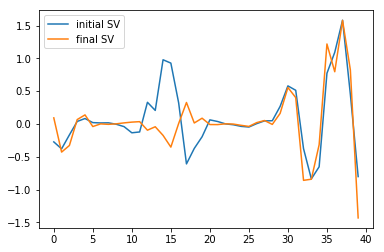

(40,)
0.5 0.5
0.4378247807327979
0.3155971039598682
0.22570228484658178
0.1014451211476504
0.06019112009655912
0.04516151416781106
0.03544919899835865
0.027946375679349007
0.02204437219134707
0.01741069837051729
0.013776214610267146
0.010921847584847056
0.008674645002673613
0.006900511258342583
0.005496146382912031
0.004381933356426578
0.00349626411540326
0.0027912145004312635
0.002229305726906937
0.00178108684782643
0.0014233215841455054
0.001137617098521794
0.000909377191718662
0.0007269958715342674
0.0005812310780337586
0.0004647150254525871
end 25
0.2160930496990614
0.176507884162907
0.12103735858390928
0.08017885377290275
0.055847780874028065
0.041294085223098353
0.031939529393312446
0.025471574346770883
0.02074097018509429
0.017139703855750508
0.014320073927560241
0.012068466635028485
0.010245253054181808
0.008754156839676185
0.007525703764373297
0.0065078464582546845
0.005660429504980464
0.004951787622787324
0.004356565748848853
0.003854259547192608
0.003428193141187195
0.003064

0.011627849104134077
0.010847291022951497
0.010104732165969632
0.009400580312597528
0.008735050031073204
0.008108010894213405
0.007518955086755653
0.006967026474661331
0.006451077251307156
0.005969733025902125
0.005521456125805855
0.005104602157076839
0.004717467904155158
0.004358330326299361
0.00402547727078444
0.0037172309081344697
0.003431965009365145
0.003168117154327343
0.0029241968580845865
0.0026987904718890478
0.002490563580720817
0.002298261493020505
0.002120708305890427
0.0019568049325084202
0.0018055263975223642
0.0016659186394498199
0.0015370950048379636
0.0014182325752920694
0.0013085684337033816
0.001207395948521153
0.0011140611333566002
0.0010279591224250837
0.0009485307893688424
0.0008752595270710024
0.0008076681985343828
0.0007453162632427322
0.0006877970792355832
0.0006347353780841565
0.0005857849077958223
0.0005406262371930486
0.0004989647143497668
end 59
(40,)
0.5 0.5
0.45890267740408264
0.16722082208111197
0.08471252766386515
0.045812607107531295
0.0278750975055213

0.0012061822537661193
0.001179927483701571
0.0011543142315331818
0.0011293195473402666
0.0011049219256741953
0.0010811011816581843
0.0010578383384328258
0.0010351155249104294
0.0010129158828999683
0.0009912234827508764
0.0009700232467412899
0.0009493008795063072
0.0009290428048637434
0.0009092361084527491
0.0008898684856514684
0.000870928194287874
0.0008524040117004951
0.000834285195745487
0.0008165614493824192
0.0007992228885041586
0.0007822600127065083
0.00076566367872074
0.0007494250762575343
0.0007335357060339081
0.00071798735977562
0.0007027721020070044
0.000687882253457645
0.0006733103759311005
0.0006590492584957432
0.0006450919048708731
0.0006314315218932029
0.0006180615089600533
0.0006049754483551556
0.0005921670963724306
0.0005796303751608255
0.0005673593652211167
0.000555348298492069
0.0005435915519695167
0.0005320836418074348
0.0005208192178550599
0.000509793058588626
0.0004990000664003496
end 107
(40,)
0.5 0.5
0.4763353709358889
0.17693631225449274
0.08154950792695614
0.038

0.0008497796011373777
0.0008362988967566591
0.0008230229862976543
0.0008099491895939794
0.0007970748407451527
0.0007843972891688499
0.0007719139005835039
0.0007596220579242175
0.0007475191621946221
0.000735602633257833
0.0007238699105691812
0.0007123184538530307
0.0007009457437265453
0.0006897492822729908
0.0006787265935662205
0.0006678752241497127
0.0006571927434714476
0.0006466767442771797
0.0006363248429642211
0.0006261346798973667
0.0006161039196892917
0.0006062302514468113
0.0005965113889851752
0.0005869450710115717
0.0005775290612802372
0.000568261148719655
0.0005591391475343099
0.0005501608972820039
0.0005413242629277195
0.0005326271348762952
0.0005240674289840216
0.0005156430865513459
0.0005073520742971038
0.0004991923843157102
end 191
(40,)
0.5 0.49999999999999994
0.5197169527172282
0.17716121932473064
0.07756093774770353
0.03732944051689397
0.018230342603126257
0.00905523276888204
0.004584117967832477
0.0023728933842844875
0.0012717989830983878
0.0007286331508111664
0.0004680

0.002669582502300762
0.0024771569031465366
0.002299823572989896
0.002136281528717613
0.001985349271007592
0.001845954161232242
0.0017171224807483784
0.0015979702119193182
0.0014876945488890884
0.0013855661244808726
0.0012909219251380076
0.0012031588566753235
0.0011217279183283325
0.0010461289400956906
0.0009759058378540073
0.000910642341573854
0.0008499581537307947
0.0007935054973499165
0.0007409660158035997
0.0006920479893228426
0.0006464838360572561
0.0006040278683407388
0.0005644542775302742
0.0005275553233470223
0.0004931397060402287
end 68
(40,)
0.5 0.4999999999999999
0.5164987043041384
0.26004104419619056
0.1306898704850801
0.05687872633637582
0.02610882416254116
0.012542735430473396
0.006146666000418334
0.0030346329851586177
0.001502161798131744
0.000744266259460819
0.0003688757391815902
end 10
0.2324385226489293
0.20214957555626686
0.11981492401569857
0.06420835310075504
0.03759155772454157
0.025171724155295064
0.018869612663864378
0.015235805270396165
0.01286065341262401
0.011

0.002956956615406773
0.0028471940002206086
0.002741159566253353
0.002638763893051969
0.0025399156311043886
0.00244452202485497
0.0023524893977553136
0.00226372359566625
0.0021781303873239766
0.002095615822208946
0.0020160865472327967
0.001939450084344977
0.0018656150715714128
0.001794491470211237
0.0017259907409945736
0.001660025991985787
0.001596512100933547
0.0015353658146441203
0.001476505827802795
0.0014198528435032563
0.0013653296175729463
0.0013128609886110133
0.001262373895488214
0.001213797383896966
0.0011670626033884143
0.001122102796189884
0.0010788532789646299
0.0010372514185529504
0.000997236602621754
0.0009587502060474262
0.0009217355537634645
0.0008861378807199916
0.0008519042895261469
0.0008189837062774218
0.0007873268350084537
0.0007568861111563304
0.0007276156543700614
0.0006994712209575384
0.0006724101562220645
0.0006463913469053387
0.0006213751739229059
0.0005973234655502352
0.00057419945119346
0.000551967715857145
0.0005305941554024485
0.0005100459326724389
0.000490

0.00137592029448344
0.0013707559361313445
0.001365573709575313
0.00136037375668373
0.001355156292765335
0.0013499215956018162
0.0013446699959946964
0.0013394018696156619
0.0013341176299782947
0.0013288177223759806
0.0013235026186500455
0.0013181728126752746
0.0013128288164603742
0.0013074711567806865
0.0013021003722685487
0.0012967170108975428
0.0012913216278073404
0.0012859147834217673
0.0012804970418196393
0.0012750689693241388
0.0012696311332804123
0.001264184100996248
0.0012587284388229658
0.0012532647113582217
0.0012477934807540172
0.0012423153061155282
0.0012368307429786358
0.0012313403428565654
0.001225844652845205
0.001220344215280037
0.001214839567438398
0.0012093312412803272
0.0012038197632233938
0.0011983056539482597
0.0011927894282288182
0.0011872715947863592
0.0011817526561631894
0.0011762331086140909
0.0011707134420135192
0.0011651941397763546
0.001159675678790815
0.0011541585293628044
0.0011486431551691956
0.0011431300132206555
0.001137619553831491
0.0011321122205970072


0.5 0.4999999999999999
0.48819105105657007
0.20730332636679558
0.09269736575659947
0.03976970103049432
0.01773184458235703
0.008211271311723528
0.003900798129938713
0.0018827131385782136
0.0009174922157968645
0.00044974267712635514
end 9
0.21161630949995322
0.15497822393609684
0.0976901443980121
0.06384478884926068
0.04630302718880546
0.03641803618562235
0.02991194525596822
0.02508934189381738
0.02127904041783755
0.018174954149439586
0.015606446052975453
0.01346096930710393
0.011656491342350079
0.010130193709447198
0.008832798965076634
0.007725114640882236
0.006775652070501407
0.00595888812980703
0.0052539665199590885
0.004643717359183017
0.0041139114210907105
0.0036526880414046964
0.0032501118265285526
0.0028978253005649823
0.002588773549396714
0.0023169834558384307
0.0020773848426265226
0.0018656642226176764
0.001678144268804975
0.001511683839361069
0.0013635946280108097
0.0012315714026268658
0.0011136334471966818
0.0010080753056296472
0.000913425289916464
0.0008284104943488944
0.000

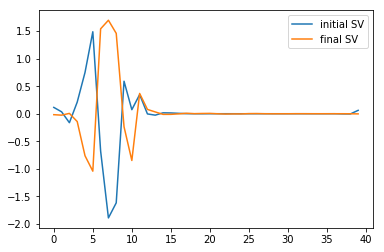

(40,)
0.5 0.4999999999999999
0.5764593945095896
0.20563418597858538
0.18755921264151645
0.17272239854789456
0.10346454409421313
0.050565418859462925
0.023363929634789445
0.010661368146906951
0.004852208638143038
0.0022071369283001158
0.001003852941136566
0.000456563072647811
end 11
0.1830906509094353
0.17726380589669383
0.141953445152159
0.10104567734133754
0.06943875857747246
0.04772131874038501
0.03315607721012273
0.02342265626654147
0.016923574903479534
0.012591290358631456
0.00971341199452959
0.007810437369136617
0.006555149008472835
0.005722649729830585
0.005160064390640881
0.004766373655093208
0.004477062120157644
0.00425210677016591
0.004067154655467539
0.003907535991458434
0.0037644420444304
0.0036325767162737463
0.003508742743257369
0.0033909978208498353
0.003278151721041498
0.0031694660163199976
0.0030644741592756224
0.0029628732835524823
0.0028644589374691217
0.0027690856382588855
0.0026766430213924827
0.002587041441469176
0.0025002033153378052
0.0024160579583093296
0.002334

0.5382575076853662
0.28159375299150285
0.07456240188624429
0.01620393038169306
0.0035543444260622736
0.0007983436792349511
0.00018420176835119855
end 6
0.17852574631673832
0.16808611683398245
0.12594988978343175
0.08568202400802073
0.06036246217133622
0.04627770376207954
0.03796756890560574
0.03226576780547544
0.02782303332879312
0.02414666395723269
0.02106194706112469
0.018492935173425557
0.016386834376359273
0.014691848775214842
0.013352937882789602
0.012313129535971716
0.01151638697059806
0.010910583073473062
0.01044982338000962
0.010095715373587208
0.009817559153117687
0.009591727095819935
0.00940060334754263
0.009231400126331534
0.009075051416008766
0.008925277134763376
0.008777839205127057
0.008629973526721629
0.008479967552394423
0.008326851469133275
0.008170174838130692
0.00800984605780906
0.007846017353502514
0.007679002486317034
0.007509217883324296
0.007337140521951798
0.007163277822223627
0.0069881461794517015
0.00681225574915796
0.006636099786567235
0.006460147328181962
0.

0.0011570833199667208
0.0011499094947705528
0.001142755972159263
0.0011356232253396683
0.0011285117149838402
0.0011214218893658044
0.0011143541845006683
0.0011073090242858948
0.0011002868206435052
0.0010932879736652871
0.0010863128717585276
0.0010793618917935715
0.0010724353992526835
0.0010655337483798759
0.0010586572823313906
0.0010518063333280537
0.0010449812228069963
0.0010381822615750734
0.0010314097499623442
0.0010246639779755362
0.001017945225452712
0.0010112537622170516
0.0010045898482314583
0.000997953733752878
0.0009913456594860587
0.0009847658567379573
0.000978214547571078
0.0009716919449566976
0.0009651982529276532
0.0009587336667303707
0.0009522983729767052
0.0009458925497945995
0.0009395163669783118
0.0009331699861375104
0.0009268535608460205
0.0009205672367889902
0.0009143111519094548
0.000908085436554025
0.0009018902136168665
0.0008957255986833294
0.0008895917001715093
0.0008834886194736313
0.0008774164510952193
0.0008713752827935654
0.0008653651957147313
0.0008593862645

0.5 0.4999999999999999
0.6385030338178371
0.1526016412324497
0.0727870019478046
0.061638725286182125
0.04932170725735963
0.03792000104688258
0.028463538175816563
0.021076100883504152
0.015489188565640721
0.011337031032315465
0.008279829728291832
0.0060400015218718996
0.004403348576177307
0.003209118440673368
0.002338364900238197
0.0017037206607025126
0.0012412607795751274
0.0009043078131367331
0.0006588150110886504
0.00047996269065737185
end 19
0.1993395707955923
0.14415363805389697
0.10253871416768817
0.07898767411191521
0.06403600699721669
0.0528980531388042
0.04406636049396129
0.03705170387394832
0.03156069312757782
0.027316472236630016
0.02405433825565453
0.021541398939636285
0.019587123067237398
0.01804360473633391
0.016800042013902696
0.0157752623845456
0.014910520611679946
0.014163514561576149
0.013503801505465124
0.012909445366578603
0.01236462125906142
0.011857917360013478
0.011381127788138143
0.010928386636282308
0.010495539312365642
0.010079680773524191
0.009678813099277964


0.0007847662518291142
0.0007631623875253136
0.0007423828078775594
0.0007223763014663607
0.0007030959435259336
0.0006844987191889332
0.0006665451765651841
0.0006491991079686764
0.000632427257588329
0.0006161990539014648
0.0006004863651531923
0.000585263276264334
0.0005705058855842071
0.0005561921199678627
0.0005423015667284295
0.0005288153210915925
0.0005157158478585927
0.0005029868560649087
0.0004906131855028213
end 87
(40,)
0.5 0.5
0.5293470108290621
0.15377755065202295
0.09918351791803379
0.05639552158051984
0.03066228612717749
0.016674265585535836
0.009241823334501657
0.005282860952511209
0.0031509484210839925
0.001984264431346734
0.0013294598891750633
0.0009461526479710277
0.0007074773889395116
0.0005477479784598059
0.00043350379622683323
end 14
0.20691277275545736
0.14476233335252517
0.08767859904749127
0.05481985838823115
0.03797402423627493
0.028876898738579525
0.023292222370919383
0.019420041248433738
0.016520430651341643
0.014262950731233199
0.012474347354606615
0.011046493569

0.5 0.4999999999999999
0.5134477618672505
0.04738330366782292
0.009779427786263529
0.002234214164332179
0.0005232157239166253
0.00012376280599977094
end 5
0.23644316754881423
0.15647816957470562
0.09620081734894827
0.05949659596217302
0.03807507446348951
0.025888731585937512
0.019050053116039335
0.015301882021498984
0.013381335495531471
0.012574884732672917
0.012466051930653105
0.012804648934748438
0.013437903594330268
0.014270773891058424
0.01524153300137721
0.01630655286590274
0.017430914980729562
0.018582731867994973
0.019729891705814486
0.020838503760730414
0.021872666955260404
0.022795350019549916
0.023570198920522936
0.024164016429702107
0.024549540784861483
0.024708048738348
0.024631286175440494
0.024322326268878047
0.023795164113106487
0.02307312194000676
0.02218637764220392
0.021169069814274445
0.020056445215894753
0.018882418604892086
0.017677760976300732
0.016468975556476598
0.015277800213466943
0.014121205439608316
0.013011734699115336
0.011958044683697723
0.010965531201907

0.5219601489165597
0.26177343304221545
0.14672825693131178
0.061172336945538495
0.02363844182129828
0.0090664818932141
0.0034851466520338043
0.0013429730747516833
0.0005183859958127826
0.00020031586302058773
end 9
0.19363660734769245
0.1744710133533272
0.12011754514738199
0.0726348703285753
0.04447641956817892
0.030210801060905786
0.023591516678633212
0.020585867845589464
0.019117128413474606
0.01829615615449253
0.017775527957792272
0.017417799121296176
0.01716264576124211
0.016978260347490948
0.016843836115541196
0.016743216199002802
0.016662619692407787
0.01658989215147253
0.016514325183281855
0.016426671806212167
0.016319207143506587
0.016185773685188844
0.01602178793730675
0.015824201679456182
0.01559141871777456
0.015323172079538589
0.015020369068807717
0.014684913165996374
0.014319512548647212
0.013927485032149597
0.013512568505092628
0.013078744579330472
0.012630081382895944
0.012170599426949279
0.011704162502553775
0.011234393794523994
0.01076461596195775
0.010297812887222209
0

0.0008155817751165108
0.0008141450351927975
0.0008127032608232009
0.0008112564585382164
0.0008098046385872941
0.0008083478147161569
0.0008068860039557802
0.000805419226423614
0.0008039475051360499
0.0008024708658311235
0.0008009893368009993
0.0007995029487346275
0.0007980117345682189
0.0007965157293445592
0.0007950149700802246
0.0007935094956397161
0.0007919993466172111
0.000790484565224383
0.0007889651951846686
0.0007874412816331674
0.0007859128710222115
0.0007843800110322987
0.0007828427504876067
0.0007813011392759568
0.0007797552282739336
0.0007782050692753123
0.0007766507149237958
0.0007750922186490525
0.000773529634606721
0.000771963017621163
0.0007703924231316929
0.0007688179071414121
0.0007672395261688143
0.0007656573372022159
0.0007640713976563218
0.0007624817653312919
0.0007608884983737512
0.0007592916552404113
0.0007576912946626572
0.0007560874756140539
0.0007544802572786043
0.0007528696990215276
0.0007512558603606321
0.0007496388009401632
0.0007480185805052383
0.000746395258

0.5 0.49999999999999994
0.5557532969821468
0.14790802789373658
0.029608364652979554
0.006556217069300886
0.0015925827423449303
0.00040791019864691515
end 5
0.20216848522119873
0.16460102269088658
0.10790029745784036
0.06682083944687332
0.0441635177135497
0.032504048344189296
0.026191516320102387
0.02229498120052615
0.01952207118591225
0.017336908677249074
0.015512263528165171
0.013942469308625702
0.012570864159820784
0.01136198042922674
0.010290632251462335
0.009337395389257102
0.00848655810225807
0.0077250684940514186
0.007041913545467387
0.006427706215273424
0.005874386803783575
0.005374995448367414
0.00492349334880986
0.004514619502374428
0.004143774287787259
0.003806923814465441
0.0035005205842279534
0.003221437128410565
0.0029669100817831476
0.0027344927399570534
0.002522014581557885
0.0023275465618200247
0.0021493712296325935
0.0019859569065399704
0.0018359353091902833
0.0016980821075004717
0.0015712999976131997
0.0014546039375720036
0.0013471082489320716
0.0012480153324641416
0.

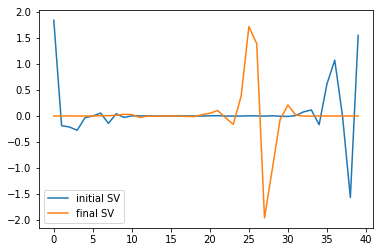

(40,)
(3, 50)
SVrmse_initial_t0.5.jpg


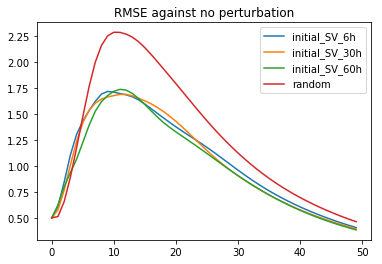

SVrmse_60h_final_t.jpg


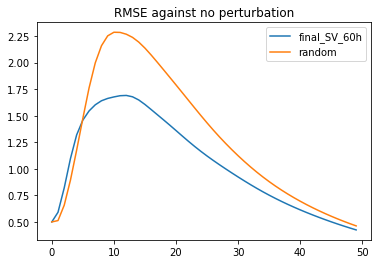

In [7]:
def Forecast(Xa):
    h = 0.05
    F = 8.0
    
    Xf = Rungekutta4(Xa,h,F)
       
    return Xf

def Forecast_t(Xa):
    h = 0.05
    F = 8.0
    
    X0 = Rungekutta4(Xa,h,F)
    Xf = Rungekutta4_t(X0,Xa,h,F)
       
    return Xf

#SV
N=40
h=0.05
F=8
t=1000

a_list=[0.5,1.0,5.0]
alpha=0.5
C1_i=[]
C1_f=[]
C2=[]
for j in [1,5,10]:
    window_size=j
    m_time=30    
    for i in range(m_time):
        SVi = []
        SVf = []
    
        X0 = np.random.randn(N)
        for k in range(200):
            X0_=Rungekutta4(X0,h,F)
            X0=X0_
        
        Xf=[]
        for k in range(window_size):
            X0_ = Forecast(X0)
            Xf.append(X0)
            X0 = X0_
    #X0 = np.ones(N)*F
        X1 = np.random.randn(N)
        X1_norm=np.sqrt(sum(X1*X1)/N)
        X1 = X1*alpha/X1_norm
        print(alpha,np.sqrt(sum(X1*X1)/N))
    
        X1b = X1
        breed_num_i=0
        for k in range(t):
            X1a=X1b
            for j in range(window_size):
                X0b = Xf[j]
                Mx = Rungekutta4_t(X0b,X1a,h,F)
                Mx = Mx*alpha/np.sqrt(sum(Mx*Mx)/N)
                X1a = Mx
            for j in reversed(range(window_size)):
                X0b = Xf[j]
                MtMx = Rungekutta4_adj(Mx,X0b,h,F)
                MtMx = MtMx*alpha/np.sqrt(sum(MtMx*MtMx)/N)
                Mx = MtMx
            err = X1b-MtMx
            d = np.sqrt(sum(err*err)/N)
            print(d)
            if(d<alpha/1000):
                break
    #X0b = Rungekutta4(X0,h,F)
            X1b = MtMx
    #X0 = X0b
            SVi.append(MtMx)
            breed_num_i+=1
            #if(k%10==0):
                #plt.plot(MtMx)
                #plt.show()
        print('end',breed_num_i)

        X1b = X1
        breed_num_f=0
        for k in range(t):
            X1a=X1b
            #for j in range(window_size):
                #X0b = Xf[window_size-j-1]
            X0b = Xf[0]
            Mtx = Rungekutta4_adj(X1a,X0b,h,F)
                #X1a = Mtx
            #for j in range(window_size):
                #X0b = Xf[j]
            X0b = Xf[0]
            MMtx = Rungekutta4_t(X0b,Mtx,h,F)
                #Mtx = MMtx
            MMtx = MMtx*alpha/np.sqrt(sum(MMtx*MMtx)/N)
            err = X1b-MMtx
            d = np.sqrt(sum(err*err)/N)
            print(d)
            if(d<alpha/1000):
                break
        #X0b = Rungekutta4(X0,h,F)
            X1b = MMtx
    #X0 = X0b
            SVf.append(MMtx)
            breed_num_f+=1
            #if(k%10==0):
                #plt.plot(MMtx)
                #plt.show()
        print('end',breed_num_f)

        if(i==m_time-1):
            fname="SV"+str(6*window_size)+"h_2.jpg"
            print(fname)
            plt.plot(MtMx,label="initial SV")
            plt.plot(MMtx,label="final SV")
            plt.legend()
            #plt.savefig(fname)
            plt.show()
        """fname="SV"+str(alpha)+"_initial_contour.jpg"
        print(fname)
        xs=np.arange(N)
        time=np.arange(breed_num_i)
        SVi = np.array(SVi).reshape(breed_num_i,N)
        plt.pcolor(xs,time,SVi,cmap='RdBu_r')
        plt.colorbar()
        plt.xlabel('site')
        plt.ylabel('time')
        plt.savefig(fname)
        plt.show()
        fname="SV"+str(alpha)+"_final_contour.jpg"
        print(fname)
        xs=np.arange(N)
        time=np.arange(breed_num_f)
        SVf = np.array(SVf).reshape(breed_num_f,N)
        plt.pcolor(xs,time,SVf,cmap='RdBu_r')
        plt.colorbar()
        plt.xlabel('site')
        plt.ylabel('time')
        #plt.savefig(fname)
        plt.show()"""

        
        dX_i=MtMx
        dX_f=MMtx
        print(dX_i.shape)
        #初期値
        Xa = np.random.randn(N)
        X0 = Xa
        for j in range(500):
            Xa = Rungekutta4(X0,h,F)
            X0 = Xa
        #Xa = np.ones(N)*F
        #print(Xa)
        #print(Pa)

        #初期摂動
        dX_random = np.random.rand(N)
        dXi_norm = np.sqrt(sum(dX_i*dX_i)/N)
        dXf_norm = np.sqrt(sum(dX_f*dX_f)/N)
        dX_norm=(dXi_norm+dXf_norm)/2
    
        #dX_i=dX_i/dXi_norm
        #dX_f=dX_f/dXf_norm
        random_norm=np.sqrt(sum(dX_random*dX_random)/N)
        dX_random=dX_random/random_norm*dX_norm


        t=1460
        Xa_i=Xa+dX_i
        Xa_f=Xa+dX_f
        Xa_r=Xa+dX_random
        X_n=[]
        X_i=[]
        X_f=[]
        X_r=[]
        X_n.append(Xa)
        X_i.append(Xa_i)
        X_f.append(Xa_f)
        X_r.append(Xa_r)
        for k in range(49):
            Xf = Forecast_t(Xa)
            Xf_i = Forecast_t(Xa_i)
            Xf_f = Forecast_t(Xa_f)
            Xf_r = Forecast_t(Xa_r)
            X_n.append(Xf)
            X_i.append(Xf_i)
            X_f.append(Xf_f)
            X_r.append(Xf_r)
            Xa=Xf
            Xa_i=Xf_i
            Xa_f=Xf_f
            Xa_r=Xf_r

        for k in range(50):
            X1_i = np.array(X_i[k])
            X1_f = np.array(X_f[k])
            X2 = np.array(X_n[k])
            X3_i = sum((X2-X1_i)*(X2-X1_i))/N
            X3_f = sum((X2-X1_f)*(X2-X1_f))/N
            Y1 = np.array(X_r[k])
            Y2 = sum((X2-Y1)*(X2-Y1))/N
            rmse1_i = np.sqrt(X3_i)
            rmse1_f = np.sqrt(X3_f)
            rmse2 = np.sqrt(Y2)
            C1_i.append(rmse1_i)
            C1_f.append(rmse1_f)
            C2.append(rmse2)

SVi=np.array(C1_i).reshape(3,m_time,50)
SVf=np.array(C1_f).reshape(3,m_time,50)
rand=np.array(C2).reshape(3*m_time,50)
rmseSVi=np.sum(SVi,axis=1)/m_time
rmseSVf=np.sum(SVf,axis=1)/m_time
rmseR=np.sum(rand,axis=0)/m_time/3
print(rmseSVi.shape)
fname="SVrmse_initial_t"+str(alpha)+".jpg"
    #fname="BVrmse_nature_rescale.jpg"
print(fname)
#plt.xscale("log")
#plt.yscale("log")
plt.plot(rmseSVi[0],label="initial_SV_6h")
#plt.plot(rmseSVf[0],label="final_SV_6h")
plt.plot(rmseSVi[1],label="initial_SV_30h")
#plt.plot(rmseSVf[1],label="final_SV_24h")
plt.plot(rmseSVi[2],label="initial_SV_60h")
#plt.plot(rmseSVf[2],label="final_SV_48h")
plt.plot(rmseR,label="random")
plt.title("RMSE against no perturbation")
plt.legend()
plt.savefig(fname)
plt.show()

fname="SVrmse_"+str(6*window_size)+"h_final_t.jpg"
    #fname="BVrmse_nature_rescale.jpg"
print(fname)
#plt.xscale("log")
#plt.yscale("log")
#plt.plot(rmseSVi[0],label="initial_SV_6h")
plt.plot(rmseSVf[0],label="final_SV_"+str(6*window_size)+"h")
#plt.plot(rmseSVi[1],label="initial_SV_30h")
#plt.plot(rmseSVf[1],label="final_SV_30h")
#plt.plot(rmseSVi[2],label="initial_SV_60h")
#plt.plot(rmseSVf[2],label="final_SV_60h")
plt.plot(rmseR,label="random")
plt.title("RMSE against no perturbation")
plt.legend()
#plt.savefig(fname)
plt.show()

In [21]:
a = np.array([1,2,3,4,5,6,7,8])
b = a.reshape(2,2,2)
print(b)
b[1,0,0]

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


5

0.5 4
3.5204449875066692
0


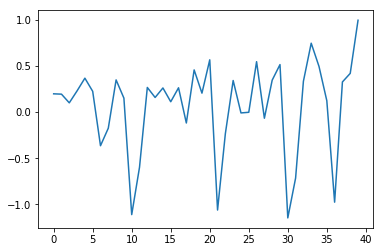

end 26
[array([ 5.09538161e-03, -4.87116841e-03, -1.80414035e-02, -2.64623467e-03,
        3.08721656e-02, -1.31085539e-02, -1.29229356e-02, -1.50905504e-02,
        3.22516091e-02,  5.92078118e-02,  1.04872744e-01,  6.56294559e-02,
       -2.78166686e-01,  3.87637985e-04, -2.36995191e-02,  7.48057520e-02,
       -5.00803820e-01, -3.45511607e-01,  9.72370058e-02, -2.51092988e-02,
        4.59856097e-02, -7.17656411e-01,  1.59117631e+00,  2.13951635e+00,
        1.04831935e+00, -7.31163827e-01, -3.86711978e-01,  8.83223873e-02,
        2.72153174e-02,  2.92830498e-01,  7.14230533e-02, -3.84412191e-02,
       -2.12665338e-02, -5.21458761e-02,  1.60866780e-02,  3.23820990e-03,
       -2.04393259e-02,  8.69665197e-03,  1.10831237e-04,  1.43996893e-03])]
[0.70030056 0.00213826 0.71528964 0.72013289 0.49692652 0.77709161
 0.31191448 0.66967071 0.56050887 0.54632509 0.37705077 0.34883199
 0.32125411 0.41035366 0.04398419 0.6983312  0.49923615 0.32367156
 0.45721495 0.46675936 0.72165899 0.262

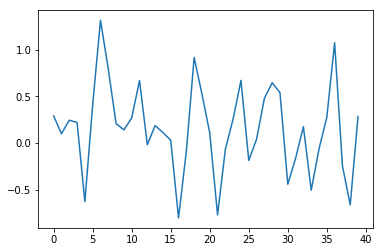

end 30
[array([ 3.00591625e-04, -3.74646464e-02, -3.86708471e-02, -1.59600753e-02,
       -5.69476297e-03, -2.16259559e-01, -3.61311851e-01, -4.15972460e-01,
       -3.75318824e-01, -9.38064813e-01,  8.20401460e-01,  4.01473420e-01,
        3.46302512e-01, -6.56943449e-02,  1.25423396e-01,  7.81681164e-01,
        6.08212041e-01, -6.30727030e-01, -7.16824214e-01, -1.80930400e-02,
        4.16419494e-01,  1.55544603e+00,  1.28746853e+00,  2.36072903e-01,
       -1.17752211e+00,  1.14835489e-01, -3.47221530e-02, -9.10473709e-02,
        1.44235746e-01, -4.01293721e-02,  2.63437199e-02,  5.85197000e-02,
       -5.73125428e-02,  2.48585198e-02,  8.14285736e-02, -1.47973703e-03,
       -7.40771139e-02, -1.55377622e-02,  1.82669112e-02,  1.30708845e-03])]
[0.43686691 0.58936356 0.60890263 0.18518761 0.72993899 0.66179596
 0.45296142 0.05476447 0.50936098 0.05793883 0.33317069 0.47634912
 0.64488766 0.50930871 0.32911457 0.62895154 0.05944551 0.72779548
 0.10577043 0.29091235 0.61568927 0.192

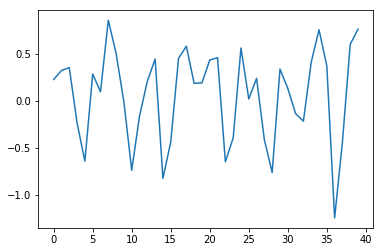

end 8
[array([-4.77021235e-02, -1.16052359e-01,  3.47774909e-02, -1.88673971e-02,
       -7.49787214e-03,  1.57040351e-01,  7.27587015e-02, -1.77682246e-03,
        4.20672542e-02, -2.22972074e-02, -2.73824083e-01,  4.76559780e-02,
       -1.03438568e-01,  4.94778702e-02, -2.97381637e-01, -5.14930512e-01,
        9.53790283e-02,  1.24697611e+00,  4.55725288e-01, -1.06698313e+00,
        2.34033988e+00,  7.30707745e-01,  1.65241230e-01, -1.61061053e-01,
       -5.36109874e-01,  2.66924493e-01,  8.69617339e-02,  1.02056392e-01,
       -3.52839332e-01,  6.44905865e-02, -4.41402131e-02, -8.80776111e-03,
        4.75029851e-02,  5.04773851e-02, -1.63984306e-02, -7.08132585e-02,
       -3.82389693e-03, -7.14997585e-02,  7.14145837e-02,  6.50455698e-02])]
[0.52325683 0.36736345 0.39677069 0.26717415 0.49794702 0.30137497
 0.11616865 0.34181485 0.0098564  0.60934122 0.02609426 0.50776951
 0.00139548 0.80839732 0.27606536 0.5695017  0.66731378 0.46055184
 0.06247818 0.81781268 0.66485545 0.2863

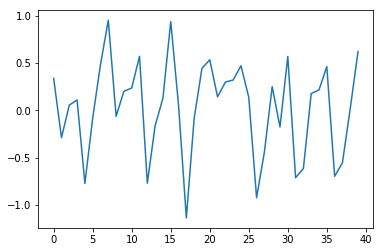

end 14
[array([-1.28269719e-01, -1.28110030e-01, -5.46528845e-02,  2.16383878e-02,
        1.14213315e-02, -1.26931830e-01,  2.81058248e-02,  9.04431501e-02,
       -2.45510758e-01,  1.06184791e-01,  1.28097994e+00,  8.20737527e-01,
        1.85460380e+00,  6.59132405e-01, -1.12280040e+00,  1.35628460e+00,
        5.68519674e-01,  2.37304203e-02, -2.85905197e-01,  7.38015809e-03,
       -8.45435065e-02, -1.05278087e-02,  2.96407014e-04,  4.68296053e-03,
       -7.64416176e-03, -8.08904052e-02, -7.33933171e-02,  9.23960343e-02,
        3.78795989e-02,  1.95543199e-01,  6.20948032e-02, -9.94857806e-02,
        5.92682566e-02,  4.69188145e-02, -1.96607077e-01, -1.72951550e-01,
        2.73612674e-02,  2.77760045e-02,  8.12590353e-02,  9.48094596e-02])]
[0.29333342 0.86925576 0.57279572 0.49365232 0.46489705 0.42844018
 0.41893883 0.7668098  0.50311115 0.55334036 0.19137831 0.51267438
 0.14483785 0.30660666 0.46813484 0.71503789 0.47509084 0.37241043
 0.37965749 0.55580813 0.61937664 0.262

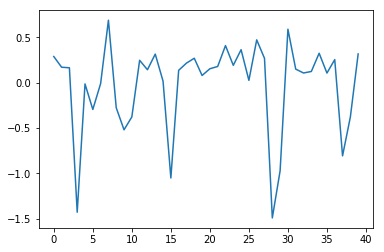

end 39
[array([ 0.14460635, -0.61863053, -0.43044191,  0.2577548 , -0.47252835,
       -0.48318884, -1.3507185 ,  1.46979253,  0.79425965, -1.46532294,
       -0.77444834,  0.84797075, -0.00546485,  0.10682619,  0.11615813,
       -0.1433227 ,  0.00175818,  0.49565442,  0.05147827, -0.22852504,
       -0.24769758,  0.03286851, -0.08691898, -0.510722  ,  0.23335952,
       -0.07930103, -0.08321735, -0.0622411 ,  0.07087027, -0.03609239,
       -0.05445705,  0.05526713, -0.08810716,  0.09872318, -0.0259175 ,
       -0.04774215,  0.11675128,  0.0685089 ,  0.00670695,  0.08226019])]
[0.73975521 0.50391977 0.36208742 0.57224592 0.7547266  0.44087674
 0.51496168 0.2303264  0.72029186 0.82159005 0.71737892 0.52673028
 0.27119683 0.37746614 0.17076394 0.12453376 0.10917013 0.25944463
 0.90149939 0.44381941 0.18432484 0.4772293  0.09867832 0.29949072
 0.58288766 0.32861754 0.06202964 0.29327301 0.23750797 0.78494624
 0.44995431 0.33178616 0.58655162 0.81533236 0.44315471 0.89298043
 0.11740879 

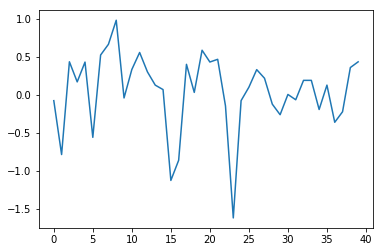

end 29
[array([ 0.12006207, -0.04000652,  0.0962235 ,  0.14282762,  0.84049938,
        0.26798103, -1.48035053,  0.44712177, -0.05945525,  0.14060736,
        0.35745595,  0.25582246,  0.71145935, -0.96679458, -0.72271792,
       -0.10661631,  0.5692004 ,  0.07185925,  0.10795347,  0.42671721,
        1.11900191, -0.68786174, -1.31980694,  0.29659458,  0.46257201,
       -0.21877098,  0.2132041 ,  0.02430101,  0.02955608,  0.02943881,
       -0.01970903,  0.01370763,  0.14256807,  0.02126979,  0.17775739,
       -0.16801283, -0.07950306,  0.22362415,  0.13528938, -0.22390402])]
[0.64578904 0.60708815 0.62268488 0.83977852 0.50247226 0.6694529
 0.84205289 0.668498   0.00868348 0.21483453 0.28498089 0.63671405
 0.24200836 0.19422809 0.58695196 0.3931123  0.6906085  0.72289645
 0.86759329 0.10826989 0.66110514 0.54233053 0.42081134 0.76304566
 0.23893023 0.2787522  0.25817262 0.28084618 0.31328405 0.53748663
 0.03108789 0.52621066 0.10330099 0.18149672 0.09997533 0.57089107
 0.36632152 0

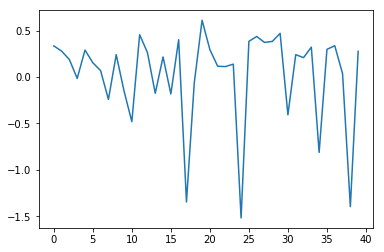

end 13
[array([-3.51726260e-02, -2.73904122e-02,  4.83927380e-03, -2.44841907e-02,
        2.77593373e-02, -6.66236388e-02,  2.01755362e-01, -5.24430038e-02,
        4.27147824e-02, -3.76773621e-02, -2.57211317e-01, -5.90101801e-02,
        2.42750173e-01,  7.86193258e-02,  2.87284473e-02, -6.31902784e-02,
        1.37086063e-01,  6.76894302e-02,  1.43286980e-01,  2.15394238e-02,
        8.91129771e-02,  1.49546207e-01, -1.35111227e+00, -1.83263198e+00,
       -8.95002652e-01,  1.67517542e+00,  2.47301604e-01, -8.11244729e-01,
       -3.88864172e-01, -2.43560547e-01,  2.49748849e-03,  2.30959711e-02,
       -4.59801445e-02,  2.36494311e-02,  8.91408326e-03, -2.91553642e-04,
        1.72104108e-02, -3.71203923e-02, -1.52956353e-02,  7.02747119e-02])]
[0.24808972 0.2262085  0.04581602 0.38802141 0.17469043 0.04093366
 0.12491848 0.78585646 0.20000217 0.09332747 0.74227997 0.56456838
 0.77142188 0.7927443  0.09112858 0.7976685  0.18690865 0.17275589
 0.49285839 0.2310665  0.71239483 0.558

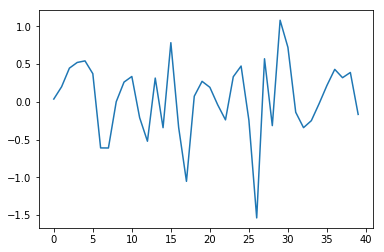

end 21
[array([ 0.12880915,  0.11757545,  0.10889989, -0.10079658, -0.080636  ,
        0.02641659,  0.02037244,  0.03933223,  0.02127136, -0.13022354,
        0.09143134, -0.14757381,  0.02395378, -0.33312598, -0.64032436,
        0.91008761, -0.54777497, -1.19723716,  1.34719617, -0.01420427,
       -0.43202654,  1.02220131, -0.54741866,  0.26595083, -0.09570109,
       -0.00934836,  0.96991435, -0.44924181,  0.24440839,  0.86667392,
       -0.21429231, -0.69622794,  0.08884449, -0.43424783,  0.15243592,
        0.73189116, -0.04379339,  0.28280942, -0.12736599,  0.20909648])]
[0.4598607  0.79335513 0.41806242 0.79056274 0.01863183 0.10481864
 0.50371221 0.7023022  0.5665181  0.45797978 0.28996064 0.24787422
 0.27762033 0.37074606 0.72542418 0.54782868 0.68952946 0.20673935
 0.58769521 0.75518604 0.28888062 0.23842972 0.7271296  0.45663775
 0.38153219 0.64612409 0.62272258 0.04796939 0.22732526 0.58224077
 0.68182276 0.34255882 0.35742653 0.49887185 0.19708468 0.5324568
 0.78667587 0

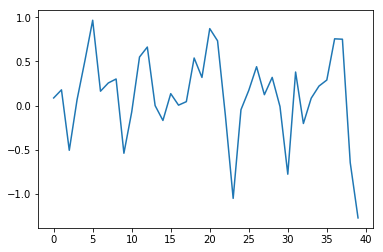

end 83
[array([-1.60962764e-01, -3.96392075e-02,  8.75564133e-02, -7.53388784e-02,
        8.58161957e-03, -3.13803118e-01, -2.05823400e-01,  1.36460204e+00,
        1.30319876e+00,  8.20862425e-01, -1.32383597e+00, -7.20513427e-01,
        2.99702008e-01,  4.55730406e-01, -1.25825360e+00,  9.65814404e-01,
       -3.19681552e-01, -4.41820467e-01,  1.44273472e-01,  1.74671538e-01,
       -2.74810186e-02,  3.02009139e-02,  2.30556243e-03, -8.33385375e-03,
        3.67592231e-03,  1.62560700e-03, -2.25511245e-02,  4.81808768e-02,
        7.98212215e-02, -1.19433321e-02,  3.96843300e-02,  2.47193284e-02,
       -9.87283362e-04, -3.02454817e-01, -2.83296868e-02, -2.78972693e-03,
       -8.45428561e-02,  1.72500964e-01,  8.61587249e-02,  1.27563698e-02])]
[0.0809076  0.33205938 0.55453237 0.22510624 0.65343532 0.32442884
 0.30475565 0.84116864 0.72195296 0.6831641  0.24333185 0.19760876
 0.12651846 0.48828129 0.10632282 0.24870599 0.54633511 0.80044903
 0.30839933 0.41884413 0.28380437 0.435

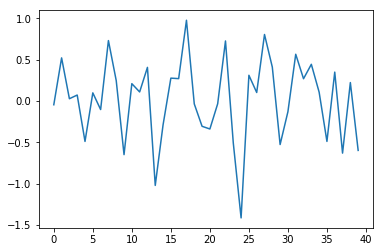

end 21
[array([ 0.16656495, -0.00890629,  0.01363356,  0.02593118,  0.07011002,
        0.00956437, -0.08853715, -0.03472656, -0.07425963, -0.11727178,
       -0.35467729, -0.3006014 ,  0.27688191,  0.28048997,  0.97150988,
       -0.01685666, -0.11312639, -0.06125917, -0.0140203 ,  0.11009766,
        0.04924153,  0.57928347,  0.49510968,  0.76763891, -1.89335441,
       -0.61528895,  1.43156029,  0.60281872,  0.84064407,  0.0302672 ,
       -0.29577545,  0.35386584,  0.04515557, -0.02587665,  0.04658271,
        0.08140036, -0.27445593,  0.06037281, -0.11145496, -0.14763483])]
[0.6890658  0.08589543 0.32594709 0.74828115 0.08350374 0.15910775
 0.78552166 0.07064757 0.58493934 0.65186046 0.65939876 0.63061384
 0.6103102  0.69101268 0.19749586 0.66135949 0.68005476 0.55726072
 0.6300472  0.09177607 0.18891963 0.68815451 0.65502329 0.0597119
 0.42087491 0.78394097 0.35921501 0.62842339 0.06389876 0.38464509
 0.20534121 0.18321042 0.35072449 0.36662167 0.14540467 0.41741881
 0.17971513 0

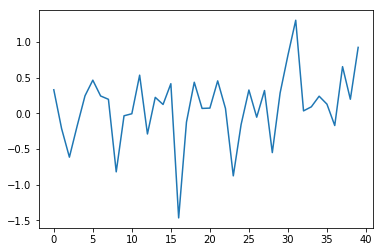

100


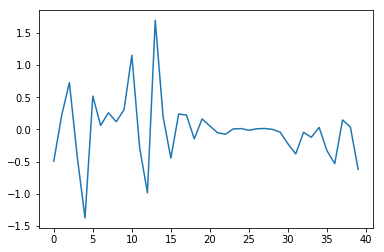

end 190
[array([ 1.50726227e-01, -5.33403059e-01,  1.09221982e-02, -2.15902762e-01,
        1.20954932e-01,  2.21375062e-01, -8.68249386e-02, -9.93556657e-02,
        3.45592308e-02,  1.42750998e-02, -2.62441201e-02, -1.19530109e-02,
       -6.71847244e-03, -9.30102333e-04, -1.06559832e-02, -2.78374709e-02,
        1.55533194e-03, -1.81100602e-02,  1.56393387e-02,  3.08265667e-03,
       -2.39232700e-02,  1.37408683e-02, -2.76790125e-02,  4.68355038e-02,
        1.09238036e-01, -5.20026053e-02, -2.51107949e-02,  1.89344307e-01,
        5.98245288e-02,  7.50183274e-02,  1.51776545e-01,  1.42225301e+00,
       -1.88136674e+00, -1.82501204e+00,  4.16416893e-01, -5.73165393e-02,
        3.92235571e-01, -3.10013406e-02, -2.82890911e-01,  4.11840065e-01])]
[0.11291088 0.61200637 0.37915519 0.77489827 0.76034572 0.80084344
 0.81985283 0.11065954 0.35141076 0.64329967 0.52807773 0.4232164
 0.23329012 0.77689603 0.75222605 0.79490587 0.03879817 0.25472848
 0.58732879 0.21459082 0.29158613 0.561

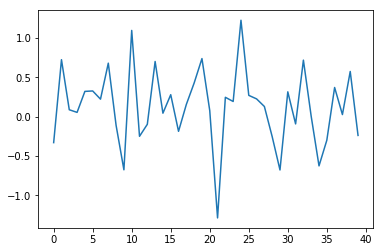

100


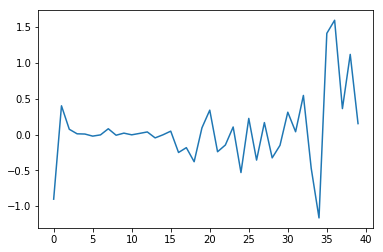

200


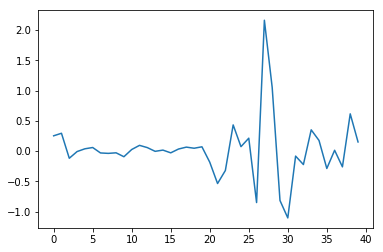

300


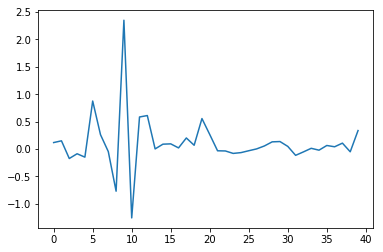

end 344
[array([ 1.61730567,  0.99661648, -0.79526838, -0.42114836, -0.02929066,
       -0.27132602,  0.15283345,  0.3743372 , -0.26169511, -0.04277314,
        0.20355251, -0.07336996,  0.03154442,  0.03304684, -0.02073967,
       -0.00587511, -0.00626974, -0.00467321,  0.02743886,  0.0323849 ,
       -0.05435638,  0.00529563,  0.05001773,  0.07149376,  0.06328668,
        0.04142799,  0.13049675,  0.08077704,  0.07865953,  0.05176125,
        0.29906365,  0.00460903, -0.12638585,  0.1306468 ,  0.11897774,
        0.37351204,  0.32448608, -1.60376573, -0.80909352, -1.25094259])]
[0.93917275 0.54149401 0.67475746 0.23030918 0.17014255 0.40864411
 0.3469002  0.31159192 0.11099489 0.74398001 0.80587568 0.39366318
 0.18151096 0.46453313 0.9183574  0.09476905 0.58760485 0.82948259
 0.19781504 0.27520329 0.06117541 0.06859255 0.09364299 0.79789218
 0.68792019 0.22815288 0.27692762 0.62470287 0.03808212 0.5851684
 0.1819167  0.06868142 0.68156459 0.26314272 0.5621596  0.79663204
 0.14858967 

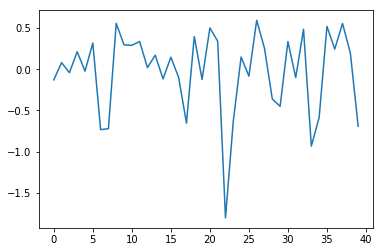

end 39
[array([ 0.24352473,  0.0686022 , -0.01051959,  0.01511369,  0.34384256,
       -0.2457915 , -0.10744138, -0.2156439 , -0.04475682,  1.33178013,
       -0.09158589,  1.34605829,  0.85628276, -1.31736627,  1.63953519,
       -0.3957395 , -0.70897961, -0.29711837,  0.3129654 ,  0.14386285,
       -0.13610724,  0.018134  , -0.02495855,  0.01147025,  0.01385227,
       -0.05028655, -0.02688281,  0.00913586,  0.00480346, -0.00552665,
        0.01033547,  0.01448345, -0.01945003, -0.03469323,  0.05308588,
        0.06697755, -0.00973789, -0.15965264,  0.07836609,  0.12652886])]
[0.07371753 0.69837829 0.34568592 0.76337846 0.03902271 0.09274014
 0.63904875 0.31239465 0.89433714 0.24861198 0.07395671 0.29431556
 0.38271035 0.22819755 0.20807833 0.01494103 0.8837188  0.41845468
 0.4169734  0.35143669 0.9085446  0.81565995 0.37864364 0.85484825
 0.09939912 0.55968895 0.6835296  0.13297452 0.24299378 0.07756743
 0.32158918 0.60290276 0.87807819 0.49090308 0.13128379 0.74410711
 0.29844184 

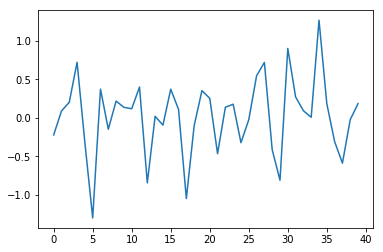

end 29
[array([-0.14420528,  0.00721278,  0.1724097 , -0.15463653, -0.05677486,
       -0.04099594, -0.07156863,  0.12492939,  0.12290239, -0.14261739,
       -0.00805549,  0.0567174 , -0.03471717,  0.03236115, -0.26224217,
       -0.2216384 , -0.00640674,  0.08078527,  0.09337334,  0.18941185,
       -1.44908291, -0.55206545,  0.79622692,  0.07084142,  0.32154581,
        0.17944274, -0.81494706,  0.55660856,  1.49611375, -0.39596982,
       -0.24922246,  0.04188891,  1.06066457, -0.34119665, -0.99545615,
        0.79934036, -0.43187147, -0.13153412, -0.04909618,  0.0121209 ])]
[0.56506876 0.01137961 0.0769472  0.05043591 0.84629256 0.30529199
 0.64890412 0.85026409 0.1083141  0.78785469 0.40479766 0.26329482
 0.27790161 0.34950761 0.36060213 0.73155143 0.42036918 0.41045632
 0.54003364 0.58730966 0.10033022 0.64855135 0.72538768 0.10469608
 0.92004549 0.52357945 0.67295953 0.10827718 0.25138892 0.3909503
 0.34340776 0.0266499  0.93351991 0.31137095 0.42937349 0.20382649
 0.31452986 0

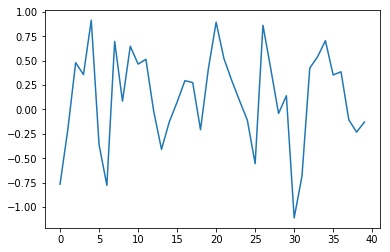

end 36
[array([-5.65301086e-02, -3.67176243e-01,  1.18692273e-01, -6.45944849e-01,
        7.96046359e-01,  2.01141921e+00, -1.55210040e-01, -1.95964096e+00,
       -2.76534456e-01,  6.74748256e-01,  1.58159661e-01, -2.77734361e-01,
        1.34334395e-02,  3.12676562e-03,  4.89632063e-03, -4.82452640e-03,
        3.79940751e-02, -3.54888954e-02,  3.61520875e-04,  4.30138464e-02,
        1.34387737e-01,  5.23021918e-02, -6.91123037e-02, -2.40622199e-01,
        8.18903800e-02, -8.61603462e-02,  7.02259922e-03,  1.17705519e-01,
        1.30937891e-01, -2.25061546e-01, -1.97326618e-01,  3.20516405e-02,
        1.45685613e-01, -2.86703076e-02,  9.75069182e-04,  4.15989626e-02,
       -7.81918403e-03, -6.43786369e-02, -2.94576115e-02,  7.54142182e-03])]
[0.84103062 0.10530379 0.19929389 0.59948763 0.50448787 0.29510438
 0.61726598 0.61799501 0.80240461 0.81036865 0.06729256 0.12985165
 0.73701331 0.11949876 0.71349693 0.07174578 0.19188312 0.0045115
 0.03769658 0.25751257 0.82333975 0.2059

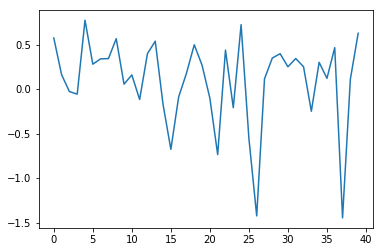

end 77
[array([ 0.19313141, -0.40203133,  1.13012231,  0.46860106,  1.0428541 ,
        0.20348017, -0.3725186 ,  0.41599187, -0.18183019,  1.14213122,
       -1.76319174, -0.98460612,  0.28498625,  0.83026544, -0.50001349,
       -0.46853465,  0.17779963,  0.19818135, -0.03841287, -0.00430228,
       -0.01233804,  0.07433179,  0.0236027 ,  0.15967025, -0.06139575,
       -0.03470431,  0.06875234,  0.09378562, -0.05279044, -0.08164628,
        0.03425577, -0.0036695 ,  0.11546031, -0.01315112, -0.03038378,
        0.04272791,  0.16909998, -0.11789034, -0.01486388,  0.12413028])]
[0.43234668 0.71883406 0.48472328 0.86066604 0.65244906 0.48121427
 0.38964749 0.53107838 0.33986913 0.28924974 0.71156556 0.85728225
 0.1259474  0.73060277 0.09541811 0.80417696 0.78421418 0.70493927
 0.04169369 0.08920253 0.13800144 0.04126785 0.85050717 0.13333769
 0.07760006 0.14477083 0.36385901 0.71589763 0.21717756 0.01920981
 0.40383283 0.62045485 0.60001375 0.55149446 0.1233295  0.4003164
 0.42234942 0

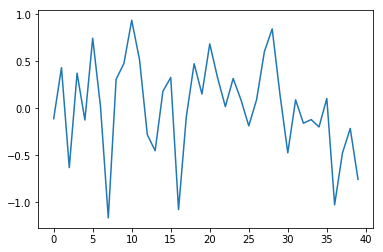

end 25
[array([ 5.75635388e-01,  1.10386924e-01,  7.35498425e-01,  8.44140116e-01,
       -1.04988626e+00, -3.49212482e-02,  7.68986990e-01, -3.82725758e-01,
        1.70163427e-01,  8.25927114e-01, -8.32230462e-01, -1.09544903e+00,
        5.78961818e-01,  2.63268839e-01,  1.23708174e-01, -3.25724058e-01,
        7.22551625e-01,  4.55346680e-01,  1.53248262e-01, -3.17342430e-01,
        5.21233731e-01, -1.30088512e-02,  8.26240249e-02, -5.26511608e-02,
       -1.53510585e-02,  1.78118239e-02,  1.14666207e-03, -1.94647520e-02,
        6.19788460e-02,  5.97859623e-02, -3.48684029e-02, -1.05135692e-02,
        2.06756793e-02,  5.93615605e-02,  1.82505720e-01, -4.91231374e-01,
        1.29844725e-02, -2.29870730e-01, -1.37610328e+00,  2.49028514e-01])]
[0.87879116 0.55418887 0.17311427 0.73171386 0.23022602 0.03281594
 0.22849801 0.28694028 0.74348543 0.01926344 0.3689826  0.02066661
 0.13394044 0.74972156 0.05628595 0.233233   0.84971027 0.87929595
 0.56108884 0.42521703 0.34840217 0.803

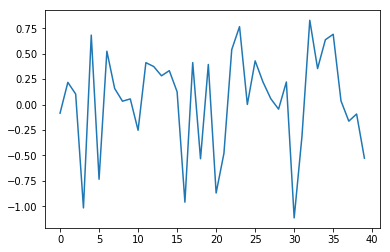

end 20
[array([-0.00838008, -0.02800951,  0.01053851,  0.01021173, -0.0323919 ,
        0.0613474 , -0.0235469 , -0.02051507, -0.00829393, -0.00607485,
       -0.19745909,  0.06425165,  0.0510813 , -0.18045011, -0.04456865,
       -0.00472463, -0.08489   ,  0.1926939 ,  0.24827864,  0.03360022,
        0.07913564,  0.11285987,  1.07693825,  1.7586434 ,  0.68961751,
        1.10904292, -1.53440812,  0.29778641,  0.28170227, -0.78886313,
       -0.69625754, -0.16655838,  0.32229456,  0.02021219, -0.25543989,
        0.0265974 ,  0.01164041, -0.01805451, -0.02198341,  0.00340757])]
[0.75203427 0.70044309 0.71067639 0.20279806 0.13557033 0.52358922
 0.04156613 0.76065153 0.75903731 0.56951413 0.05723818 0.03177491
 0.572486   0.61657992 0.40135244 0.63677289 0.03961337 0.11427395
 0.03921591 0.49567384 0.70379561 0.77352264 0.77861834 0.77812577
 0.1957913  0.75317219 0.70673119 0.54754045 0.29661259 0.18157559
 0.10125197 0.00744168 0.17369628 0.47341731 0.06872935 0.35389182
 0.29054503 

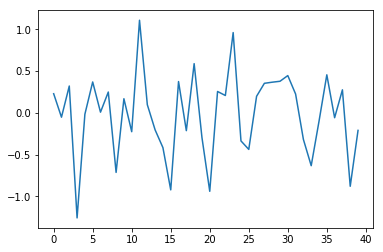

end 62
[array([ 1.83995394e-01,  4.35679268e-01,  1.06019213e+00, -2.29800618e+00,
       -4.17670687e-01, -8.57137314e-01,  8.85240483e-01, -5.33700716e-01,
       -1.54852733e-01,  7.70336287e-01,  9.67480265e-02, -6.17257834e-01,
        3.02699528e-02, -5.39857756e-04,  2.81817300e-03, -5.75146638e-02,
       -2.65387755e-02, -6.51633474e-02,  7.92328779e-03,  4.54635168e-02,
       -1.02522476e-01, -4.30977324e-02,  9.97400803e-03, -1.74856985e-02,
        1.13830558e-02, -5.46402360e-04, -9.98140849e-03, -6.99011529e-02,
        4.89398704e-02, -5.56120054e-02, -1.97817418e-01,  5.18906122e-02,
       -6.93232192e-02, -8.61198498e-02,  4.72394087e-02,  3.31783463e-01,
        6.19951739e-02,  2.91508443e-01,  2.93023084e-01, -1.01848182e-01])]
[0.29434607 0.45660579 0.39285042 0.31654667 0.28657535 0.7852104
 0.35161545 0.74950289 0.76023775 0.59965082 0.6577149  0.11591923
 0.2728016  0.21969553 0.64936303 0.61931139 0.38506991 0.27002162
 0.80260038 0.92674946 0.05697822 0.0411

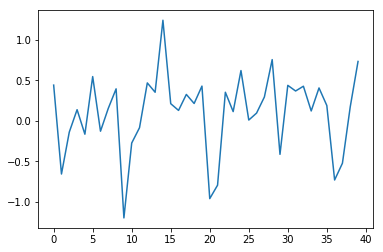

end 24
[array([-0.00672498, -0.13154352,  0.00247978,  0.12233436, -0.05920181,
       -0.02720217, -0.01550466,  0.00220026,  0.00617116, -0.0029016 ,
        0.03478826,  0.01495464,  0.02117559,  0.01686513,  0.01349457,
       -0.00776812,  0.06639055, -0.03247156,  0.00449187, -0.04474792,
       -0.11914838, -0.16122566, -0.23362789, -0.29210863, -0.30842608,
        0.1144266 ,  0.15824431,  0.26268494,  2.09644806,  1.10703939,
       -0.79019377, -1.47357684,  0.77435999, -0.56054014, -0.39198441,
        0.03412985,  0.19523219, -0.07117501, -0.15857081,  0.13205163])]
[0.5670691  0.34943084 0.34463409 0.8762453  0.32583873 0.14713665
 0.76279897 0.67543713 0.44880743 0.0489017  0.13682512 0.73868301
 0.44203774 0.44365581 0.30476639 0.35356044 0.06602776 0.48714979
 0.54998604 0.30961509 0.16751915 0.32165474 0.35610464 0.5057381
 0.46553003 0.44426067 0.82796227 0.78706069 0.27171792 0.44995303
 0.65512961 0.5150309  0.26633662 0.3879431  0.24292747 0.36455955
 0.55159377 0

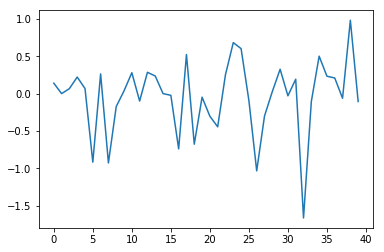

end 97
[array([-0.47225385, -0.35060364,  0.36067752, -0.41523823, -0.0389913 ,
        0.26726713, -0.15943732, -0.56784414,  0.05488691, -0.14080182,
        0.16235994, -0.157776  , -0.08309711,  0.10826473, -0.00702758,
       -0.02279692,  0.0293987 ,  0.02112947,  0.0412195 , -0.37224764,
        0.20890791, -0.28568851,  0.13126074, -0.53433479, -0.19903191,
        0.0282678 ,  0.08327625,  0.97490252,  1.27957014,  1.46614245,
       -0.30595347, -1.00085703,  0.68245372,  0.02097342, -0.04091357,
       -0.11531259, -0.22525531,  1.14884326, -0.73212603,  0.01151938])]
[0.66209772 0.40397388 0.38387097 0.5034406  0.80261571 0.6026007
 0.805313   0.03913091 0.22737513 0.20016729 0.39016005 0.43377046
 0.17953198 0.17320758 0.39487768 0.7481147  0.60547994 0.16597194
 0.10329136 0.20346124 0.6084687  0.58051042 0.40570351 0.64872779
 0.58540452 0.43628035 0.34797878 0.6927369  0.78991372 0.30653606
 0.74095122 0.20504135 0.48922665 0.7088876  0.40301426 0.42630082
 0.56582569 0

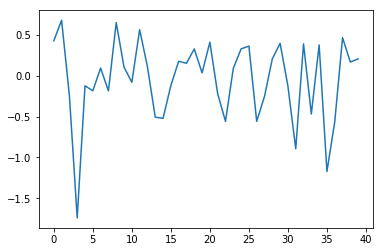

end 15
[array([ 0.04361129, -0.06660586,  0.01004715,  0.08026814, -0.01731385,
       -0.0327716 ,  0.00932951,  0.01813135,  0.01967112,  0.00996905,
        0.00426664, -0.0361303 , -0.01758162, -0.00882893, -0.03908353,
        0.03882703, -0.0179198 , -0.0496225 ,  0.06279897,  0.09376895,
       -0.30650989, -0.19277596,  0.04341683,  0.06277355,  0.88226455,
       -1.53996473, -1.62058637, -0.28561044,  1.78540892, -0.36262782,
        0.53974056,  0.39525646, -0.42874974, -0.03586988, -0.03537025,
       -0.00903779,  0.02932736,  0.05710519,  0.02428534, -0.10952744])]
[0.74836951 0.37594097 0.29328726 0.78185737 0.26429681 0.53602256
 0.08650949 0.73030726 0.47690528 0.75493985 0.19807981 0.17544066
 0.08049652 0.83409883 0.54903061 0.3389981  0.61053517 0.63598302
 0.56187313 0.416849   0.373081   0.75839494 0.57536182 0.43502952
 0.67509672 0.21583889 0.58653212 0.18389415 0.46874045 0.75934654
 0.01274855 0.63647741 0.54113997 0.48405473 0.0786811  0.11948009
 0.43383158 

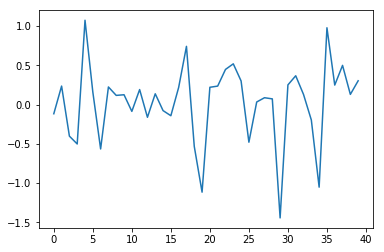

end 25
[array([ 0.25304591, -0.1010826 ,  0.2471806 ,  0.87958198,  0.18344699,
       -0.12089514,  0.18013161,  0.13290642, -0.56292908,  1.08404139,
        0.80598265,  0.11941258, -0.25527255, -0.03450371,  0.24393155,
        0.56880874,  0.16685247,  0.7463593 ,  0.18479019, -0.96850593,
       -0.60114542,  0.19918855,  0.13618029, -0.2186025 , -0.04339137,
       -0.13856757, -0.22838035, -1.19644274, -0.66177926,  1.31358208,
        0.65662277,  0.021173  ,  0.01443533,  0.24023711,  0.03283521,
       -0.16126531,  0.15032822,  0.03824587, -0.16048226,  0.35817128])]
[0.20227562 0.06971545 0.73323091 0.75013168 0.59596356 0.86195206
 0.42228993 0.56647272 0.61427531 0.36978853 0.31311993 0.08124665
 0.49463988 0.44186045 0.00567593 0.26763774 0.66147969 0.12492022
 0.2176703  0.81981843 0.56067805 0.73037876 0.06870562 0.37391353
 0.68785448 0.11408296 0.74350504 0.76790793 0.14630007 0.19260414
 0.21157196 0.22903955 0.27123477 0.24745902 0.37289111 0.71694841
 0.2531686  

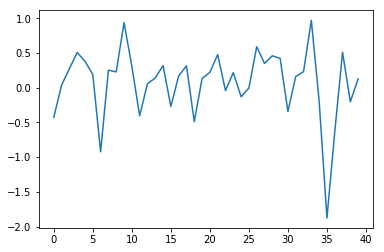

end 8
[array([ 5.01987165e-02, -2.91769053e-02, -9.83845397e-03,  4.56756336e-02,
        9.70831113e-03,  1.96817434e-02,  3.06751005e-02, -4.50883453e-02,
       -1.32736752e-02, -9.51078281e-03,  1.37715237e-02, -5.45933995e-02,
       -1.05022473e-01,  1.93709079e-02, -6.07725320e-02, -6.32292455e-02,
        1.04388858e-01, -5.53619277e-02, -2.86012699e-01, -1.89793618e-01,
       -1.44899474e-02, -2.40184821e-01,  1.43045962e-01, -3.39358195e-01,
       -4.68712988e-01, -1.51773293e+00, -1.17821329e-01,  1.99385815e+00,
        5.06145239e-01,  1.21146276e+00, -9.97253639e-01, -5.18106654e-01,
        2.61892973e-01,  1.07713782e-01, -2.12498728e-01,  9.66560657e-04,
        8.62989199e-02, -8.67925091e-02, -2.51113627e-02, -5.34421242e-02])]
[0.29700371 0.59068671 0.5996072  0.84314453 0.52562421 0.04726455
 0.07290518 0.37691573 0.31698812 0.67048995 0.56680414 0.04046765
 0.79739232 0.51662555 0.18611653 0.54910936 0.33695961 0.10887785
 0.05245497 0.30582405 0.35734904 0.4189

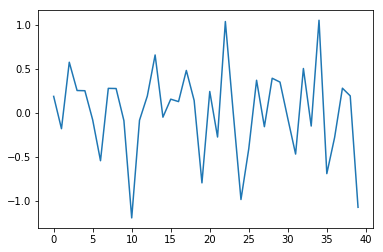

end 55
[array([-1.12707582e-02,  2.12327670e-02,  4.20669574e-02, -2.06839109e-02,
        7.76590328e-02, -1.27567413e-01, -8.20024674e-02,  5.80976087e-02,
        1.43861085e-01,  1.84970616e-01,  1.39174645e+00,  1.09870454e+00,
       -2.25996040e+00,  1.06715271e-03,  9.88323195e-01, -7.53823748e-03,
       -6.87296510e-01, -3.18882415e-01,  2.63778114e-01,  1.62638714e-01,
       -7.12581378e-02,  7.34011493e-03,  2.65145234e-02, -2.07488468e-02,
        3.91128930e-02, -7.27332482e-03,  6.32915530e-03, -3.24432834e-03,
       -6.67270897e-03, -4.18774224e-03,  5.58309297e-03, -2.73755216e-03,
       -1.09597532e-02,  1.22416539e-02, -1.25855065e-02, -3.17052273e-03,
        1.83045788e-02, -3.11398151e-02,  3.51109827e-02, -2.17036390e-02])]
[5.81669832e-01 5.51316792e-01 4.45139530e-01 7.53275373e-01
 9.34041910e-03 1.65807414e-01 3.28609954e-02 4.90785337e-01
 1.53394662e-01 7.38997239e-01 4.26266589e-01 5.42468559e-01
 2.59384585e-01 1.50423453e-02 2.51012107e-01 4.57286325e

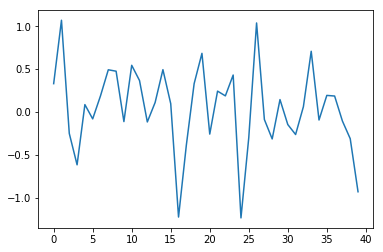

end 29
[array([ 4.63379188e-02,  3.68224121e-02,  1.21141810e-01,  9.85685194e-02,
        1.60587645e-01,  5.14191774e-02, -6.76654218e-02, -1.14390151e-01,
       -1.20407221e-03,  2.37222170e-02, -1.48407083e+00, -1.38558925e+00,
       -1.58322597e-01, -1.49734443e+00,  1.49903265e+00,  1.05600972e+00,
        1.27400622e-01, -3.21698906e-01, -8.32010882e-02,  1.77095739e-01,
        1.15306374e-01,  8.67218624e-03,  1.72816886e-02, -4.75024598e-03,
       -1.23659371e-02, -1.28180948e-02, -1.81880945e-02, -2.79953075e-02,
        6.38427085e-03,  8.10882732e-03, -8.80810792e-03,  9.06199508e-04,
       -2.62372147e-03, -7.67319460e-04,  1.75817363e-03, -8.67921260e-03,
       -5.12079172e-03, -1.13098758e-02, -1.41181287e-02, -2.35047326e-03])]
[0.51377278 0.34543723 0.59161675 0.6416019  0.01840653 0.47271625
 0.00318871 0.66499582 0.10373774 0.60584765 0.20352316 0.87702184
 0.28940375 0.40519356 0.4195983  0.7514735  0.07664085 0.68069645
 0.55938397 0.68431881 0.55327356 0.072

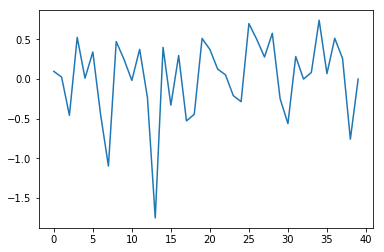

end 14
[array([ 2.32840453e-02, -3.09650675e-01, -5.05534288e-01, -5.60606762e-01,
        9.26691445e-01,  7.42914979e-02, -4.93291529e-01,  3.98747968e-01,
        1.37539358e+00,  1.11351649e-01, -2.03397778e+00, -1.18981052e+00,
       -2.68717100e-01,  6.35921109e-01,  9.20074520e-02, -8.75900221e-02,
       -6.88594942e-02, -1.70146603e-02, -2.98506168e-03, -3.05472142e-02,
        3.13760511e-02,  1.15833079e-01,  5.16569489e-02,  1.11907612e-01,
       -5.93624623e-02,  9.06981887e-02,  1.42162699e-02, -3.23638769e-02,
        3.86184056e-02,  9.03241428e-02, -1.49344575e-01, -6.85475344e-02,
       -6.70658696e-02, -1.49067485e-03, -4.53814289e-03,  4.70993188e-02,
       -4.90585433e-02, -1.41928847e-01, -3.23922244e-02,  4.46762689e-02])]
[0.3194321  0.64080592 0.04207596 0.6365816  0.31583179 0.06334416
 0.61407775 0.17709083 0.67008299 0.78571055 0.37320088 0.30897638
 0.60082846 0.07076534 0.4136841  0.29149839 0.61858936 0.452362
 0.70946865 0.29895463 0.58083996 0.39073

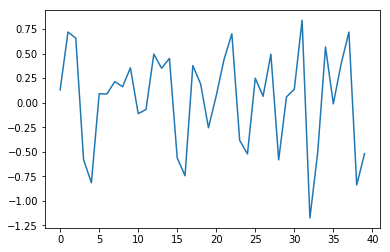

end 7
[array([-3.35241240e-02,  2.82974622e-02,  3.47997190e-01,  1.81484314e-01,
        5.07673020e-01, -5.52879798e-01, -1.63895553e-01,  2.45629854e-01,
        6.49279299e-01,  3.31815933e-01, -6.74496295e-03, -6.84736801e-01,
        4.38230574e-02, -3.08375226e-01,  3.28493795e-01,  7.08604117e-01,
        7.53712440e-01, -1.67523323e+00,  2.45741373e-01, -1.57476106e+00,
        1.95355410e-01,  1.10355611e+00, -1.80693170e-01, -3.48276953e-01,
        2.45363977e-01,  1.91303801e-01, -6.25073956e-02,  1.45231160e-02,
        1.04759674e-01, -5.17459443e-02,  2.97257330e-03,  1.88325175e-01,
        3.90131466e-02,  1.97147772e-02,  2.50703845e-02,  3.28433827e-02,
       -7.92761400e-02,  6.82851219e-04,  6.71126339e-03,  3.35100591e-02])]
[0.72934067 0.24489995 0.29607085 0.47170486 0.34494328 0.20423205
 0.48759694 0.64588983 0.41981823 0.16068218 0.64668395 0.11255001
 0.77057213 0.26587377 0.0241041  0.48657561 0.30727218 0.67168883
 0.67024929 0.81751002 0.65330092 0.3558

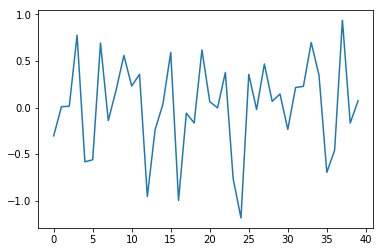

end 37
[array([ 1.78821171e+00,  5.59221533e-01,  1.00880954e-01, -1.27917877e+00,
        3.48478423e-02,  1.01925947e+00, -2.78347886e-01, -2.93893395e-01,
        3.89233675e-02,  6.42954034e-01, -3.98622227e-02, -5.02656813e-01,
        2.23921826e-02,  2.16260312e-02, -1.57036148e-01, -2.83436649e-02,
       -2.06032647e-01, -3.37965460e-02, -7.69696866e-02, -3.57751682e-01,
       -7.26416812e-02,  6.44514360e-02,  5.09141192e-02, -4.59381889e-02,
       -8.92820377e-02, -1.32005882e-02,  8.52399738e-02, -4.27987864e-02,
        4.69020675e-02, -3.43024691e-02, -3.13746550e-02, -1.91957000e-01,
       -7.26936219e-04,  2.07646623e-01, -1.25443520e-01, -9.47490765e-02,
        4.01074282e-01, -1.10992019e+00, -1.05114382e+00, -3.57692935e-01])]
[0.35990217 0.05464169 0.28520221 0.31709149 0.78874708 0.46275801
 0.1975553  0.02276788 0.35180887 0.35068943 0.51535371 0.13328292
 0.7319382  0.76135239 0.71977213 0.55435956 0.70066411 0.09004437
 0.81956046 0.64578605 0.49251845 0.274

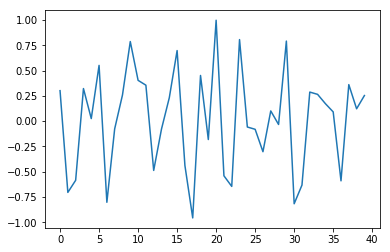

end 13
[array([-0.00422527,  0.03532034,  0.06777497, -0.04417687, -0.0106264 ,
        0.03151102,  0.0150527 ,  0.01240142, -0.05674991,  0.01685826,
       -0.01283738, -0.029713  , -0.00826892,  0.24071633, -0.04061857,
       -0.02117604, -0.13916503,  0.11996961, -0.13259235, -0.16747195,
       -0.04411424, -0.34419106,  0.02298564,  0.03930971, -0.24829443,
       -0.97861886, -0.418985  , -1.36446757, -0.03528575,  0.73155314,
       -1.07477468,  0.67890797,  1.20829999, -0.49148906, -1.38682455,
       -0.24566601,  0.88614705, -0.04264069, -0.18164616,  0.09886385])]
[0.09162832 0.04794786 0.44108956 0.4225621  0.70341338 0.80059485
 0.20259782 0.41313833 0.10938692 0.61811109 0.59524958 0.16284997
 0.6120749  0.71331734 0.18146394 0.35880433 0.0732556  0.32709997
 0.17008738 0.46953049 0.72860031 0.76328173 0.76398272 0.62659158
 0.18017126 0.41711393 0.29881401 0.63723483 0.22076216 0.6445658
 0.49929577 0.19408441 0.38076826 0.54327261 0.50779181 0.76401526
 0.3662667  0

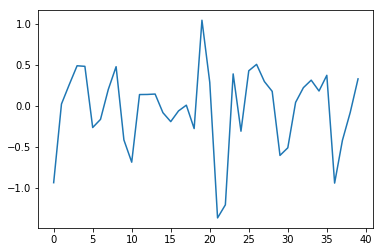

end 7
[array([-0.29899898, -0.15136005,  0.03275276, -0.01126328, -0.06259343,
        0.0466699 ,  0.05670795,  0.03485406, -0.07791422, -0.1894934 ,
       -0.07819893,  0.26322288,  0.88012217,  1.79514319, -0.16947353,
       -1.4818955 ,  1.4194321 , -0.52965998, -0.69881787,  0.56729557,
        0.122191  , -0.05807978, -0.05368859,  0.02203807, -0.01717238,
        0.04318854,  0.02898491, -0.03260742, -0.04094323, -0.0281238 ,
       -0.19555936,  0.02215922,  0.13113314,  0.17216612, -0.10108202,
       -0.27266467,  0.09212332, -0.03754678,  0.25518955, -0.39729095])]
[0.17969343 0.01455803 0.39454175 0.05082777 0.5331154  0.04156865
 0.28762072 0.11189144 0.09598813 0.49255301 0.35986928 0.39966568
 0.17033082 0.30738748 0.85696411 0.00432802 0.74241633 0.15145808
 0.99607309 0.87620252 0.37307237 0.14330049 0.2836921  0.36200784
 0.71116781 0.55406026 0.43459651 0.08951176 0.2291667  0.3518245
 0.03524771 0.93011276 0.49099023 0.0118308  0.1841852  0.88835687
 0.45946735 0.

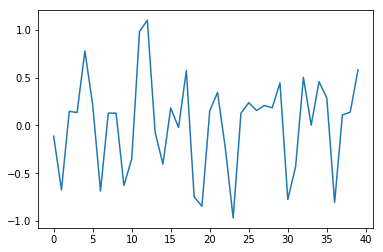

end 18
[array([ 0.04523874, -0.10948544, -0.01939318, -0.05803553, -0.09652448,
       -0.28449797,  0.05204558,  0.22941077, -0.05685674,  0.04982152,
       -0.09402401, -0.01751128,  0.10925499, -0.00925267,  0.00749629,
       -0.03696317, -0.02877625,  0.00385418,  0.03566936,  0.06130961,
       -0.07279524, -0.15412527, -0.14068572, -0.05218944,  1.4520024 ,
        1.1184012 ,  0.66000745, -0.17979216, -1.28414922,  0.61064713,
        1.51921773,  0.53965502, -0.60944448, -0.30065456,  0.24116244,
       -0.21947772, -0.58539473,  0.56611503,  0.18974935,  0.18790217])]
[0.48026967 0.11971755 0.5069384  0.43662445 0.40093631 0.1461571
 0.50078887 0.21249231 0.03411198 0.54371466 0.74854784 0.64965208
 0.70511625 0.14544867 0.54899279 0.1166691  0.69437807 0.68043285
 0.41460453 0.37494131 0.60223056 0.75246504 0.26599147 0.08371244
 0.51722628 0.75472143 0.43123032 0.00892315 0.6968183  0.45899534
 0.00962139 0.39153018 0.75249602 0.17254039 0.68330259 0.73469842
 0.04385066 0

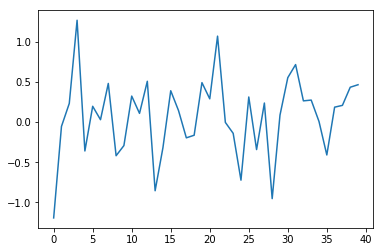

end 12
[array([ 0.07183755,  0.00503485, -0.00248489,  0.01172905,  0.04635662,
        0.02965456,  0.05950065, -0.02210585, -0.00595572,  0.05134746,
        0.00737827,  0.00817393,  0.0157572 ,  0.05033485, -0.11456572,
       -0.40356757,  0.18433467,  0.56884756,  1.51576607,  0.52153155,
        1.79001204, -0.33529067, -0.38995568,  1.67526757, -0.14478978,
       -0.61455505, -0.09584011, -0.02502707,  0.0932448 ,  0.26697499,
        0.06794255,  0.11879674, -0.01004503, -0.12343656, -0.14320627,
       -0.1006415 ,  0.01135675,  0.09250751, -0.17473382,  0.10696546])]
[2.82442095e-01 2.74148518e-01 4.40376417e-01 3.07421605e-03
 7.56361350e-01 5.92861814e-01 4.61174983e-02 7.73153277e-01
 2.88712976e-01 8.20387068e-01 6.31192939e-02 1.25983356e-01
 1.05011361e-01 4.61668780e-02 1.14396757e-04 5.95099633e-01
 5.96937261e-01 8.41293603e-01 3.58385584e-01 6.25840742e-01
 2.81155433e-01 7.15867036e-01 7.24785743e-01 6.31386231e-01
 2.01749601e-01 4.78040841e-01 1.32728027e-01 5.

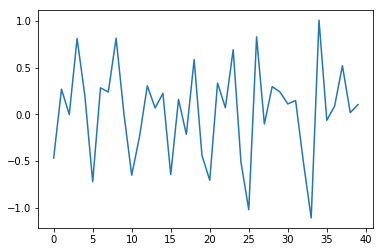

end 37
[array([ 0.05742413, -0.00976973, -0.03962619,  0.01242759, -0.05284249,
        0.01500831, -0.0243638 , -0.04538832,  0.01875712,  0.03781182,
        0.09188819,  0.07885105,  0.03012979,  0.17000293,  0.6271255 ,
        0.02280647, -0.39484888, -0.68231865,  0.11691953, -0.10106127,
        0.21904001,  0.13187098,  0.01522652,  1.28688195,  0.77061091,
        1.37368588, -1.25475348, -1.35346079,  0.03761705,  1.00637582,
        0.28835925,  0.41993303,  0.09109341, -0.04463085, -0.01738091,
       -0.05107546,  0.03109459, -0.00740446, -0.08063315,  0.02443611])]
[0.46473143 0.68235745 0.27563874 0.52079276 0.28067666 0.30743317
 0.34331499 0.63033823 0.69357598 0.10791204 0.25613371 0.85258835
 0.51690302 0.1490467  0.91595585 0.70380898 0.90706905 0.1830292
 0.19779884 0.18072521 0.60863701 0.03466482 0.19977925 0.17215005
 0.18522636 0.49848201 0.6270013  0.36237555 0.37533997 0.27989825
 0.30618279 0.72789058 0.08342794 0.4716417  0.68514511 0.27075917
 0.66577101 0

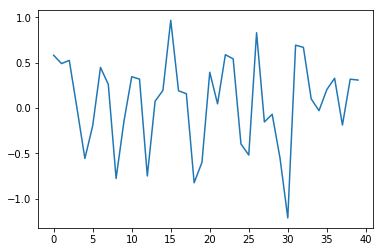

end 72
[array([-6.36155079e-05,  1.35247602e-01, -1.44918281e-02,  1.93248591e-02,
        2.79996096e-02, -6.35255604e-02, -4.19704515e-02,  2.26286788e-02,
        8.71396365e-02,  7.66724137e-02,  2.10284153e-02,  7.16114838e-02,
        7.38731729e-01,  1.35471025e+00,  9.54492301e-01,  1.49286720e+00,
       -1.51399115e+00, -1.32524504e+00,  3.50780054e-01,  2.68918531e-01,
       -1.74666241e-01,  5.51668873e-02,  1.43731192e-01,  3.01265689e-01,
        1.79239936e-02,  7.66066940e-02,  4.74565876e-02, -3.04956883e-02,
        8.56002079e-02,  6.85605669e-02, -3.45239715e-02, -4.78128961e-02,
        1.01934488e-01,  3.26073786e-02,  6.61988996e-03,  5.09321884e-02,
        4.15126531e-02,  9.07542608e-03,  6.85947296e-02, -7.57360355e-03])]
[0.84566174 0.45371031 0.51028289 0.05556921 0.45111716 0.77944907
 0.7753006  0.58225934 0.67989097 0.53885915 0.27740777 0.55244175
 0.42681677 0.41895149 0.4429013  0.53032623 0.84955708 0.57841421
 0.31586427 0.62065915 0.44899482 0.759

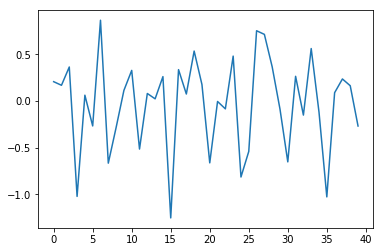

end 21
[array([ 2.88979212e-02,  2.66620371e-01, -2.34972526e-01, -5.19830971e-01,
        4.84459716e-01, -2.06130750e-01, -2.77445739e-01,  1.70340937e-01,
       -8.56790314e-01, -8.79878179e-01,  4.46649680e-01,  1.66069006e-01,
        1.02277810e+00, -9.37664115e-02, -2.38716618e-01,  3.52167174e-01,
        1.77211158e-01, -2.36065766e+00, -2.93240141e-01, -3.80173317e-02,
        4.78135428e-01, -1.42128309e-01,  7.72044274e-03,  1.12316259e-01,
       -3.09231456e-02, -2.73053547e-02,  6.66520470e-02, -3.70591446e-02,
       -1.60848161e-02,  2.23120464e-03,  1.25471248e-02,  4.15904294e-02,
       -4.15289931e-02,  8.21840311e-02,  5.27422424e-02, -4.90801784e-02,
       -4.05738450e-01,  3.12936098e-01,  2.45024683e-02, -9.33336465e-02])]
[0.9049573  0.24385309 0.34068978 0.47126721 0.36191964 0.78739474
 0.61791026 0.45208439 0.05583091 0.57809997 0.07082452 0.92452727
 0.92650191 0.55833196 0.41862777 0.39681064 0.05739776 0.64585704
 0.58768356 0.46063473 0.39224783 0.320

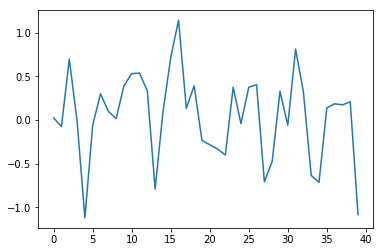

end 45
[array([-0.6426563 , -0.17089737,  0.3445588 ,  0.06283817, -0.23128648,
        0.0198642 , -0.04185762,  0.00784456,  0.01075542, -0.03511936,
        0.02249628,  0.03329658, -0.05592283,  0.14985534,  0.26789159,
       -0.07999596,  0.06358525, -0.02070631, -0.02791155, -0.09850587,
        0.00385276,  0.06123088, -0.06583151, -0.01332947,  0.03877207,
        0.10706897, -0.13944174, -0.3422582 ,  0.31562059,  0.30990881,
       -1.06496862,  2.45894635,  0.64356922,  0.93271254,  0.07260205,
       -0.44775529,  0.05041786,  0.03443512,  0.47141267,  0.08853662])]
[0.75484277 0.15343342 0.31558781 0.64153129 0.59072674 0.71504205
 0.40919247 0.2028547  0.18107246 0.74341561 0.12276513 0.10559323
 0.17244513 0.65786461 0.59795241 0.54706751 0.3789806  0.09376967
 0.18808331 0.67547535 0.61606421 0.42903857 0.42617768 0.68449517
 0.17387387 0.14053153 0.4392627  0.51487497 0.76591361 0.66942759
 0.52667368 0.0932064  0.75089539 0.69014722 0.18857117 0.17254181
 0.41429024 

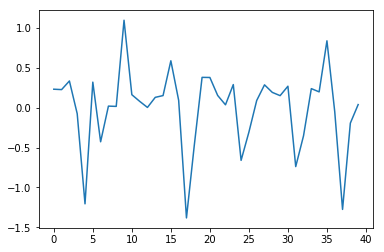

100


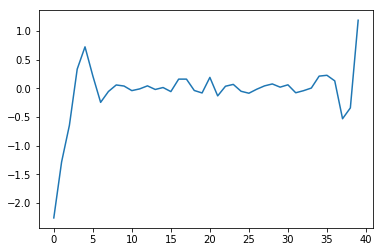

end 163
[array([ 0.01863336, -0.02028969, -0.01556348,  0.02268036,  0.02727644,
        0.07152272,  0.42539263,  0.37906377,  0.00883776,  0.77526762,
       -0.03888211, -1.10384959,  0.4766588 ,  0.45642757, -0.63581523,
        0.57316507,  0.04711348, -0.02589293, -0.22082411,  0.99192058,
        0.06080966,  1.23085299, -0.23541225, -1.40235677,  0.3594232 ,
        0.49740668,  0.80814054, -0.39356025, -0.22854167,  0.8134995 ,
       -0.01238836,  0.15866041,  0.25256601, -0.32290907,  0.02729212,
       -0.08602998, -0.01407653, -0.02503269,  0.01885502,  0.03113165])]
[0.30564423 0.69555692 0.25324529 0.78201036 0.03678173 0.42741974
 0.49705222 0.63269556 0.55640296 0.70056396 0.34968346 0.18339666
 0.75307261 0.41036182 0.17232539 0.53145326 0.5123598  0.62669082
 0.06370798 0.50764872 0.20808444 0.23174299 0.6240553  0.5379579
 0.78221055 0.48701171 0.68800995 0.5411874  0.65749517 0.05146451
 0.58755314 0.0347855  0.0160547  0.46696989 0.69436192 0.28204718
 0.12939415 

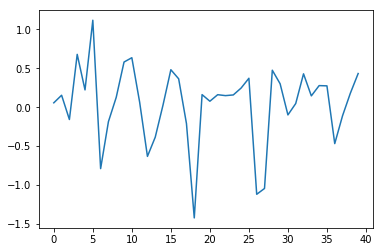

end 16
[array([ 3.11407039e-02, -2.09880802e-02, -3.63125155e-02, -3.79008084e-02,
        3.26470941e-02, -1.95686982e-02,  3.50798366e-02,  5.78900990e-02,
       -8.78292196e-03,  5.62907112e-02, -4.88662935e-02,  2.60202471e-02,
       -1.78623502e-01, -2.33761326e-01, -5.66734393e-01, -8.30808800e-01,
       -3.37041790e-01, -1.12713875e-01,  1.95819614e+00,  1.01527491e+00,
        9.33182586e-01, -1.64249195e+00, -5.18403038e-01, -2.12749640e-01,
        5.30601875e-02,  1.91277233e-02, -4.49993441e-02,  1.12125804e-02,
       -6.09588394e-03,  7.66488984e-03, -1.38325789e-02,  4.72002608e-03,
        9.49715755e-04,  1.91900601e-03, -7.67378851e-03,  1.44682590e-02,
       -6.20682165e-02,  1.45149669e-02,  4.14483251e-03,  3.58657910e-02])]
[0.31815098 0.62674112 0.23448681 0.37332007 0.03520632 0.87012987
 0.82991476 0.58659772 0.08568632 0.10887259 0.7843465  0.18286183
 0.42739299 0.41952664 0.5714352  0.75491978 0.14201691 0.07288826
 0.46393125 0.63077735 0.11409904 0.500

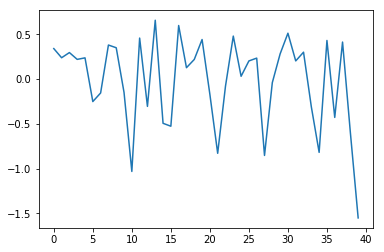

end 18
[array([-0.43792335, -0.73020115,  0.56512715,  1.02320588,  0.72602967,
        1.42064158,  0.19589849, -1.54904602,  1.27826922, -0.27534288,
       -0.60717964, -0.00762515,  0.0790071 ,  0.03584716,  0.04487174,
        0.36081067,  0.21558473, -0.1374354 , -0.13278961,  0.14237663,
        0.0411173 , -0.06137717, -0.06292   , -0.00867085,  0.05213408,
       -0.12051612, -0.03976637,  0.08669567, -0.05632865, -0.10484385,
       -0.22218717, -0.02302723,  0.09440777, -0.15052201,  0.06722988,
       -0.13657751, -0.13757422,  0.25952669, -0.6023915 , -0.01225634])]
[0.53957602 0.6765434  0.55799755 0.39658733 0.76084956 0.3354845
 0.30509256 0.31898319 0.20412525 0.71460874 0.4587333  0.49467723
 0.19238674 0.69681144 0.0363963  0.60855839 0.43943863 0.18389695
 0.31840166 0.63487622 0.1892565  0.46890983 0.39190618 0.64712309
 0.12937371 0.72279746 0.49975941 0.5343932  0.23347249 0.55823945
 0.72477303 0.0120536  0.73464344 0.48337119 0.29310504 0.70721589
 0.60034662 0

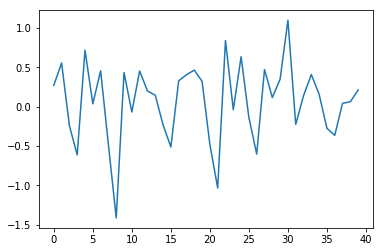

end 48
[array([-0.00578676, -0.00661497,  0.02163789, -0.01900706, -0.48449312,
       -0.35654387, -0.14661302,  0.11667813, -0.15934727, -0.18236561,
       -0.11819089, -0.10342099,  0.33330816, -0.40292945, -0.03077706,
        0.69662026, -0.21142459, -0.81467249, -0.49502173,  1.77311425,
        1.35682068,  0.92081174, -1.19897771, -0.54639142,  0.32335777,
        0.26528739, -0.1020262 ,  0.18510983,  0.11656955,  0.03870532,
       -0.00647806,  0.01040492, -0.00550176,  0.01021759,  0.0135906 ,
       -0.02500063, -0.01369562, -0.00265702, -0.0246529 ,  0.01494911])]
[5.83353111e-01 3.27499277e-01 6.26329534e-01 6.07746083e-02
 2.05960058e-01 7.77532964e-01 8.69506659e-01 6.20253646e-01
 4.76781359e-02 3.12434454e-01 1.81459261e-01 4.68083227e-02
 8.29650057e-01 3.29080481e-01 2.36179079e-01 4.87876061e-04
 2.11717629e-01 3.92741191e-01 5.59186824e-01 2.86165850e-01
 6.87092790e-01 2.17213436e-01 4.07953687e-02 6.39219352e-01
 4.53466317e-02 4.29129027e-01 7.01121934e-01 5.

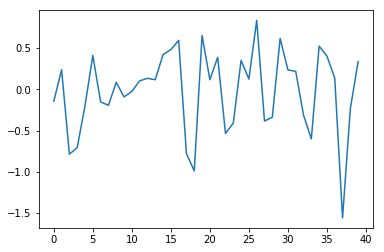

end 37
[array([ 0.02162822,  0.016842  , -0.03040704, -0.01118073,  0.01683868,
       -0.00312618,  0.02595689, -0.01193499,  0.05789756, -0.02123299,
       -0.20430702,  0.07704191, -0.15936421, -0.04768976, -0.00275212,
       -0.1945535 , -0.16140357,  0.0465128 ,  0.04200908, -0.51096823,
       -0.62503934, -0.01136905, -0.62429138, -0.0165107 ,  0.19396835,
       -0.0579468 , -1.32239883,  0.29217479,  1.10413775, -1.12644479,
       -0.89416671,  1.79798885, -0.27910011, -0.5404558 ,  0.1166225 ,
        0.04557744,  0.12849931, -0.04357177, -0.09327599,  0.00594622])]
[0.24779396 0.38615409 0.07636774 0.41746319 0.86713432 0.44847351
 0.09186982 0.06712347 0.48997049 0.82346262 0.37553847 0.01398188
 0.09526948 0.84141384 0.08916733 0.12411842 0.40154148 0.05279369
 0.1899661  0.79465984 0.77594158 0.81945186 0.85214887 0.1182709
 0.10588877 0.00292748 0.58540439 0.23929971 0.80756264 0.66412045
 0.27224173 0.23355689 0.14136925 0.93133722 0.67312602 0.22497542
 0.37721124 0

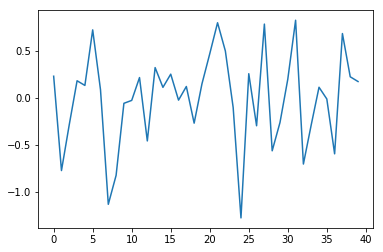

100


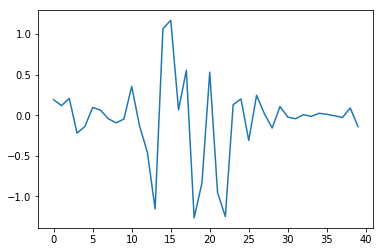

end 140
[array([-4.05447468e-02,  1.52400314e-01, -3.30265437e-01, -1.82297336e-01,
       -3.78392832e-02,  2.76916102e-02,  5.12667522e-02,  7.81942709e-02,
        1.20865420e-04,  4.04771966e-04,  9.72541176e-04,  1.61389471e-02,
        2.66524744e-02,  2.42110570e-03,  2.51745821e-02,  8.43888420e-02,
       -1.44891210e-01, -5.13314191e-01, -2.80935604e-02,  1.61734434e-02,
       -2.89961359e-01, -3.85239916e-02,  3.97828081e-03, -3.60673080e-01,
        2.28275093e-01,  1.58845403e-01,  2.41579661e-01, -1.36536416e-01,
        1.78885159e-01,  3.77533469e-01,  8.10579615e-01, -1.09489964e+00,
        1.49302775e+00,  9.02730646e-01,  1.41411300e+00,  1.21365217e+00,
       -6.21488282e-01, -5.53363500e-02,  4.11916308e-01, -2.26987399e-01])]
[0.59669528 0.90901545 0.60692645 0.38411991 0.33025352 0.59440853
 0.09228481 0.74400001 0.13385799 0.11577733 0.25624524 0.78964341
 0.08704573 0.80937052 0.64602642 0.80879905 0.56928363 0.36846224
 0.39103028 0.11719555 0.34943916 0.49

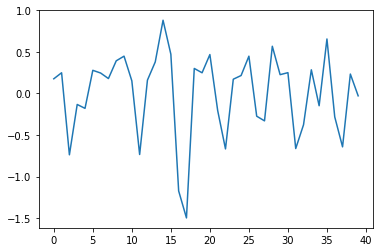

end 9
[array([-7.26912311e-02, -1.87290079e-02, -3.48656087e-01, -6.55968431e-01,
       -4.84998466e-01, -4.14627023e-01,  4.25318975e-01,  1.93473465e+00,
        1.29483243e+00,  1.55487071e+00, -5.96532359e-01, -7.13318640e-01,
        3.09037748e-01,  6.52874092e-02, -5.38183308e-02,  1.70693832e-02,
        3.42629565e-02,  4.99665647e-02, -7.87778621e-02,  6.53725450e-02,
        6.48462950e-02, -4.02310591e-02,  3.86696757e-02,  5.75119515e-02,
        6.26733008e-02, -3.12387116e-02, -2.89280767e-02,  4.37870435e-03,
       -3.63939598e-02,  8.58132462e-03,  7.54307529e-03,  2.22024405e-02,
       -2.47210446e-02,  4.85058296e-02, -1.51646307e-03,  3.82204876e-03,
       -3.56998273e-02,  2.13432305e-02, -4.15346232e-03, -1.10547007e-01])]
[0.66759223 0.53416791 0.20537513 0.16769189 0.68043589 0.00301195
 0.22925785 0.18191978 0.86550168 0.54171276 0.60516522 0.47818144
 0.54417553 0.20602862 0.20684389 0.33258448 0.45639923 0.71977636
 0.7931671  0.00965404 0.21727787 0.7091

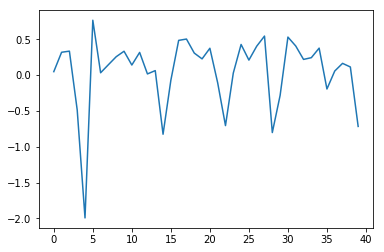

end 14
[array([ 0.34215362, -0.04503585,  0.1121804 ,  0.08268138, -0.01253692,
       -0.12846243, -0.05648149, -0.02963585,  0.05214445,  0.1866822 ,
       -0.01919311,  0.12904727,  0.13721547,  0.08331468,  0.00821157,
        0.11042506,  0.06702519, -0.03158197, -0.18755419, -0.09073992,
        0.03437315,  0.11716357,  0.08651471, -0.2228024 ,  0.02893209,
       -0.11839042, -0.19118489, -0.22260216,  1.02911822,  1.11181087,
       -0.11260329,  1.17864165,  0.92426866, -1.88586524,  0.65157518,
        0.57783287,  0.11047174, -0.71559964, -0.32552565,  0.17234439])]
[0.80309679 0.70055741 0.19435711 0.68872274 0.32020487 0.62491558
 0.09453058 0.69058002 0.0038214  0.65375707 0.22716684 0.00783954
 0.58619445 0.11124041 0.2073072  0.3607586  0.33228932 0.63426655
 0.43513308 0.53695185 0.65860587 0.11647852 0.03371222 0.81398412
 0.30702945 0.11003647 0.46383003 0.50768207 0.71296107 0.58183164
 0.33224362 0.79806237 0.48947199 0.49345851 0.06471828 0.5171608
 0.70932501 0

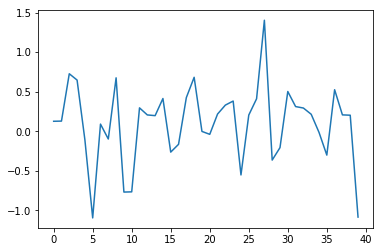

end 29
[array([-2.08989123e+00, -1.42847994e+00, -9.47842089e-01,  9.00430846e-01,
        6.40085071e-01,  2.89782128e-01, -1.51352400e-01, -2.26369223e-01,
        2.44003318e-01,  3.23592821e-02, -2.16129383e-01, -3.32775450e-02,
        1.23835003e-01, -6.57589034e-02,  3.23669907e-03,  6.40826164e-03,
       -1.50364264e-03, -6.90695609e-03,  4.39708987e-03,  1.22885185e-03,
       -7.75290156e-03, -6.59816285e-03, -7.22891296e-04, -4.00575726e-03,
        1.08905058e-02,  1.79094299e-02,  5.00087566e-04,  4.16466869e-03,
        1.36978677e-03,  5.66581590e-02,  7.36483818e-04, -6.85410236e-03,
       -4.38000772e-02,  5.30414264e-02,  7.69931590e-02,  1.14311645e-01,
        7.86893213e-01, -1.98750107e-01,  2.50609679e-01,  6.61459820e-01])]
[0.16606193 0.50819704 0.27481284 0.31626999 0.44150411 0.40165731
 0.37188638 0.21262905 0.06699919 0.74627885 0.62719068 0.48433122
 0.27343323 0.63196606 0.35185077 0.29866879 0.68106015 0.58567721
 0.65169141 0.21548371 0.33189984 0.725

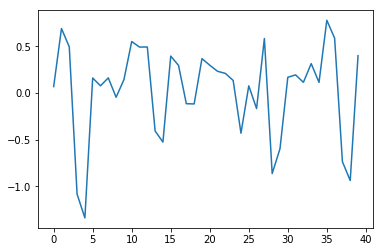

end 49
[array([ 0.82407162, -0.02224013, -0.41400245,  0.07892775,  0.01690949,
       -0.00667036,  0.02735052,  0.04204688, -0.01232305,  0.04483362,
        0.06210756, -0.09250307,  0.02930721, -0.210736  , -0.00453077,
        0.06378917,  0.01195281, -0.02318374, -0.02480857, -0.15285925,
       -0.05331621,  0.02260413,  0.0804185 ,  0.03839834,  0.13270803,
        0.03023965, -0.23509976,  0.12433742, -0.11285768, -0.2566692 ,
        0.08141698, -0.4815725 , -0.7651753 ,  0.74872426, -0.30568255,
        0.6208142 ,  1.72313185,  1.31241043, -1.31838821, -0.76088539])]
[0.60304207 0.31474653 0.75197844 0.61719131 0.31860429 0.71426612
 0.6528065  0.04160232 0.53745726 0.65081192 0.39372898 0.04024895
 0.0094991  0.15573553 0.54376194 0.37192355 0.51368504 0.18989946
 0.44873081 0.65764211 0.65926977 0.56528013 0.2404933  0.49613986
 0.18819903 0.6169417  0.45501193 0.55455083 0.7550756  0.2589885
 0.63591015 0.02957619 0.27638319 0.76117773 0.46772388 0.10974126
 0.04395643 0

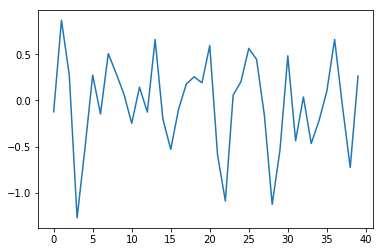

end 35
[array([-0.08266369, -0.01764615, -0.04055158, -0.06899731,  0.047202  ,
        0.00293279, -0.03044441,  0.06555699, -0.00180403, -0.04196058,
        0.13772475,  0.30262212,  0.18315302,  0.00523684, -1.04029999,
       -0.83800241,  0.35290056,  0.12430679,  1.13495539, -1.2295648 ,
       -1.68773648,  0.45092293,  1.23697238, -0.12812876,  0.09661725,
        0.09224666, -0.4507899 , -0.11900585,  0.35605504,  0.34647129,
        0.07348379, -0.12676756,  0.05588549,  0.0141997 , -0.00762862,
       -0.01407731,  0.03489939, -0.02965909, -0.03376484, -0.00773433])]
[0.14241409 0.08587967 0.51831754 0.06211527 0.62321815 0.09688904
 0.22975413 0.03251868 0.07781845 0.5127186  0.81030711 0.09668002
 0.28115728 0.61429424 0.07307055 0.39992389 0.85238711 0.07591738
 0.763842   0.89600816 0.06072132 0.74504177 0.03196551 0.78688303
 0.14168382 0.15953864 0.24539458 0.59040511 0.33191925 0.89237655
 0.8018891  0.74086258 0.52825612 0.03511696 0.10575689 0.29737365
 0.72081618 

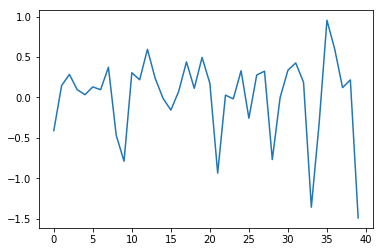

end 54
[array([ 0.05405506,  0.1739086 ,  0.22579896,  0.38814706, -0.146899  ,
        0.02756776,  0.05968857, -0.30084865,  0.22530937,  0.06141118,
       -0.11132792, -0.0514656 ,  0.23214125, -0.11849128,  0.04605583,
        0.01552424,  0.47223071, -1.03391419, -1.16061032,  0.12012525,
       -1.34383258, -0.66394812,  0.8028306 , -1.35616542,  0.55216007,
        0.03835751,  0.15113783,  0.18420382, -0.86114251, -0.67756969,
       -0.10393193,  0.46055736, -0.14332594,  0.44601821,  0.06441422,
       -0.01503197,  0.11031318, -0.30054737,  0.06315476,  0.08946073])]
[0.77583395 0.19520533 0.23625777 0.48503481 0.05546052 0.48648962
 0.20903387 0.66080663 0.45776888 0.36834567 0.57163386 0.2344062
 0.46822407 0.04622338 0.57675693 0.64793094 0.7728966  0.27862027
 0.08702039 0.33228594 0.23776439 0.7526264  0.62610111 0.68368193
 0.54988314 0.38008778 0.432083   0.61304824 0.61091231 0.27348295
 0.77169559 0.74713853 0.21087897 0.26835136 0.65277534 0.2725329
 0.24092457 0.

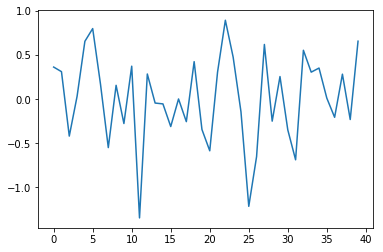

end 31
[array([-3.37673546e-02, -1.48019481e-02,  1.01571371e-02,  1.31695180e-03,
        1.16030102e-03,  2.07606398e-02, -1.63016399e-03,  2.90348031e-02,
        6.81929767e-03,  6.09033327e-02, -1.23015542e-02, -3.69381842e-02,
        4.93060515e-02, -2.57840976e-02, -1.72918818e-03, -1.87815845e-02,
       -3.84358957e-02, -4.87296755e-02, -7.26328341e-02,  4.59147925e-02,
        5.62649521e-02, -2.21895071e-03, -6.87633881e-01, -1.08106425e+00,
       -3.72203605e-01, -1.15062817e-01,  5.79528191e-01, -7.12570556e-01,
       -1.29968225e+00, -5.26122158e-01,  2.07941678e+00, -3.21612944e-01,
       -4.77211927e-01,  2.07341755e-01,  6.14036553e-01, -2.42608996e-01,
       -2.53265581e-01,  1.66413537e-01,  1.03270857e-01, -3.67004451e-01])]
[5.11373610e-01 7.74036908e-01 3.33226983e-02 8.07389200e-01
 2.83470251e-01 3.74294384e-01 1.82868113e-01 7.32236461e-01
 4.62350696e-01 1.64394005e-01 7.08226942e-01 1.03396251e-01
 3.47324307e-04 2.92371581e-01 7.93046639e-01 2.41328007e

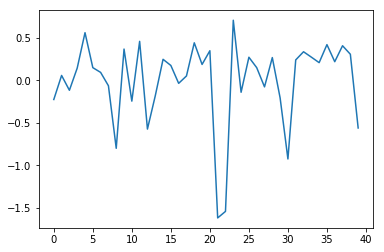

end 54
[array([-0.11399575, -0.00211407,  0.09791113,  0.0989423 ,  0.66005331,
        0.99826038,  0.21451743,  0.78049003, -1.51332141, -1.91624223,
       -0.53797829,  1.06037546,  0.21226811, -0.50746472, -0.2424109 ,
       -0.10876199,  0.08531672,  0.01793361, -0.00837604,  0.01287083,
        0.00696756, -0.03529068, -0.07725171, -0.00665723,  0.02168583,
       -0.01969587, -0.02968918, -0.16872722, -0.0134863 , -0.05235572,
        0.2025692 ,  0.01501264,  0.04956478, -0.05087747, -0.08607316,
       -0.02173084, -0.10681824,  0.07054515,  0.09469976,  0.0576207 ])]
[0.70495287 0.31749719 0.71023158 0.39618464 0.62146249 0.01196444
 0.73333927 0.67500514 0.37755292 0.72224792 0.79237509 0.49997763
 0.47818038 0.69551691 0.6482976  0.74242215 0.37908785 0.72619873
 0.64614885 0.05344715 0.51589975 0.31359551 0.1308496  0.04383977
 0.29520813 0.15529204 0.43966572 0.39844224 0.44998559 0.23686263
 0.19037803 0.34017941 0.24413323 0.43449952 0.48662235 0.54436941
 0.41462922 

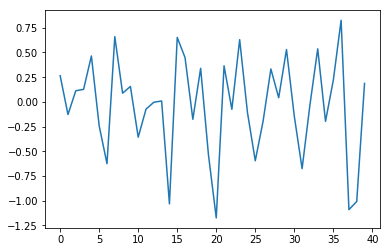

end 72
[array([ 1.10004155,  1.13198177, -1.13542671, -0.87653324,  1.75763099,
       -0.36222483, -0.51973627,  0.51247521,  0.42485317,  0.05017018,
       -0.04501443,  0.01711383, -0.03611734, -0.07336143, -0.00521141,
        0.10700885,  0.0749006 , -0.16760083, -0.14011921,  0.03159592,
       -0.11493698,  0.0357265 , -0.16534477,  0.03029661,  0.02065345,
        0.11515687, -0.00184997,  0.02260946,  0.01335566,  0.07441792,
        0.04826237,  0.01405167,  0.11641022, -0.0658248 , -0.06750127,
       -0.14337989,  0.17200161,  0.19136499,  0.15025862,  1.11489388])]
[0.78663021 0.66084365 0.71115643 0.18672351 0.35654052 0.40254252
 0.13885353 0.60985279 0.43211281 0.65079779 0.71404392 0.70067866
 0.30243512 0.66101948 0.34754588 0.34281988 0.4341877  0.5019789
 0.29640304 0.22560942 0.817796   0.21780634 0.39322064 0.80030256
 0.35475763 0.33008563 0.34587691 0.64744528 0.4048219  0.11171599
 0.1132623  0.6987808  0.03629138 0.30589735 0.3178507  0.59608822
 0.26589417 0

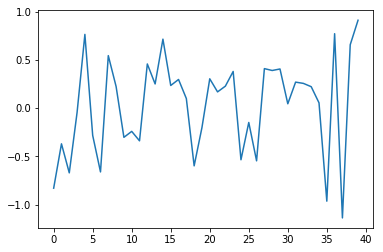

end 31
[array([ 1.01172532e-03, -7.58637730e-02, -1.94340708e-01,  3.72142100e-02,
        1.72171533e-01, -2.05821391e-01, -4.85467079e-02,  2.08961435e-02,
        2.27312574e-02, -4.83104166e-03, -3.48375357e-02, -1.50621165e-03,
        2.64646350e-02,  6.37509450e-02,  9.48983098e-02,  1.96470793e-01,
        7.69117854e-02,  8.58388334e-02, -6.94970555e-01,  5.76304240e-03,
        2.45766867e-01, -2.60174329e-01, -1.11415244e-01, -4.99971662e-01,
       -9.05186814e-01,  1.01152038e+00,  1.54367939e-01,  1.98912426e-01,
       -6.07909676e-03, -1.91327233e-01, -4.19324324e-01,  3.03174918e-01,
        7.80958364e-01,  4.23402942e-01,  1.41522344e+00,  5.52842598e-01,
       -1.51198318e+00,  1.00452516e+00,  5.32976209e-02, -5.77408274e-01])]
[0.07876    0.35609827 0.60427703 0.24820809 0.10181123 0.54415714
 0.77132776 0.42033433 0.84931676 0.41652483 0.83895213 0.71967206
 0.03850867 0.03065469 0.42719417 0.14769469 0.1728851  0.84516443
 0.43566804 0.24708409 0.75128577 0.044

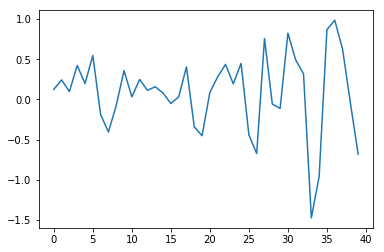

end 69
[array([ 2.57714052e-02, -4.30475918e-02, -3.98783875e-03,  5.22796928e-02,
       -4.69986645e-02, -2.20393625e-02,  5.31451886e-03, -2.11813678e-03,
       -5.61793563e-03,  2.29574103e-02,  3.02920308e-02,  3.56870962e-02,
        8.41533493e-02,  4.53583356e-02, -2.28880938e-02,  1.63332869e-01,
        1.35463779e-01, -3.17649700e-01,  8.35635967e-01,  1.05586019e+00,
       -2.26860267e+00,  9.41379457e-01,  2.45912094e-01,  1.77196333e-01,
       -5.13684255e-02,  2.15303637e-02, -3.17648197e-02,  2.74327194e-01,
        3.53513402e-01,  5.03893947e-02, -1.20685269e+00,  1.79188236e-02,
        2.83454403e-01,  1.12780459e-01, -2.94067763e-01,  2.18120448e-01,
        5.49633637e-02,  1.54539499e-04,  2.25211129e-03, -4.55524012e-02])]
[0.83988056 0.33555848 0.02487268 0.08081275 0.21886253 0.30092849
 0.59680644 0.86215572 0.11095573 0.23050386 0.50757077 0.58986121
 0.04355317 0.15380999 0.18118604 0.43844697 0.38381699 0.49298772
 0.63543338 0.86904355 0.44370592 0.719

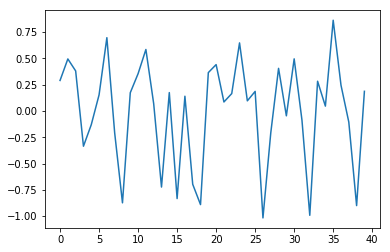

end 18
[array([ 0.2816135 , -0.02581861, -0.12107352,  0.02650428, -0.00512817,
       -0.01215672, -0.02253137,  0.03496003, -0.05681495,  0.00557668,
        0.01138831,  0.01462551,  0.04460242, -0.04488417,  0.03849185,
       -0.05175061, -0.28204436,  0.01780961,  0.03280155, -0.68734814,
       -0.88676029, -0.19503625,  1.83459109, -0.12594004, -0.53427341,
        0.42614959,  0.74436986,  0.64778952,  0.26029371, -1.00309491,
       -0.00517927, -0.45700528, -1.15204023, -0.1627203 ,  0.83749495,
        0.31652077,  0.31638686, -0.25738667, -0.2937765 ,  0.01116322])]
[0.1693649  0.10708861 0.74400977 0.50280491 0.74723505 0.61640073
 0.22259306 0.32848339 0.17181816 0.32400708 0.80400533 0.34449601
 0.16471754 0.78743572 0.53372778 0.24222288 0.78561935 0.65908095
 0.35211652 0.64005817 0.67866321 0.19286487 0.71703094 0.60757858
 0.1879372  0.0485036  0.52353119 0.03216397 0.08605654 0.70016171
 0.20625351 0.78183304 0.29377901 0.34126259 0.47037441 0.03075775
 0.19220583 

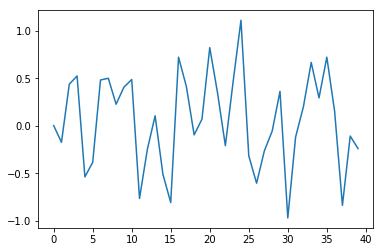

end 33
[array([-5.97409502e-01, -1.53860339e-01, -3.51128759e-01,  9.83635084e-02,
        3.98598111e-01, -2.53528414e-01,  1.44492046e-01, -1.15876996e-01,
        5.97807587e-01, -3.69357637e-01,  4.15680899e-01,  4.48721985e-01,
       -7.90279804e-01,  1.72161809e+00,  1.43954751e+00,  1.28735722e+00,
       -7.98597022e-01, -5.35276362e-01,  2.00727499e-01,  2.14774812e-01,
        9.12752792e-02, -4.91047461e-02, -3.07103662e-02,  2.58435149e-02,
       -1.48242042e-02, -9.02282037e-03, -3.14907811e-03, -4.72149461e-03,
        5.51450204e-04, -2.65520388e-04, -4.78698239e-03, -5.53150616e-05,
       -3.38525723e-03,  1.25612725e-02,  3.50956923e-02,  6.12132857e-03,
        2.38843291e-02, -4.65814752e-02, -6.44741718e-02,  1.05916706e-01])]
[0.035748   0.58744321 0.3240651  0.71959702 0.74768541 0.68995358
 0.35800187 0.76773297 0.12274799 0.05537344 0.079712   0.63103248
 0.57218363 0.06714994 0.82802998 0.69030534 0.49392714 0.28273001
 0.10702895 0.09112759 0.72382618 0.418

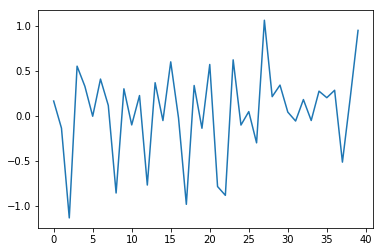

end 58
[array([-6.55344758e-02, -4.37807768e-02, -1.50591726e-01,  3.20933924e-01,
       -7.70947839e-02, -5.21238312e-01,  4.17986747e-01, -2.83273695e-01,
        2.87943750e-01,  3.50025271e-01, -1.41475440e-01, -1.41109518e-01,
        1.30269361e-01, -2.51061460e-02,  4.59877258e-02,  3.88288155e-02,
       -1.40471558e-02, -1.37668530e-01,  8.46161305e-02,  5.00724814e-02,
       -8.14621679e-02, -2.26426000e-01, -4.78208251e-02, -3.73344799e-01,
       -1.18402231e+00,  1.33891907e+00,  1.03596767e+00,  2.26136362e-01,
       -1.23334065e+00,  1.67975006e+00,  1.50166456e-01,  3.05216637e-01,
        2.03967179e-01, -4.54418498e-02, -9.38088390e-02,  1.97347228e-02,
       -6.27208206e-04,  2.91297301e-02, -4.15994245e-02, -8.79468599e-02])]
[0.37473045 0.09218065 0.50936321 0.75921882 0.04017727 0.84237849
 0.81425422 0.45265594 0.30602266 0.04727904 0.59284591 0.35420376
 0.50583039 0.77368215 0.6265828  0.1131059  0.58796609 0.14421739
 0.5160075  0.66654539 0.33593579 0.343

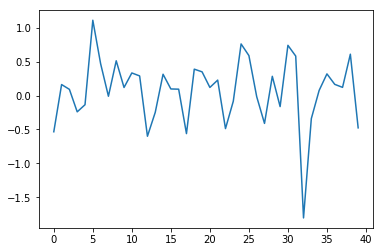

end 35
[array([ 1.14380717, -0.05957914, -0.26278872,  0.02789057,  0.05957011,
       -0.00246501,  0.00885536, -0.06365922,  0.00773343, -0.01051243,
        0.04899231, -0.04203682, -0.03570546,  0.15962416, -0.20058831,
       -0.05979814,  0.07933511, -0.06662731,  0.12927446, -0.08800235,
       -0.05143929,  0.06574335,  0.05909291, -0.06129425, -0.02040847,
       -0.00436129, -0.11643426, -0.05111262, -0.09968739,  0.22285011,
        0.15225815, -0.09868883, -0.3625347 , -1.07718607, -0.49721939,
       -1.6344943 ,  0.72303539,  1.48656117, -1.01395843, -0.63708775])]
[0.33646499 0.82651848 0.22690345 0.69964226 0.86497792 0.39770135
 0.82931699 0.43077572 0.06561139 0.15407481 0.09660582 0.25602339
 0.23995822 0.24817396 0.30667449 0.86978571 0.04853047 0.07922572
 0.74808924 0.49276905 0.08408186 0.79075142 0.57737849 0.62529849
 0.11670503 0.68704679 0.54848817 0.21406998 0.30551032 0.59940388
 0.78676673 0.00576511 0.74523341 0.65075379 0.54941147 0.25203139
 0.06292888 

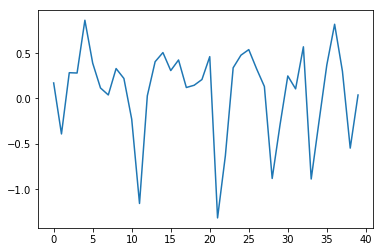

end 30
[array([ 1.37689168,  1.34162281, -0.0957165 ,  0.04647149, -0.2864633 ,
        1.27747585,  1.26321336,  0.4761348 ,  0.60765461, -0.61618492,
        0.52647462,  0.25700902,  0.04128353, -0.60279073,  0.24543714,
        0.11991796,  0.04800598, -0.02837651, -0.23038446,  0.17193036,
        0.10174392, -0.09071943, -0.15802329,  0.00267418,  0.02011467,
        0.04223346,  0.01044744, -0.05290363,  0.00706892, -0.10580369,
        0.22182276, -0.03839628,  0.07263843,  0.02502491, -0.10920645,
       -0.05327016,  0.3309112 , -0.07759437, -0.05005589, -0.94319557])]
[0.45770596 0.60409471 0.34590892 0.73284133 0.55220195 0.1751771
 0.68986962 0.75506482 0.53796967 0.11040455 0.61587165 0.16892044
 0.75751836 0.15948645 0.19889067 0.35421408 0.50224653 0.01360094
 0.28877304 0.19593036 0.69763937 0.53900738 0.15611861 0.12492727
 0.69444605 0.56285787 0.79429478 0.49464779 0.52840197 0.4749981
 0.06383769 0.51003782 0.12728021 0.1804467  0.21606221 0.78085733
 0.40780857 0.

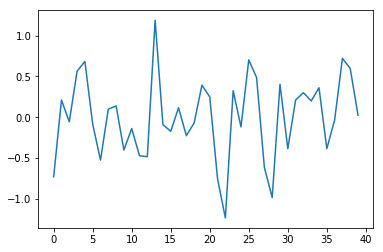

end 12
[array([-4.82928457e-04,  9.75656265e-03,  2.48237109e-02,  5.19877203e-02,
        7.65872557e-02, -4.63758235e-02,  1.43625275e-01,  4.86938516e-02,
        5.16489074e-03, -2.55455905e-02,  3.02822670e-02, -5.01438762e-02,
       -3.39037426e-02,  4.24843954e-02,  2.90575822e-02, -9.08992180e-04,
       -2.25124574e-02, -2.63487696e-02,  1.27383498e-02,  3.41873255e-02,
        4.28532001e-03, -2.15309648e-02, -2.85586758e-02,  5.40067980e-02,
        1.86696451e-02, -8.64751540e-03,  9.44163601e-02,  2.04317685e-01,
       -3.09496339e-01,  6.28448523e-01,  2.05179543e+00,  1.65500513e+00,
       -2.43278170e-01, -8.21378533e-01,  1.17996382e+00,  5.35994068e-01,
        1.61289015e-01, -4.28870965e-02, -1.35339602e-01, -2.37994526e-02])]
[0.21939226 0.37821344 0.02282925 0.75583739 0.75328777 0.12336766
 0.85499813 0.09045887 0.14077959 0.68689086 0.15105056 0.23404375
 0.59940889 0.31858849 0.58356687 0.76099893 0.25487404 0.03905133
 0.03122932 0.65182886 0.9411462  0.276

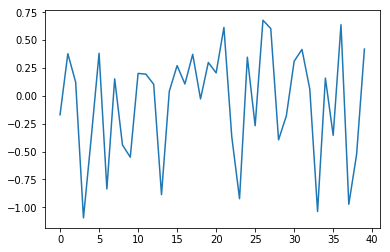

end 16
[array([-5.76153367e-02,  2.56062836e-02, -4.49515468e-02, -9.92309543e-03,
       -3.74229199e-04, -1.79671092e-02,  1.77631377e-03, -3.91875960e-03,
        2.46333889e-02, -3.87350196e-02, -1.76644449e-01,  5.20372174e-01,
        1.41664224e-01, -5.18579952e-01,  1.05704738e-01,  7.70612048e-01,
        4.95944883e-01,  1.68532975e-01,  1.27368470e+00,  1.64783146e+00,
        3.40885735e-02, -1.57425307e+00,  8.47930617e-01,  3.51280025e-01,
       -6.56902517e-01,  1.12723828e-01, -7.50068276e-02, -1.53604938e-02,
        9.73987043e-03, -1.01673093e-03,  1.70421410e-01, -1.47778425e-02,
        1.38222823e-01, -1.89125680e-01, -2.79110509e-01,  4.37092938e-01,
        1.69570226e-02,  1.50083621e-01,  1.64143096e-01, -9.28530149e-02])]
[0.55416812 0.64036229 0.37847558 0.54217996 0.44925437 0.63192067
 0.70115086 0.13244099 0.35619993 0.27087311 0.50623452 0.66589736
 0.17207619 0.72541186 0.6221631  0.68654193 0.66927338 0.38633155
 0.08801445 0.72010657 0.37059872 0.651

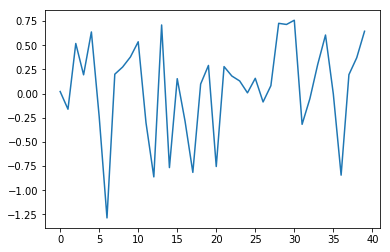

end 39
[array([-1.05789392e-02,  4.04450306e-03,  4.31003324e-03, -7.28083483e-03,
       -9.18985806e-03,  1.43170383e-02,  2.69872398e-02,  1.27744999e-02,
       -5.40452785e-03, -3.24882098e-02, -5.83071752e-02, -3.09737436e-02,
        1.41259810e-02,  4.83819461e-02,  1.04107958e-02,  1.35064576e-03,
        8.78008591e-03,  4.41451960e-02,  1.22393436e-01,  9.65765620e-01,
        5.54404441e-01,  1.32231400e+00, -3.93577279e-01, -2.29203996e+00,
        4.28488801e-01, -2.43298075e-01,  4.51680008e-03, -8.68022450e-01,
       -2.80465803e-01,  2.43383964e-01, -4.34932661e-01, -4.09389276e-01,
        1.74127925e-01,  2.20937139e-01, -4.88527890e-03,  4.59928160e-02,
       -1.81570589e-02, -4.42388061e-02,  4.06309402e-02,  2.08165272e-02])]
[0.25737487 0.54571446 0.78772475 0.25809762 0.62836074 0.43972579
 0.31083252 0.44511048 0.6238539  0.40334647 0.61297177 0.19871985
 0.7517973  0.2148065  0.45138366 0.61566841 0.09133257 0.15013724
 0.64655922 0.80916778 0.48713188 0.524

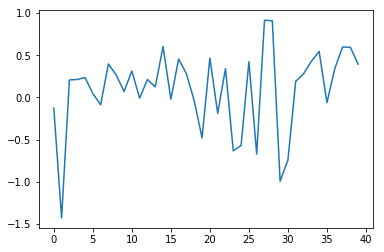

end 22
[array([-0.79548249, -0.08972531,  0.03831594, -0.20223584, -0.17011085,
        0.21439752,  0.25243432, -0.05274253, -0.01451847,  0.13319913,
        0.10796199,  0.06897501,  0.01315099,  0.03223364,  0.1022014 ,
        0.02773441, -0.68060294,  0.15776527,  0.1525409 , -0.04913301,
       -0.1744742 ,  0.12974579, -0.15108619, -0.19472356,  0.60875829,
       -0.12614718, -1.02379111, -0.29549507, -0.10838792, -0.49740375,
        0.0668912 ,  1.23700526, -0.16955245,  0.73104375, -0.16116894,
       -0.41425736, -1.04857182,  0.91197075,  0.78095735, -1.37446355])]
[0.8169745  0.25528666 0.13583355 0.39097875 0.82404684 0.50643213
 0.76866719 0.06707025 0.24722791 0.6005383  0.78799691 0.04204862
 0.62895868 0.01663939 0.18199698 0.14325962 0.39473306 0.53018673
 0.72807296 0.62819863 0.15247764 0.31915539 0.55362151 0.37493224
 0.47563629 0.26525071 0.07379029 0.01239719 0.54813141 0.66408401
 0.09185083 0.44657934 0.05453862 0.74785572 0.0555719  0.59971585
 0.52413774 

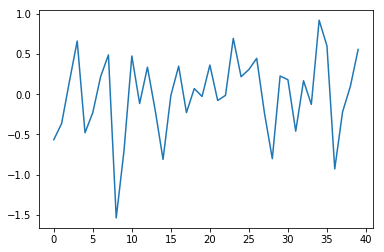

100


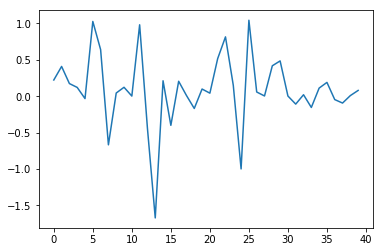

200


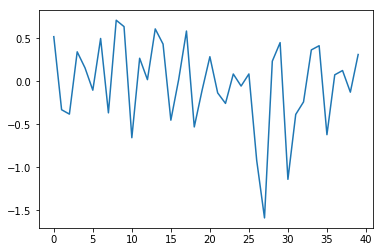

300


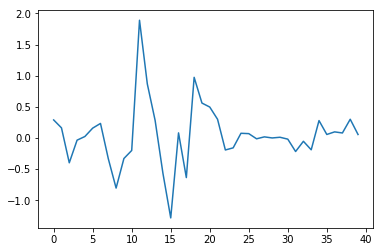

end 326
[array([-2.01730755,  0.24698162, -1.00136927, -0.57327799,  0.15688742,
       -0.2046593 , -0.15309266,  0.16457628, -0.20322255, -0.04713931,
       -0.07208946, -0.09358095,  0.04937999,  0.02305737, -0.02842671,
        0.07831991,  0.06378744, -0.08207876, -0.02614057,  0.14484498,
        0.13028177, -0.05115669, -0.08925604,  0.03078876,  0.01057102,
       -0.00269582, -0.01545374,  0.01248303, -0.00830654, -0.05096398,
       -0.03504353, -0.1895781 ,  0.42064539,  0.58617969,  0.70531514,
       -0.16776182, -0.08941568,  0.4822295 ,  1.71955942,  0.09361015])]
[0.55509677 0.34670984 0.26210498 0.66578631 0.72934126 0.61677592
 0.14371875 0.03223709 0.5383953  0.25407436 0.70812072 0.12900578
 0.67119223 0.36040914 0.67093877 0.02348976 0.70448089 0.52112348
 0.32716494 0.79958259 0.55629926 0.37239086 0.02337343 0.50564577
 0.30732499 0.73757105 0.73476224 0.06076263 0.31866198 0.18358445
 0.492037   0.6500317  0.69134007 0.0765194  0.69076052 0.6748983
 0.07242962 

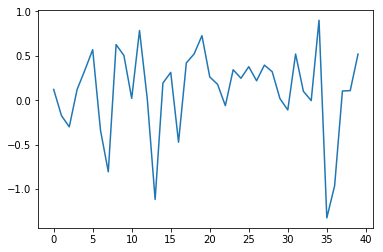

end 57
[array([-1.34513974,  0.11024643, -1.90794335, -0.49008244,  1.47544882,
       -1.25377459, -0.30716778,  0.09318302, -0.01499634, -0.14073701,
        0.16999024,  0.17390641,  0.18206154, -0.20086154, -0.09003922,
        0.41260537, -0.08761564,  0.02235014, -0.1280307 , -0.09440237,
        0.22242695,  0.00423522, -0.03914214,  0.01238002,  0.03043445,
        0.02878244, -0.01303984, -0.00276986,  0.03159459, -0.01059758,
       -0.00461815,  0.03409888,  0.025762  ,  0.06754322,  0.0075964 ,
       -0.00505385,  0.03262599,  0.02404229,  0.01448302, -0.13792088])]
[0.33393184 0.17514786 0.02465268 0.2086755  0.43421492 0.03104635
 0.43350437 0.64788039 0.83248873 0.36540845 0.50744502 0.05657748
 0.81309289 0.71909018 0.49930054 0.29164264 0.012644   0.62140429
 0.59138123 0.2774842  0.77644158 0.70402112 0.48851658 0.54836763
 0.51012806 0.26078959 0.09174309 0.2477124  0.57393974 0.07248467
 0.02382713 0.05274971 0.62504128 0.75613371 0.62890016 0.8375495
 0.27204809 0

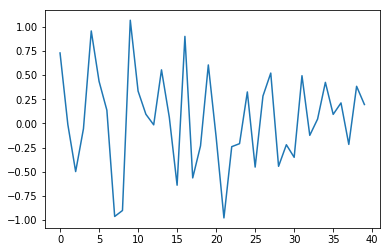

end 77
[array([-9.03407427e-02,  7.45983933e-02,  6.07309801e-02, -1.17659306e-02,
       -5.50964977e-02, -7.13303497e-03,  6.61413839e-03, -8.18234520e-02,
        1.35948868e-01,  4.19133052e-01,  4.10523283e-02, -1.25230844e-01,
       -2.38390731e-01,  3.60436320e-01,  4.04556432e-01,  1.46499676e+00,
        2.44111601e-01, -2.55203902e+00,  3.82003043e-01,  1.65697592e-01,
        3.39075431e-01, -5.54698649e-01, -2.44840158e-02,  1.84751733e-01,
       -2.89158233e-02,  4.53553962e-02,  3.43565253e-02, -7.23771436e-03,
       -6.04692668e-03, -9.76823154e-02, -4.86467271e-02, -4.95497069e-03,
       -4.84737772e-02,  3.71639452e-02, -2.28058140e-02,  1.55406820e-02,
        1.36508767e-02, -2.38326291e-03, -6.18982970e-02,  1.91286804e-01])]
[0.31737637 0.19142202 0.36481128 0.90675457 0.33969705 0.46873488
 0.31395452 0.03831401 0.2169617  0.13861373 0.37723983 0.72272153
 0.80051637 0.49994821 0.53476477 0.38775966 0.00805804 0.04835145
 0.75593684 0.84219406 0.22871323 0.471

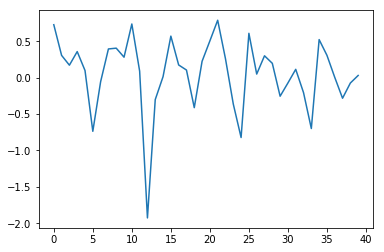

end 24
[array([ 8.14466312e-02, -6.87138239e-02, -5.21726668e-02, -7.91022428e-02,
       -1.15427868e-01, -1.45822637e-01,  1.63125244e-01, -1.02990984e-02,
       -6.56957467e-03,  6.03033925e-02, -4.78123099e-02, -5.31920285e-02,
        8.28489976e-02,  7.65925730e-02, -4.72150919e-02, -1.16715098e-01,
        1.58479444e-01,  1.74125231e-01, -3.95797819e-02,  7.44038476e-02,
        7.04204543e-01, -1.22209324e+00, -1.58166903e+00,  6.91089451e-01,
       -1.26867743e+00, -4.20807046e-01,  1.53704066e+00,  3.43414643e-01,
       -6.64653723e-01,  6.47069799e-02,  3.19562483e-01,  1.22740114e-01,
       -4.05735742e-02, -3.97755417e-02,  3.46402153e-02, -7.60628334e-04,
       -6.03027400e-02, -9.13263264e-02,  4.24119591e-02,  3.68713894e-02])]
[0.38809006 0.21605551 0.75858304 0.58553908 0.17975676 0.46342325
 0.13754828 0.56076394 0.77958821 0.6242273  0.05900803 0.13482313
 0.58888883 0.57278809 0.28850578 0.7296119  0.5749504  0.12891945
 0.70857701 0.32472129 0.2447119  0.288

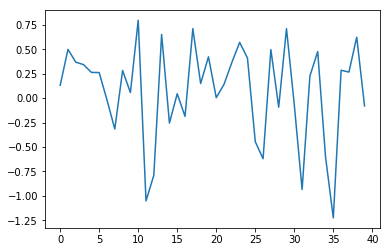

end 17
[array([-7.33146192e-02,  1.77015076e-01,  1.54255371e-01, -4.14261691e-01,
       -5.51919622e-02,  1.52536114e-03, -9.56079436e-02,  1.84969771e-01,
        7.94496440e-02,  1.46224120e-01, -2.98014571e-02,  1.36936418e-01,
       -4.34857914e-01, -4.90000693e-01,  1.61053497e-01, -7.03802032e-02,
       -1.70086508e-01,  1.32153705e-01,  5.14190685e-03,  1.40531653e-01,
        1.26855070e-01,  9.63591093e-02,  2.59862417e-02, -9.95172173e-03,
        8.71822548e-02,  8.71098195e-02, -1.69632826e-02,  2.10220483e-01,
        2.25252434e-01,  3.29764979e-02, -3.27058739e-01,  4.99439991e-02,
       -2.77238399e-01, -8.71927771e-02,  2.91110634e-01,  7.93051537e-01,
       -2.11332833e+00, -1.29618789e+00, -8.05050693e-01,  1.14379556e+00])]
[0.72577396 0.00095212 0.62192132 0.61370724 0.0485684  0.81516293
 0.198275   0.16240866 0.69253946 0.36699838 0.03997904 0.30747129
 0.63460366 0.41941736 0.10899535 0.54839588 0.44440963 0.53170738
 0.46837792 0.62537186 0.5247669  0.201

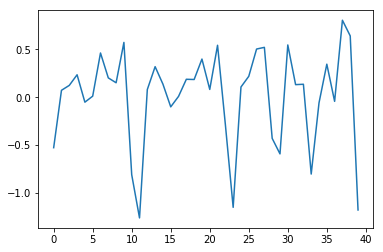

end 12
[array([-0.17523942,  0.37732442, -0.07087995, -0.17082509,  0.00842187,
        0.10313962, -0.06494952, -0.02897049,  0.00220432, -0.09042393,
        0.01229811, -0.0405516 ,  0.03915269,  0.05551646, -0.16479089,
        0.00917219,  0.14447445,  0.0160632 , -0.39492239,  0.29191715,
        1.02899853, -0.97153688,  0.32262561,  2.11746091, -1.0091344 ,
       -1.23203913,  0.46332556,  0.13916557,  0.09663732,  0.13798022,
       -0.01380152,  0.0409943 ,  0.01854523, -0.01300348, -0.03119157,
        0.01180137,  0.08771172,  0.20449039,  0.06947425, -0.16072773])]
[0.02942085 0.72717027 0.64563885 0.57210505 0.80952507 0.10592613
 0.30930473 0.77763138 0.11185801 0.47864076 0.26286742 0.33506872
 0.48903362 0.78225289 0.38861404 0.08325634 0.67913831 0.01451261
 0.07263256 0.30282773 0.25596614 0.87816697 0.20108738 0.43895936
 0.10100192 0.05169732 0.74880302 0.40894256 0.40352953 0.42754047
 0.15376549 0.32534552 0.17290642 0.33976943 0.59232702 0.62127979
 0.91502165 

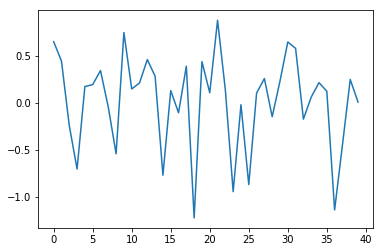

end 46
[array([-0.13220338, -0.02385343, -0.04224584,  0.00371277, -0.38593595,
       -0.27887144, -0.2493741 ,  0.31755793,  0.43415269, -0.29764339,
       -0.09040851, -1.53894095, -1.12012136, -0.18694711,  2.09259527,
        0.69828236, -0.25422767, -0.30091522,  0.39979748, -0.52683092,
       -0.1268126 ,  0.20005581,  0.09038664, -0.17207414,  0.13427498,
        0.08370433, -0.03899545, -0.05711222,  0.00593138, -0.03652294,
        0.071212  ,  0.0262065 , -0.06538641,  0.03114297,  0.08000065,
        0.10266553,  0.13293712, -0.0687594 ,  0.06490115,  0.09189102])]
[0.18012398 0.64375601 0.22373505 0.22558031 0.8698955  0.48319804
 0.0063248  0.01423487 0.25797111 0.87154504 0.65160118 0.82407018
 0.07365765 0.41175632 0.36557924 0.8209705  0.08447242 0.66667928
 0.75926564 0.5151411  0.05529576 0.24385249 0.50050191 0.83291354
 0.09296064 0.05544592 0.5708143  0.58340095 0.56080753 0.54435122
 0.77570681 0.43270387 0.41234291 0.04883053 0.55350538 0.23808782
 0.11060492 

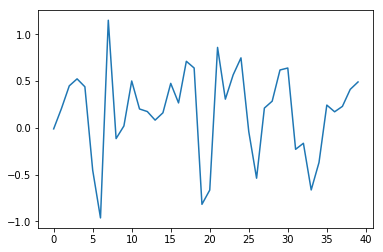

end 70
[array([ 0.04227144,  0.00744445, -0.05160773,  0.01642204,  0.01248286,
        0.00205355, -0.02545146,  0.01501519, -0.03960835, -0.03808196,
       -0.08950166,  0.08624819, -0.20280179,  0.06470193,  0.28918987,
        0.25803576, -0.1194473 , -0.03992986, -0.00600242,  0.00961144,
       -0.00541306,  0.02077821, -0.00514103, -0.04657984, -0.08278577,
       -0.09221282, -0.29809695,  0.02926484, -1.10721996, -1.65942085,
       -1.1292992 ,  1.47543424,  0.66340183, -0.77064727, -1.02316725,
        0.26019713,  0.26460022, -0.05674739, -0.02448324, -0.04722288])]
[0.39212667 0.46759774 0.58645637 0.71651496 0.35660986 0.35094367
 0.4369256  0.16482475 0.47417621 0.53973698 0.42679188 0.39309836
 0.34018868 0.76971156 0.7766573  0.27877933 0.07389838 0.15888263
 0.78549489 0.05350878 0.04304216 0.73680957 0.74083756 0.40164957
 0.3652951  0.59893292 0.72066845 0.17458369 0.24066997 0.77584168
 0.77026147 0.45766477 0.73872103 0.63289243 0.37466668 0.0627792
 0.43044223 0

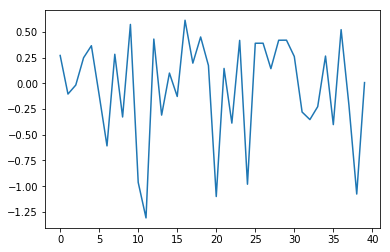

end 19
[array([-0.80275853, -0.2301237 , -0.42263451,  1.52599351,  1.1271189 ,
        1.76964601, -0.25431323, -0.96004636,  0.89216391, -0.01655405,
       -0.13717706,  0.06588604,  0.09656486,  0.02662336,  0.05649302,
       -0.19853237,  0.0421469 , -0.03880339,  0.33665707, -0.48667406,
       -0.26867432,  0.20225458,  0.02978979, -0.07153366,  0.01610109,
        0.0088971 ,  0.00934594, -0.0629279 ,  0.07719998, -0.03347389,
        0.01009258,  0.01973534,  0.06428745, -0.1046648 , -0.09176345,
        0.05312415,  0.04762076, -0.0125007 , -0.00660886, -0.14691484])]
[0.35028542 0.56613317 0.558311   0.39218324 0.39753464 0.04709757
 0.65837683 0.5354651  0.04492391 0.50501997 0.00150368 0.66967303
 0.28462253 0.50558699 0.04404195 0.47942976 0.71873396 0.6622326
 0.55044578 0.31266632 0.17743831 0.5546538  0.24155616 0.114823
 0.63037506 0.26369286 0.28776403 0.6293955  0.60803252 0.59808106
 0.35936927 0.67113296 0.1658077  0.64330037 0.72246014 0.67443045
 0.64093207 0.4

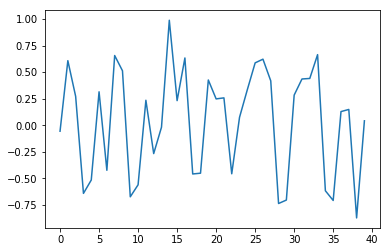

end 63
[array([ 2.55744834e+00, -1.45628982e-02, -7.58864050e-01, -4.67082572e-02,
        8.61136081e-01, -1.03696051e+00,  5.69133078e-01, -1.67468294e-01,
       -2.48222497e-01,  2.47682189e-01,  9.90430379e-02, -1.12018629e-01,
       -7.88988583e-02,  3.32793495e-02,  1.91030009e-02, -4.72253526e-03,
        9.32028249e-03, -1.38451609e-02, -5.82173365e-03, -8.26448757e-04,
        4.14145946e-02,  9.68554925e-02, -2.64243169e-02,  9.17689213e-03,
       -1.31180687e-02, -1.94332859e-02,  9.07684187e-02,  7.79780790e-02,
       -5.47549251e-02, -6.16241203e-02,  1.00062796e-02, -7.66341971e-02,
        9.59100343e-03,  2.00924528e-02, -1.51218310e-01,  2.91710338e-01,
        5.15049021e-02, -2.86660248e-01, -2.34470863e-01, -5.20826447e-01])]
[0.47519406 0.57038368 0.69693631 0.32262752 0.53003164 0.6995282
 0.2333755  0.69519882 0.75590538 0.21757055 0.38181567 0.74379786
 0.3058839  0.07608349 0.4186443  0.37178356 0.59968075 0.56763868
 0.53279717 0.44533249 0.30148248 0.2116

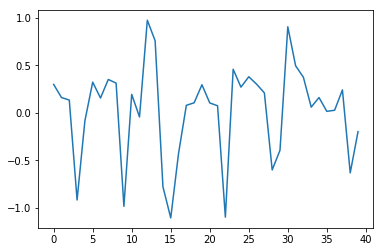

end 9
[array([ 5.85059304e-02, -3.61683332e-01,  1.17292530e-01, -2.24118782e-01,
        2.54661179e-01,  1.64973118e-01, -3.20669786e-01, -5.72774725e-01,
        1.45641552e-01,  1.31698124e+00,  3.85390661e-01,  1.60604195e+00,
       -4.26291819e-01, -1.38756875e+00,  9.88790457e-01,  8.87329127e-01,
       -8.98130094e-02, -6.27932874e-01,  1.09921138e-02, -1.63626541e-02,
        3.12522431e-02, -7.55798160e-02, -3.12184357e-02,  7.52377122e-02,
       -4.12580400e-01, -1.19296421e-01, -1.29749457e-02, -4.18294683e-04,
       -8.94731863e-03,  7.98638147e-03, -2.57657960e-03,  1.91639071e-02,
        1.39688864e-02, -1.50248515e-02,  9.73274215e-02, -1.27335470e-01,
       -3.17096707e-01,  4.08294185e-01, -9.77058741e-02,  1.37839846e-01])]
[0.35631301 0.40196921 0.83864973 0.10128749 0.52086676 0.84126271
 0.06677037 0.49602901 0.14456211 0.62033343 0.14807711 0.73762475
 0.55580343 0.27935928 0.54766488 0.71880256 0.57240691 0.31854569
 0.65825242 0.42439066 0.1516855  0.3648

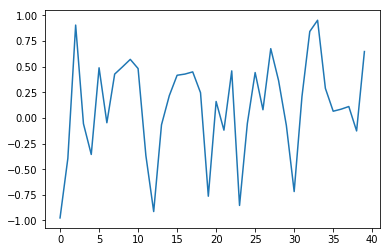

end 15
[array([-1.19243587e-01,  6.27077741e-03,  1.05735477e-02,  2.20782108e-03,
       -4.74868893e-03,  6.53782198e-03,  2.79229373e-03,  1.96924113e-03,
       -3.07434295e-03, -1.05891634e-02, -1.26591590e-03,  1.03127675e-02,
       -2.48604915e-02, -1.06408071e-01, -4.78536960e-02,  2.09528423e-02,
       -1.73278406e-01,  1.35091365e+00,  1.23140944e+00,  9.73213343e-01,
       -1.76797416e+00, -7.01227137e-01,  7.34316576e-01,  6.82172964e-01,
       -6.92130786e-01,  3.28674261e-01,  5.03481859e-01,  6.04153183e-02,
        3.52158368e-01,  5.10296025e-02, -1.53632396e-01,  7.99306648e-02,
        6.60554412e-02,  9.96888727e-03, -3.73135556e-03, -7.84309410e-02,
        5.83018342e-02, -9.60053394e-02, -6.60047635e-02,  4.10043915e-02])]
[0.09919282 0.31050553 0.39605539 0.22789434 0.12356249 0.70250683
 0.06363103 0.65451418 0.58432263 0.75684217 0.63378933 0.2363561
 0.42916556 0.31871612 0.00508557 0.47607646 0.26140247 0.01540445
 0.85512504 0.03927506 0.81380425 0.4728

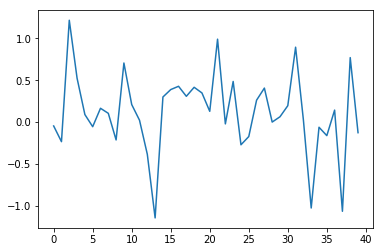

end 21
[array([-8.94968913e-02, -1.65432324e-02, -1.18679490e-02,  7.49381710e-02,
        3.57963706e-02, -3.06841762e-02, -4.13600585e-03, -2.62469619e-02,
        8.87685746e-02, -2.29894876e-01, -1.13113786e-02, -7.28493158e-02,
        6.27215376e-04,  1.97290026e-01,  1.55136417e-02, -4.87114843e-03,
        1.00516818e-01,  2.90644119e-01,  1.08354670e-01, -1.13152159e-02,
        3.30344117e-01,  8.67737582e-01, -1.19507424e+00, -8.15488721e-01,
       -9.91778474e-01, -1.39209993e-01,  2.02305424e+00, -3.89363250e-01,
       -7.31152771e-01,  4.72781350e-01,  4.33823016e-01,  6.02174541e-01,
       -2.23626094e-01, -1.85023207e-01,  1.86409875e-01,  2.49610297e-01,
        2.48957479e-02, -2.43505928e-01,  1.14237378e-01, -7.32766847e-02])]
[0.35166531 0.2352479  0.07960778 0.54702181 0.45326627 0.06200817
 0.23126319 0.85775284 0.50160545 0.3820073  0.46208645 0.63661032
 0.00233125 0.17231662 0.66508283 0.38675937 0.58922887 0.04368878
 0.19456238 0.33839445 0.71491761 0.419

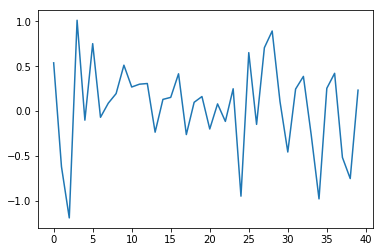

100


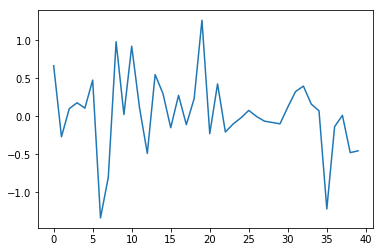

200


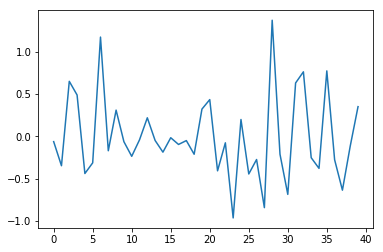

end 300
[array([-0.28572404, -0.01987663, -0.02441099,  0.27819776, -0.01492575,
        0.21940502,  0.15922096, -0.20323554,  0.21748167,  0.00502324,
        0.03490605,  0.00853449, -0.01166813,  0.00807465, -0.01116113,
       -0.01847087,  0.01910396,  0.03980162, -0.0209806 ,  0.01572716,
        0.19655669, -0.23124662, -0.0386564 , -0.03455756, -0.13282449,
       -0.49147155, -1.0452673 , -0.02277817, -1.44924705,  0.65255395,
        0.98928764, -1.49945885, -0.80647418,  0.66372994, -0.291539  ,
       -0.71403256, -0.61991088, -0.58107585,  0.11332705,  0.22844237])]
[0.83923689 0.46156271 0.10773766 0.09812892 0.41210669 0.69722068
 0.55863508 0.75108249 0.27525599 0.61060045 0.04207698 0.58111241
 0.85602046 0.44405843 0.0198064  0.09095075 0.60124322 0.47081459
 0.39203075 0.04261047 0.75787405 0.16954832 0.0860008  0.220179
 0.74286893 0.11918308 0.52844562 0.82628171 0.71068835 0.71590416
 0.35456245 0.18034848 0.07646482 0.28655413 0.75017838 0.14530223
 0.82176792 0

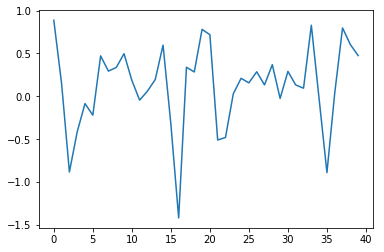

end 8
[array([-1.24643189e-01, -2.96610965e-02,  3.89406699e-02, -4.88284504e-02,
       -9.36778547e-02,  3.36534023e-03,  9.73880822e-03,  1.35825685e-02,
        1.14657734e-02, -1.16201653e-01, -1.52140366e-02,  2.73852823e-02,
       -2.73927184e-02,  6.63999532e-03, -7.47666489e-04, -8.07184751e-02,
        3.63154566e-03,  2.19004748e-01,  3.88939288e-01, -1.08069350e+00,
       -3.10753853e-01, -3.13016812e-01, -3.68008084e-02, -5.99432009e-01,
       -4.69252516e-01, -7.60748978e-01,  6.38506741e-01,  1.18544370e+00,
        8.96034159e-01, -1.73203158e+00,  6.12742871e-01, -5.61502231e-01,
       -6.67201096e-01,  3.37097639e-01, -9.73365486e-02,  3.77635262e-02,
       -7.20863943e-02, -4.08481031e-01,  2.86807508e-01,  3.11230193e-01])]
[0.4166592  0.45126315 0.48949839 0.85328673 0.56230852 0.35485376
 0.07909165 0.35600111 0.18729532 0.4371195  0.39576498 0.38021399
 0.49452385 0.27265513 0.51374964 0.60520045 0.22316907 0.44698502
 0.82859172 0.47151836 0.71990915 0.7731

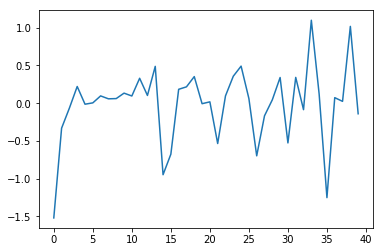

end 43
[array([ 0.14522479,  0.17117625,  0.00828163, -0.1037483 ,  0.02251051,
       -0.05358034, -0.25885044,  0.09006157, -0.05405868, -0.07263711,
        0.13899351,  0.05305502,  0.03792227,  0.03198192,  0.0636691 ,
       -0.05059471, -0.04951133,  0.0078354 , -0.00945886, -0.04011981,
       -0.02740419, -0.10349954, -0.13107038,  0.17692629,  0.33219975,
        0.06903633, -0.75360977, -0.70227182,  0.76061288, -0.47156907,
       -0.19096243,  0.9169039 ,  0.71794214,  0.63118937, -1.86358585,
       -1.19399956, -0.78288417,  0.59956078,  0.29688495, -0.17159606])]
[0.28169519 0.35366205 0.47628703 0.26265187 0.75336244 0.27266203
 0.13993421 0.21635438 0.18527505 0.03224606 0.63283294 0.22709185
 0.57509612 0.355987   0.24047321 0.45905262 0.44886869 0.23755649
 0.82809663 0.87225549 0.86719993 0.30125618 0.67854341 0.38474401
 0.61232363 0.59672632 0.36330323 0.54899501 0.36224513 0.03511585
 0.18821159 0.60815588 0.25898438 0.4676096  0.62904416 0.0232712
 0.85381216 0

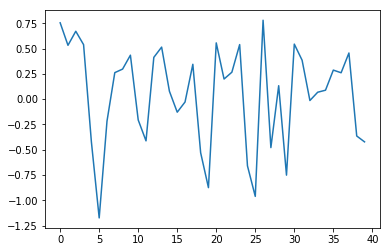

end 41
[array([ 1.48708795e-02, -2.28931003e-03, -7.83263008e-03,  2.25819881e-03,
        7.01127842e-04, -1.15078632e-03, -1.49246299e-03, -1.06251665e-03,
       -2.67160374e-03, -5.64527048e-03,  6.66038726e-03, -1.27109537e-02,
        4.25706019e-02, -1.57342543e-02,  1.82738933e-02,  4.73835687e-03,
       -1.03956496e-02,  1.51171284e-01, -2.43351788e-01, -2.55019103e-01,
        9.60434852e-02,  1.96948188e-02, -1.23317590e-01,  7.61757294e-02,
        1.29952525e+00,  8.43945563e-01,  1.77470213e+00, -5.96173749e-01,
       -1.26135568e+00,  1.35330134e+00,  6.80570566e-01, -5.75771561e-02,
       -1.40746350e-01,  1.29601452e-03,  2.52117656e-02,  7.91960242e-03,
       -6.19182250e-03, -3.75880947e-02, -1.41102454e-02,  4.59154728e-02])]
[0.74530068 0.72617643 0.21229468 0.51700609 0.5908247  0.66594374
 0.62578674 0.20002652 0.77295643 0.07379727 0.27986198 0.73035373
 0.70713142 0.26183326 0.14588964 0.45777773 0.53967944 0.09264539
 0.03616626 0.80602887 0.10240289 0.416

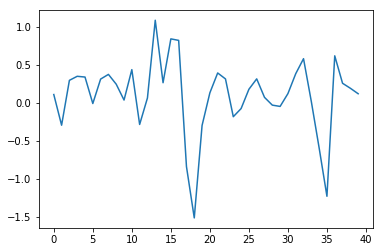

end 16
[array([-1.66398108e-01,  1.31050374e+00, -5.13706072e-01,  1.51443186e+00,
        5.91100695e-01, -1.86923526e+00,  7.53750039e-01,  3.67482587e-01,
       -2.43629461e-01, -1.02479177e-02,  1.14294101e-02, -9.76159723e-03,
       -4.80258950e-04,  9.52738340e-03,  4.93804264e-04, -5.14268214e-03,
        9.81185952e-03,  3.64252115e-02,  3.36492268e-02,  3.98798196e-02,
        5.15317894e-02, -8.31215784e-02,  1.22570567e-01, -4.62694982e-02,
        4.34217087e-02,  1.23254023e-01, -3.38693240e-01, -4.73042070e-02,
       -3.67407514e-02, -6.48986048e-02, -5.54925874e-02,  1.15225148e-01,
       -4.21911051e-02, -7.70328887e-02, -4.31573531e-02, -2.48045877e-02,
       -6.88021314e-02, -3.24686969e-01, -7.94214044e-01,  3.91309203e-01])]
[0.26328459 0.16160579 0.1098265  0.54976158 0.90150581 0.85994716
 0.01252058 0.09967159 0.26168138 0.51101297 0.3714768  0.71940389
 0.70438377 0.37514324 0.86102527 0.15279841 0.42322347 0.29528269
 0.51665499 0.35160444 0.09625557 0.232

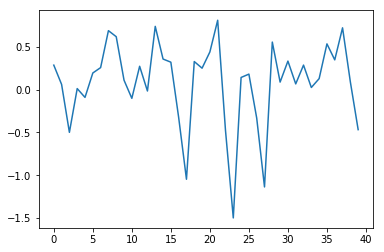

end 14
[array([ 0.00694929,  1.31563174,  0.03233942, -1.07411289, -0.05788949,
        0.51307101,  0.76220281, -0.4918165 , -1.10214623, -0.38165508,
        0.17204111,  0.50237588,  0.75514557, -0.0920052 ,  0.29519683,
       -0.38651186,  0.22148957, -0.19665297, -0.43550978, -0.47024781,
       -0.02322247,  0.6364953 , -0.44779398, -0.43124901,  0.6530798 ,
        0.79791281, -0.1529344 , -0.33192486,  0.30395823,  0.06428853,
        0.12654049,  0.18200864, -0.07430484, -0.19829132,  0.06942585,
        0.04448867, -0.14076673, -0.14696485, -0.78587502, -0.47277022])]
[0.68628288 0.52923238 0.24585569 0.17500317 0.47638179 0.02568678
 0.02078624 0.14802463 0.73325083 0.21746116 0.75572474 0.16901165
 0.77485563 0.52260255 0.67375797 0.5617791  0.44861061 0.60004898
 0.03230256 0.3402889  0.66310891 0.75024732 0.54243102 0.36252723
 0.15273271 0.43726067 0.6925171  0.39644021 0.82678666 0.20172789
 0.57094673 0.75428165 0.05693445 0.58535403 0.10373068 0.12860303
 0.82858095 

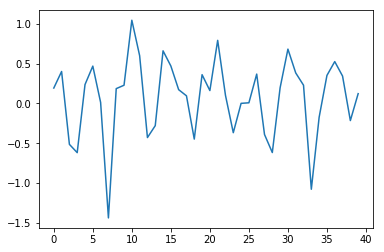

end 32
[array([-0.14761596,  0.08740953,  0.05395369,  0.14637177, -0.25467061,
        0.12850351, -0.10694273, -0.07495316, -0.02890838,  0.04255838,
        0.02226129, -0.01959144,  0.03465975,  0.05464282,  0.44711183,
        0.63638648, -0.00774162,  0.16569127,  0.01317146,  0.18021287,
       -0.03060428, -0.01858144, -0.04354615, -1.15115084,  0.22273595,
        0.41173814,  1.79621395,  0.35347383, -0.54854321,  0.20751262,
       -0.34912732, -1.04275016,  0.58222954, -0.34701977, -0.88058658,
        1.14088132, -0.27393107,  0.31863823,  0.07153281,  0.07013512])]
[0.04095237 0.54243076 0.50063247 0.65105143 0.67189373 0.47232384
 0.21945146 0.31649161 0.79687685 0.58735984 0.04300286 0.61304555
 0.39247528 0.71664503 0.26382319 0.3119894  0.25915755 0.68956299
 0.14884044 0.76335147 0.26395648 0.47846623 0.3863666  0.53430075
 0.61373972 0.5527312  0.03268829 0.00671293 0.2153866  0.643514
 0.1309258  0.81552349 0.7335522  0.75362961 0.38794776 0.22524753
 0.27549858 0.

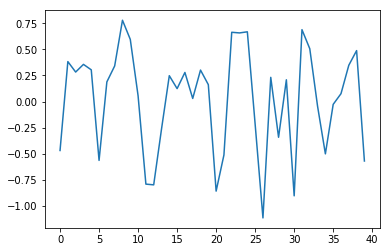

end 39
[array([-0.07100191,  0.4079473 , -0.07118456,  0.18004508,  0.11267333,
       -0.01303722,  0.01248394, -0.07028552, -0.01834617,  0.03359352,
       -0.01947371, -0.01267972,  0.01597927, -0.04844549,  0.01461737,
       -0.06993188, -0.06831848,  0.23621659,  0.16685845,  0.1273868 ,
        0.01567373, -0.11812681, -0.10685367, -0.23607318,  0.24763881,
        0.64018422, -0.28672849, -0.23086918, -0.19766603,  0.82962908,
        0.78337099,  1.35280595,  0.2621469 , -1.16875021,  1.0498994 ,
        0.21387827, -1.51678091,  0.82943323, -0.38777028, -0.27934492])]
[0.63183779 0.80051334 0.42219611 0.57721341 0.80003426 0.78916517
 0.56343087 0.59096555 0.09677439 0.4003323  0.08596222 0.47508547
 0.75995293 0.754125   0.20067201 0.68538485 0.2871098  0.79195913
 0.12450862 0.58070147 0.13409513 0.32376865 0.24263325 0.64099393
 0.26654443 0.02130905 0.29349716 0.18256754 0.4243039  0.49432321
 0.53236098 0.73831104 0.00590463 0.24854153 0.15279125 0.69390559
 0.06720206 

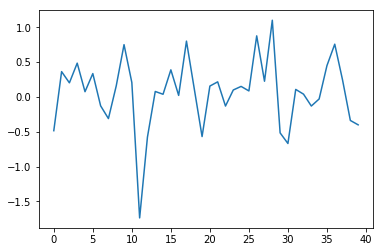

end 33
[array([-6.14209977e-01,  3.80452003e-01, -1.39474335e-01,  2.42734822e-01,
        1.50694920e-01, -3.07845609e-01, -9.03254435e-02,  5.65831749e-02,
       -2.68828828e-02, -1.39931429e-01,  1.87797126e-01,  1.11139356e-01,
        5.32036042e-02,  9.47344794e-03,  1.89517805e-03, -1.54948512e-02,
        1.03704386e-02,  5.06101758e-03, -1.89526690e-03, -8.18954953e-03,
        5.10196383e-03,  4.86011379e-03, -5.05820332e-04,  1.34950225e-03,
        1.63211050e-02,  2.37781820e-01,  3.71164591e-01,  3.67752797e-01,
        1.20722582e-01, -8.28905876e-01, -1.07145835e+00, -2.32071930e-01,
        5.02486581e-01,  9.95039608e-01, -2.85637491e-02,  1.11814152e+00,
        1.99873813e+00, -3.55458546e-01, -5.00818438e-01,  3.16733390e-01])]
[8.35972020e-01 2.81111348e-01 5.38559838e-01 7.90833700e-01
 3.64021992e-01 5.34110834e-01 4.52243440e-01 2.25564905e-01
 3.61175436e-01 2.14378253e-01 6.81973425e-01 6.70432150e-01
 2.90945780e-01 6.91549295e-01 1.86323140e-01 6.17973096e

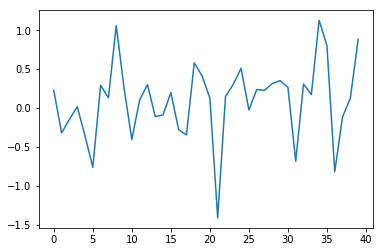

end 26
[array([-6.25056444e-02, -2.47796108e-03,  1.52914198e-02, -1.03908514e-02,
       -9.38368498e-03, -6.33690766e-04, -2.83881627e-02, -5.43142136e-02,
       -1.94331035e-03, -3.36270045e-02, -1.27477399e-01,  7.66018336e-01,
       -1.39184304e+00,  4.82586966e-01,  1.43532752e+00,  1.62216085e-01,
        8.77928500e-01,  1.36811827e+00, -3.90305830e-01, -1.00957287e+00,
        8.88527067e-01,  6.52194763e-01,  1.75771700e-01, -2.48259257e-01,
       -1.44364098e-02,  3.33257221e-02,  3.14678063e-02,  3.56807434e-04,
       -2.33207850e-02,  5.70850633e-02,  3.39194730e-02,  1.14959509e-02,
        1.10049504e-02, -2.07314133e-02, -5.93284064e-03,  1.85203683e-02,
        6.41087511e-03, -1.51296427e-02, -1.32759885e-02, -3.02732525e-02])]
[0.41124256 0.88188555 0.81170106 0.7827663  0.26294712 0.2953204
 0.72828495 0.34539953 0.3234191  0.26793688 0.07970341 0.6195555
 0.41712363 0.16647271 0.29972611 0.66400643 0.48559868 0.54333624
 0.67489028 0.47866196 0.26368597 0.59510

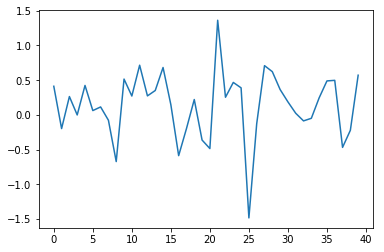

end 57
[array([-2.51677672e-02, -2.45952414e-02,  8.50992395e-01,  4.27164040e-01,
       -4.07450281e-01, -6.92525724e-02,  5.67611411e-01, -3.22910928e-01,
       -1.88035097e+00, -1.15455896e+00, -1.10552742e+00,  1.31262423e+00,
        4.12395737e-01, -6.39127732e-01, -3.04990314e-01,  7.85064139e-02,
        2.41378253e-02, -5.75880024e-03, -2.45895508e-03,  2.67335798e-03,
        1.17288033e-03, -3.06171936e-03,  1.58155827e-02,  3.22303404e-03,
       -8.97112822e-04,  3.70231673e-03,  1.65709866e-03, -1.57260533e-03,
        2.46236364e-03, -1.08542381e-02, -9.39406640e-03,  3.91714166e-03,
       -2.16426882e-02,  1.46756345e-03,  9.34530107e-04,  2.31458528e-05,
       -1.50222820e-02, -1.06694615e-02, -3.96870573e-03, -3.50463406e-02])]
[0.34241004 0.06546398 0.33205371 0.40427175 0.5265092  0.7407122
 0.7557316  0.29216838 0.40366965 0.63237414 0.14360264 0.41340983
 0.24728397 0.43106452 0.18857372 0.49218526 0.1321362  0.11135207
 0.75505608 0.47802775 0.43367333 0.7400

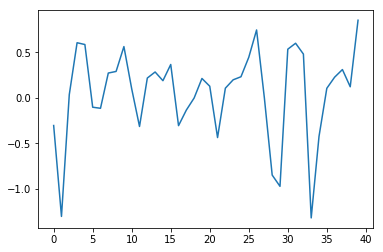

end 23
[array([ 0.0600933 , -0.04486147, -0.02874453,  0.03617451,  0.00324428,
       -0.00634312, -0.0236594 , -0.0771222 ,  0.08323743,  0.24695129,
        0.23553488, -0.03979248, -0.0986781 ,  0.16226139, -0.05764691,
       -0.01052718,  0.04742676,  0.03512643, -0.149802  , -0.01791023,
        0.18415824,  0.19764309, -0.15969999, -0.40547009, -0.2546748 ,
        2.03981357,  1.15440813,  1.11648938, -0.02024054, -1.17242998,
        0.07681738,  0.18633266,  0.14722067,  0.19709238, -0.58274315,
        0.24553525,  0.72266973, -0.54740924,  0.15663393,  0.06863497])]
[0.67045137 0.43552915 0.21660278 0.42611151 0.44100052 0.45004502
 0.67161129 0.09987911 0.69905166 0.67369073 0.8498664  0.21336498
 0.37808008 0.7578742  0.67549689 0.49412257 0.00435604 0.70255385
 0.74307487 0.41280793 0.60185557 0.45930316 0.24851484 0.28470772
 0.7742648  0.46338149 0.86294826 0.41981329 0.17275172 0.15276092
 0.53785856 0.15504396 0.62710737 0.49152763 0.1071547  0.06597059
 0.16526788 

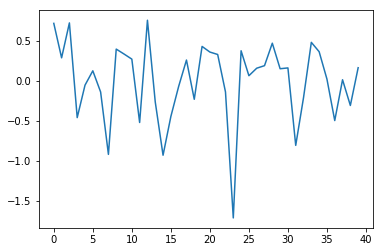

end 26
[array([-6.49446950e-02,  3.09183649e-01,  2.04847764e-01,  1.31563059e-01,
        1.54380674e-02,  1.15034068e-01,  3.35309093e-01,  4.58941811e-02,
       -8.41666383e-02, -2.48810549e-01, -3.89190083e-01, -5.41775618e-01,
       -5.27170504e-01, -8.83946597e-02, -1.33929822e+00, -3.74354848e-01,
        1.90457397e+00, -5.35734136e-01, -6.28941188e-01,  9.49501189e-01,
       -1.98305137e-01,  1.82571427e-01,  3.92157803e-01, -8.56129011e-01,
       -3.00092610e-01, -1.56611156e-01,  1.78252150e-01,  4.33122799e-02,
       -4.63406883e-02, -7.02724681e-02,  3.23398504e-02, -3.62361232e-02,
        5.59586453e-02,  1.39019105e-01,  1.31657410e-04, -2.34655060e-01,
       -3.40264413e-01,  3.23249349e-01, -4.75648109e-01, -3.55948303e-01])]
[0.62588511 0.75158664 0.45126356 0.48941367 0.63431011 0.55927324
 0.77349698 0.37793179 0.51135423 0.6345247  0.50298983 0.17841076
 0.12483965 0.70551384 0.45003735 0.28526573 0.16849992 0.59841696
 0.74199643 0.22079517 0.69206769 0.492

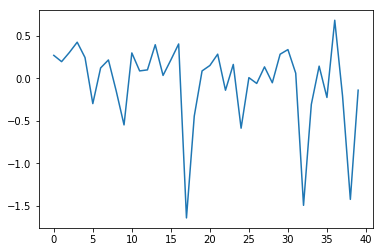

end 12
[array([-0.08108768,  0.2485704 ,  0.3308247 ,  0.15683922, -0.26191591,
       -0.09863199,  0.02598015,  0.21132612, -0.22343873, -0.14895146,
       -0.00539754, -0.22009209, -0.31057835, -0.15122794, -0.03986891,
        0.14178015,  0.10607915,  0.05180424,  0.05194864,  0.17936158,
        0.20449495, -0.27902028,  0.14561579,  0.00914649,  0.00784824,
        0.22338141, -0.02355153, -0.50464645,  0.94078381,  0.93639693,
        0.75321444, -1.97479377,  1.24387317, -0.78330544, -0.26662881,
        0.10798515,  0.30661632,  0.1198693 , -0.40373124,  0.41642188])]
[0.64350167 0.623593   0.68574282 0.51846786 0.40405331 0.72140436
 0.68032739 0.60376812 0.33573211 0.41950048 0.52136923 0.07170682
 0.62675003 0.52740098 0.58123783 0.45700436 0.31706443 0.74910451
 0.479836   0.44250257 0.17216318 0.45858608 0.6275768  0.4481404
 0.75282188 0.01322613 0.24506321 0.17077522 0.6836522  0.78419361
 0.21693292 0.33691023 0.08321461 0.41457326 0.17892149 0.65315777
 0.39692713 0

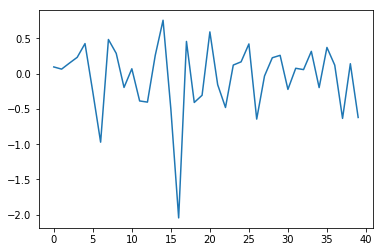

end 7
[array([-1.56803803e-01,  6.54578928e-02, -4.11269178e-02, -8.20538763e-02,
        2.47434260e-02, -1.45860921e-02, -3.65461341e-02, -1.06730689e-02,
       -2.93072722e-02,  4.91020253e-04, -1.13620452e-01, -2.94276128e-01,
       -1.20720484e-01,  1.26684405e-01,  9.76036135e-02, -8.63857201e-01,
       -4.00118264e-01,  5.26873340e-01,  1.23634222e+00, -1.13107733e-02,
        1.27788741e+00, -5.61487006e-01, -1.53052267e+00,  4.16939843e-01,
        9.08307819e-01, -1.00986071e+00,  3.71965798e-01, -2.05377645e-02,
        5.86492679e-02, -4.69866622e-02,  1.66757461e-01, -9.10796700e-02,
       -3.63863207e-01, -2.42947733e-01, -4.81141292e-02,  2.12499978e-01,
        1.95807203e-01, -3.08025026e-01,  4.69835291e-01, -1.56434535e-01])]
[0.00766644 0.83328277 0.57517844 0.54643176 0.41769098 0.09942736
 0.19323899 0.09804616 0.49001472 0.35106711 0.61156412 0.66468095
 0.55703227 0.13757158 0.75126504 0.53830438 0.00211251 0.03162109
 0.61579397 0.40798218 0.42587585 0.0260

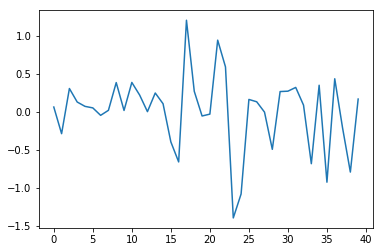

end 6
[array([-0.14936609, -0.03581818, -0.01523238, -0.02596217, -0.08068291,
       -0.05965091, -0.01212415,  0.07163646, -0.02809416, -0.06648016,
        0.16136317,  0.15068358,  0.39986045, -1.42098274, -0.03959297,
       -1.42562642, -1.44335137,  1.24279203, -1.17806161, -0.07924304,
        0.58180231, -0.05132636,  0.04208598,  0.04435168,  0.07753323,
        0.07256567, -0.11336962, -0.14227321,  0.03030608,  0.13489747,
        0.10987366, -0.19683074, -0.30435668,  0.02101075, -0.17550837,
        0.03915155,  0.10418822, -0.19695683, -0.19216463,  0.00925759])]
[0.71425955 0.455004   0.27439753 0.19180723 0.25784784 0.28973331
 0.75388116 0.21663362 0.7866811  0.29740513 0.48652065 0.29187561
 0.28864392 0.37702065 0.70513195 0.65807138 0.53465712 0.00102591
 0.78416854 0.69075195 0.06079589 0.23221796 0.64989161 0.20217771
 0.77516657 0.5491491  0.38498538 0.02465126 0.16622384 0.7770237
 0.33828388 0.34783888 0.39611692 0.58484365 0.80682379 0.03220332
 0.74013277 0.

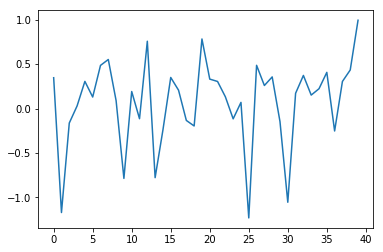

end 36
[array([ 0.10228464,  0.04287785,  0.00571394,  0.02362615, -0.00977346,
       -0.02340021,  0.0610646 ,  0.03803795,  0.02155946, -0.06265987,
        0.05216807,  0.0820694 ,  0.08847749,  0.01018043,  0.06404359,
       -0.0098471 , -0.01228587,  0.0170828 ,  0.14632439, -0.029103  ,
       -0.08638938,  0.5976597 , -0.15789795,  0.10932864,  0.42618191,
        0.64978995, -0.0704096 ,  1.00836581, -1.18556049, -1.32715745,
        1.58110832,  1.32450155,  0.23209687, -0.0271572 ,  0.08623045,
        0.23362537,  0.3175444 ,  0.39117533,  0.01497004, -0.33710632])]
[0.59210792 0.93664115 0.00239679 0.09770139 0.24955852 0.4406875
 0.39501683 0.94010735 0.38063049 0.37763002 0.38396654 0.05297647
 0.92656651 0.18452307 0.44482481 0.61047968 0.44971734 0.18661509
 0.67215239 0.84658886 0.19424724 0.90834627 0.10763042 0.64219075
 0.03738506 0.79651882 0.01365171 0.30079714 0.32649678 0.26466489
 0.37650703 0.49307831 0.2004573  0.01822591 0.8099663  0.10379245
 0.4245604  0

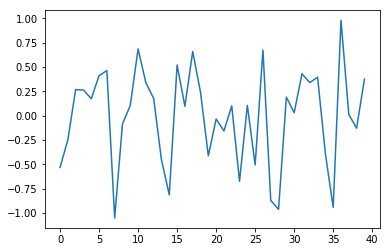

100


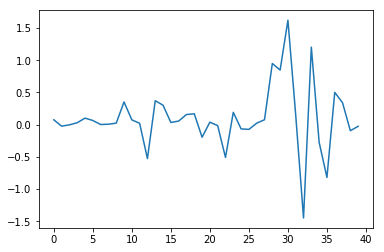

200


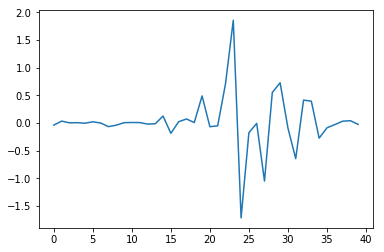

300


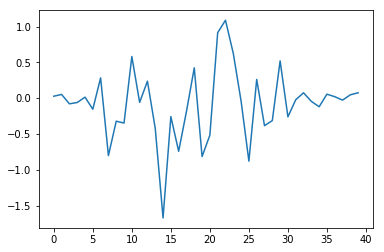

400


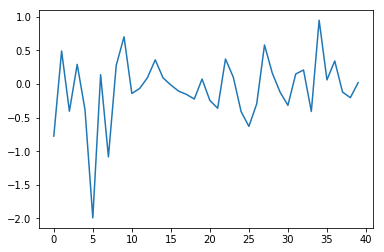

end 436
[array([ 1.07235482e-02, -3.47366685e-02, -1.65168606e-03, -1.01130743e-02,
       -2.04555422e-03, -2.46465829e-02,  2.61945198e-02, -6.35103656e-02,
       -7.87402943e-02,  2.52677826e-01,  1.76259864e-04, -3.98545404e-02,
       -8.66540299e-02,  1.44363431e-01,  3.92937967e-02,  1.39309880e-01,
        1.99820815e-01,  1.63192817e-01,  6.22818061e-02, -6.75655406e-02,
       -1.20344441e-01,  3.71615928e-01,  3.80640724e-01, -2.47474846e+00,
       -6.98346616e-01, -1.12041346e+00,  9.52076544e-01,  7.29068389e-01,
       -1.99838103e-01, -3.57153729e-01,  1.45402789e-01,  6.02902049e-02,
       -1.86084455e-03,  9.86124778e-03, -1.08706897e-02, -1.87968732e-02,
       -7.82449512e-03, -7.31053851e-03, -3.86023983e-02, -9.52034999e-04])]
[0.37796497 0.45901666 0.39768925 0.12346102 0.4195336  0.40366233
 0.58053517 0.81237587 0.18740371 0.844306   0.08263132 0.34402962
 0.4642033  0.57043501 0.37385667 0.53539383 0.83332169 0.6711934
 0.29419807 0.80190103 0.48817109 0.693

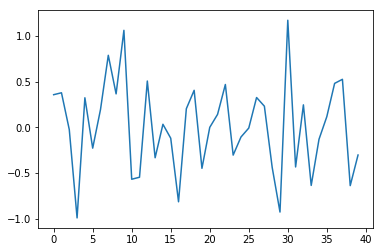

end 17
[array([ 0.10659677, -0.04633422,  0.03250403,  0.06570954, -0.11665838,
       -0.09857563,  0.31215516,  0.10432206,  0.0695744 , -0.27562513,
        0.00309937,  0.0166516 ,  0.29919538, -0.14417395,  0.16487454,
        0.03032102, -0.04264359,  0.18144551,  0.50467403,  0.76016676,
        1.07359978,  0.53048879,  1.82276738,  0.24705579, -1.33947653,
        0.85237818,  0.00712784, -1.02093958,  0.33011537, -0.21037655,
       -0.17128456,  0.27567048,  0.20543462, -0.19211775, -0.1533781 ,
        0.03909071, -0.01823304,  0.0861874 ,  0.09901677, -0.04132087])]
[0.81383242 0.024801   0.27015155 0.51046881 0.40532532 0.42849497
 0.72241195 0.07885784 0.85726881 0.14796485 0.57515444 0.75735014
 0.56817338 0.03678743 0.13398225 0.40568738 0.59769018 0.5717697
 0.06162604 0.85643324 0.13640601 0.56914774 0.80060016 0.32624032
 0.43197723 0.07373785 0.24604233 0.21277575 0.06017203 0.89332625
 0.21861205 0.68973666 0.91476643 0.49179517 0.34044444 0.28029025
 0.51425602 0

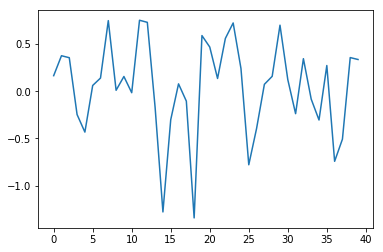

end 18
[array([ 8.77152181e-02,  7.01414255e-03, -6.00874200e-02, -3.62870755e-02,
       -9.90500946e-02,  1.80084910e-03, -4.52232160e-02, -1.36535723e-01,
        4.12489738e-01,  1.78719323e-01, -2.38943524e-01, -1.15920123e-01,
       -1.83721715e-02,  4.78444126e-02, -7.90623144e-02, -2.80747166e-01,
       -1.30995461e-01, -3.72493215e-01, -1.34916732e-01,  8.27261931e-01,
        4.96621359e-01, -1.01555260e+00, -1.86513564e-01,  1.24688114e+00,
       -1.69874537e-01, -1.97622062e+00,  5.24358882e-01, -6.38814353e-01,
       -8.72143996e-01,  6.05155599e-01,  3.05483071e-01,  3.74788369e-02,
        8.32129837e-02, -1.05113686e-01,  5.66284828e-02,  5.04606317e-02,
        6.62559750e-02,  5.01311094e-02,  1.40991823e-02, -2.85297734e-02])]
[0.24477023 0.09923814 0.39196538 0.64996786 0.87241657 0.52979597
 0.12807449 0.04017794 0.60045135 0.35851506 0.66949791 0.48823608
 0.01815252 0.66044628 0.15664402 0.65630466 0.06364548 0.59275602
 0.82240339 0.13411513 0.38424008 0.057

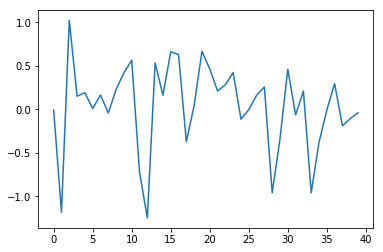

end 94
[array([-0.77582894, -0.32626822,  0.1716792 ,  0.00407109, -0.08694644,
        0.2278722 ,  0.00956709, -0.05704168, -0.05886045,  0.0269184 ,
       -0.00340949, -0.09847057,  0.04540711, -0.02085964,  0.18087612,
       -0.13314472, -0.29560559, -0.20435046, -1.316876  , -1.35185632,
       -0.82196362,  1.30528798,  0.65366749,  0.38597603,  0.00787174,
       -0.07535985,  0.26036647,  0.09640224,  0.37212626, -0.24423539,
       -0.13847507,  0.24177698,  0.066892  ,  0.1628763 , -0.08669352,
       -0.56028163, -0.36478822, -0.99402954,  0.52752499,  0.61280714])]
[0.42640191 0.8251161  0.37417709 0.47588245 0.56644893 0.11980782
 0.31545264 0.46661774 0.37116749 0.88068528 0.47880846 0.87552627
 0.3652886  0.74415451 0.20651196 0.63102387 0.6572202  0.62019198
 0.36956412 0.79446552 0.13397113 0.52043717 0.19443654 0.40086471
 0.0579922  0.78551259 0.08082856 0.22680521 0.37587271 0.87354836
 0.19170814 0.16094487 0.0584344  0.56050756 0.37335986 0.41097907
 0.10177855 

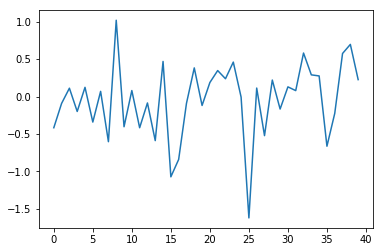

end 39
[array([ 3.80498907e-01,  3.78680146e-01,  7.74839013e-02, -2.45397970e-01,
        9.89706537e-01,  6.41973662e-01, -8.01620515e-01,  9.82491730e-01,
        2.23296514e+00, -5.68325584e-01, -6.40797897e-01, -2.36474659e-01,
        5.43837213e-01, -1.29123882e-01, -7.61244173e-02,  3.08469786e-01,
        2.47055372e-01,  2.92038520e-01, -3.16906093e-01, -1.78330048e-01,
        1.61056839e-01,  3.52994327e-03,  3.32170583e-03, -1.14776820e-01,
       -2.92772271e-02, -1.15642166e-02,  2.31596042e-02,  3.01477528e-03,
       -2.58177924e-02, -1.92965889e-02, -1.91192247e-02,  4.50280888e-02,
       -1.15949345e-01, -2.12452539e-03,  8.15786628e-02, -1.99220453e-02,
       -7.35953486e-02, -1.85456599e-01,  2.09017283e-01,  1.74227631e-01])]
[0.30120065 0.71413201 0.57340729 0.14815072 0.07134366 0.54328272
 0.60673884 0.24808297 0.64349002 0.78561145 0.57284258 0.24414495
 0.39525919 0.27375523 0.59156019 0.06133231 0.02670882 0.17188386
 0.39681617 0.23148818 0.76206082 0.120

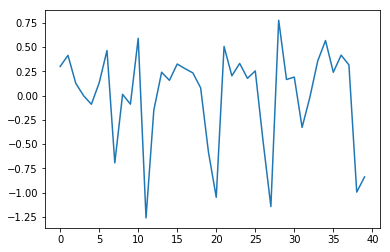

end 23
[array([-0.05141088,  0.00190588, -0.02532279,  0.05529225,  0.07573071,
       -0.13182992, -0.01843088, -0.01196903,  0.06425571,  0.00752013,
       -0.19911135, -0.00240648,  0.1735435 ,  0.25935876,  0.43172441,
        0.3993611 , -0.1645715 , -0.58759164,  0.70893512,  1.70614594,
       -1.76026567, -0.1799233 ,  0.43563217, -0.75656887, -1.1942063 ,
       -0.11545223,  0.1877493 ,  0.07421273,  0.01424528, -0.0171512 ,
        0.0665261 ,  0.27100033, -0.4694126 , -0.0474564 ,  0.06359838,
        0.13491382,  0.00493752, -0.01104403,  0.01186804,  0.01726867])]
[0.06587631 0.79049466 0.582963   0.64555838 0.1545242  0.52523218
 0.43842153 0.6184535  0.74115109 0.50867733 0.65749503 0.44393681
 0.48403079 0.23463597 0.07417795 0.36874677 0.06198738 0.42492531
 0.67655821 0.23093553 0.84830831 0.06935425 0.29600789 0.56544882
 0.04850312 0.34169617 0.47485489 0.16000322 0.51158667 0.65049541
 0.33182814 0.78696989 0.18008041 0.71364615 0.70657777 0.55015878
 0.56816931 

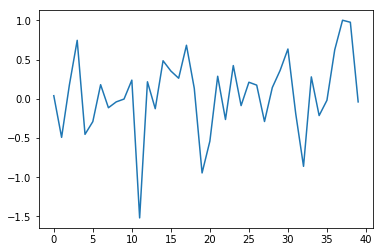

end 14
[array([ 0.09494922,  0.21055094, -0.02652146,  0.14935928,  0.0221082 ,
       -0.10526081,  0.05694654,  0.05177099,  0.05656174, -0.0610383 ,
        0.01435364,  0.06954971,  0.06186984,  0.1423283 , -0.02372195,
       -0.06665993,  0.08319709,  0.03440121, -0.15316572,  0.21350692,
        0.43194262, -0.10656264,  0.03093458,  0.23413169, -1.69444117,
       -0.65671975,  0.40858215, -1.13019148,  0.12875696,  0.41015154,
       -1.94254464, -0.05318902,  0.40126676,  0.12963617, -0.23181745,
        0.59770462, -0.05005552,  0.39502247,  0.22027456, -0.17481457])]
[0.49716379 0.11643973 0.08147114 0.46497306 0.20591922 0.25088546
 0.66333481 0.12991134 0.38022208 0.84463003 0.50450561 0.39051862
 0.65883409 0.59476354 0.07044788 0.02404669 0.73672553 0.50531565
 0.50637759 0.09464775 0.15645506 0.69347932 0.71664549 0.50185106
 0.25152915 0.41671697 0.92452801 0.7678897  0.07233127 0.17848612
 0.16369005 0.86009374 0.11628924 0.58122762 0.6271647  0.21288048
 0.71449275 

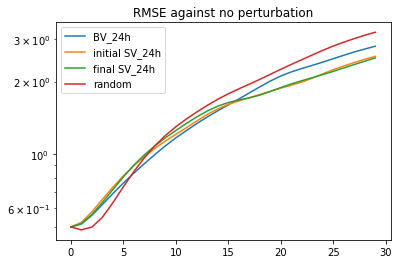

In [5]:
#BV

def Forecast_BV(Xa,window_size):
    h = 0.05
    F = 8.0
    
    X1 = Xa
    
    for k in range(window_size):
        Xf = Rungekutta4(X1,h,F)
        X1 = Xf
       
    return Xf

def Forecast(Xa):
    h = 0.05
    F = 8.0
    
    Xf = Rungekutta4(Xa,h,F)
       
    return Xf

t = 1000
N = 40
h = 0.05 
F = 8.0

C1_6=[]
C1_12=[]
C1_24=[]
C2_i=[] 
C2_f=[]
C3=[]

iter_num=30
for i in range(100):

    BVs=[]

    #初期値
    Xa = np.random.randn(N)
    X0 = Xa
    for j in range(500):
        Xa = Rungekutta4(X0,h,F)
        X0 = Xa
    #B = np.eye(N) * 0.2
#print(Xa)
#print(B)

    a_list=[0.2,0.5,1.0]
    alpha=a_list[1] #rescaling
    
    
    #plt.plot(dX)
    X = []
    X.append(X0)
    Xa = X0
    for k in range(t*4):       
        Xf = Forecast(Xa)
        Xa = Xf
        X.append(Xf)

    window_size=4
    for i in range(1):
        window_size += i #assimilation window length
        t = t*window_size
        print(alpha,window_size)
        BV=[]
        dX_norm=np.zeros(5)
        BVdim=[]

        #初期摂動
        dX = np.random.rand(5,N)
        #dX_norm = np.linalg.norm(dX)
        dX_norm = np.sqrt(np.sum(dX*dX,axis=1,keepdims=True)/N)
        dX = dX/dX_norm
        dX_norm = np.sqrt(np.sum(dX*dX,axis=1,keepdims=True)/N)
        #print(dX_norm)
        for i in range(1,5):
            for j in range(i):
                dX[i] -= dX[j]
        dX_norm = np.sqrt(np.sum(dX*dX,axis=1,keepdims=True)/N)
        dX = dX*alpha/dX_norm
        dX_norm = np.sqrt(np.sum(dX*dX,axis=1,keepdims=True)/N)
        #print(dX,dX_norm)
        #BV.append(dX[0])

        X1 = dX
    
        C = dX@dX.T
        #print(C.shape)
        la,v = np.linalg.eig(C)
        #print(la)
        dim = (sum(la))**2/sum(la**2)
        print(dim)
        BVdim.append(dim)
        #plt.plot(dX)
    
        X=[]
        X.append(X0)
        for k in range(t):
        
            Xf = Forecast(Xa)
            Xa = Xf
            X.append(Xf)
    
        t=int(t/window_size)
        #print(t)
        Xa_=np.zeros((5,N))
        Xf_=Xa_
        for i in range(5):
            Xa_[i]=X0+X1[i]
        #print(Xa_)
        breed_num=0
        for k in range(t):
            for i in range(5):
                Xf_[i] = Forecast_BV(Xa_[i],window_size)
    
                dXa = Xf_[i]-X[k*window_size]
                #new_norm = np.linalg.norm(dXa)
                new_norm = np.sqrt(sum(dXa*dXa)/N)
                if(new_norm>dX_norm[i]):
                    dXa = dXa*alpha/new_norm
            
                dX[i] = dXa
                #dX_norm=np.linalg.norm(dX)
                dX_norm[i]=np.sqrt(sum(dX[i]*dX[i])/N)
                #print(dX_norm)
                Xa_[i]= X[k*window_size]+dX[i]
                BV.append(dXa)
            breed_num+=1
            #print(dX)
            C = dX@dX.T
            #print(C.shape)
            la,v = np.linalg.eig(C)
            #print(la)
            dim = (sum(la))**2/sum(la**2) 
            if(dim-1<0.0001):
                break
            BVdim.append(dim)
            if(k%100==0):
                print(k)            
                plt.plot(dX[0])
                plt.show()

        
#print(X)
#print(P)
        print('end',breed_num)
        """plt.plot(Bnorm)
    plt.show()
    #l=Bnorm.index(min(Bnorm))
    #print(l,Bnorm[l])
    #dX = np.array(BV[l])
    fname="BV"+str(alpha)+"_"+str(6*window_size)+"h_nature.jpg"
    #fname="BV"+str(alpha)+"_nature.jpg"
    print(fname)
    plt.plot(dX,label="BV")
    #plt.plot(dX_random,label="random")
    plt.legend()
    plt.savefig(fname)
    plt.show()
    fname="BV"+str(alpha)+"_"+str(6*window_size)+"hassimilation_ncontour.jpg"
    #fname="BV"+str(alpha)+"_ncontour.jpg"
    print(fname)
    xs=np.arange(N)
    time=np.arange(breed_num)
    BV = np.array(BV).reshape(breed_num,N)
    plt.pcolor(xs,time,BV,cmap='RdBu_r')
    plt.colorbar()
    plt.xlabel('site')
    plt.ylabel('breeding time')
    #plt.savefig(fname)
    plt.show()"""
        BVs.append(dX[0])
    
    print(BVs)


    #SV
    SVi=[]
    SVf=[]
    #X0 = np.random.randn(N)
    #X1 = np.random.randn(N)
    #初期摂動
    dX = np.random.rand(N)
    dX_norm = np.sqrt(sum(dX*dX)/N)
    dX = dX*alpha/dX_norm
    dX_norm = np.sqrt(sum(dX*dX)/N)
    print(dX,dX_norm)
    X1 = dX
    X1_norm=np.sqrt(sum(X1*X1)/N)
    X1 = X1*alpha/X1_norm
    print(alpha,np.sqrt(sum(X1*X1)/N))
    
    Xf=[]
    Xf.append(X0)
    X0_=X0
    for k in range(window_size):
        X = Forecast(X0_)
        Xf.append(X)
        X0_ = X
    #X0 = np.ones(N)*F
        
    X1b = X1
    breed_num_i=0
    for k in range(t):
        X1a=X1b
        for j in range(window_size):
            X0b = Xf[j]
            Mx = Rungekutta4_t(X0b,X1a,h,F)
            X1a = Mx
        for j in range(window_size):
            X0b = Xf[window_size-j-1]
            MtMx = Rungekutta4_adj(Mx,X0b,h,F)
            Mx = MtMx
        MtMx = MtMx*alpha/np.sqrt(sum(MtMx*MtMx)/N)
        err = X1b-MtMx
        d = np.sqrt(sum(err*err)/N)
        print(d)
        if(d<alpha/1000):
            break
    #X0b = Rungekutta4(X0,h,F)
        X1b = MtMx
    #X0 = X0b
        SVi.append(MtMx)
        breed_num_i+=1
            #if(k%10==0):
                #plt.plot(MtMx)
                #plt.show()
    print('end',breed_num_i)

    X1b = X1
    breed_num_f=0
    for k in range(t):
        X1a=X1b
        for j in range(window_size):
            X0b = Xf[window_size-j-1]
            Mtx = Rungekutta4_adj(X1a,X0b,h,F)            
            X1a = Mtx
        for j in range(window_size):
            X0b = Xf[j]
            MMtx = Rungekutta4_t(X0b,Mtx,h,F)
            Mtx = MMtx
        MMtx = MMtx*alpha/np.sqrt(sum(MMtx*MMtx)/N)
        err = X1b-MMtx
        d = np.sqrt(sum(err*err)/N)
        print(d)
        if(d<alpha/1000):
            break
        #X0b = Rungekutta4(X0,h,F)
        X1b = MMtx
    #X0 = X0b
        SVf.append(MMtx)
        breed_num_f+=1
            #if(k%10==0):
                #plt.plot(MMtx)
                #plt.show()
    print('end',breed_num_f)

    """fname="SV"+str(alpha)+"_compare.jpg"
    print(fname)
    plt.plot(MtMx,label="initial SV")
    plt.plot(MMtx,label="final SV")
    plt.legend()
    plt.savefig(fname)
    plt.show()
    fname="SV"+str(alpha)+"_initial_contour.jpg"
    print(fname)
    xs=np.arange(N)
    time=np.arange(breed_num_i)
    SVi = np.array(SVi).reshape(breed_num_i,N)
    plt.pcolor(xs,time,SVi,cmap='RdBu_r')
    plt.colorbar()
    plt.xlabel('site')
    plt.ylabel('time')
    #plt.savefig(fname)
    plt.show()
    fname="SV"+str(alpha)+"_final_contour.jpg"
    print(fname)
    xs=np.arange(N)
    time=np.arange(breed_num_f)
    SVf = np.array(SVf).reshape(breed_num_f,N)
    plt.pcolor(xs,time,SVf,cmap='RdBu_r')
    plt.colorbar()
    plt.xlabel('site')
    plt.ylabel('time')
    #plt.savefig(fname)
    plt.show()"""


    

    dXs=np.array(BVs).reshape(1,-1)
    #dX_6=dXs[0]
    #dX_12=dXs[1]
    dX_24=dXs[0]
    """fname="BV"+str(alpha)+"_compare.jpg"
plt.plot(dX_6,label="BV_6h")
plt.plot(dX_12,label="BV_12h")
plt.plot(dX_24,label="BV_24h")
plt.legend()
plt.savefig(fname)
plt.show()"""
    #print(dX_6.shape)
    dX_SVi=MtMx
    dX_SVf=MMtx

    #初期値
    Xa = np.random.randn(N)
    X0 = Xa
    for j in range(500):
        Xa = Rungekutta4(X0,h,F)
        X0 = Xa
    #print(Xa)
    #print(Pa)

    #初期摂動
    dX_random = np.random.rand(N)
    #dX6_norm = np.sqrt(sum(dX_6*dX_6)/N)
    #dX12_norm = np.sqrt(sum(dX_12*dX_12)/N)
    dX24_norm = np.sqrt(sum(dX_24*dX_24)/N)
    #dX_norm=(dX6_norm+dX12_norm+dX24_norm)/3
    
    SVi_norm=np.sqrt(sum(dX_SVi*dX_SVi)/N)
    dX_SVi=dX_SVi*dX24_norm/SVi_norm
    SVf_norm=np.sqrt(sum(dX_SVf*dX_SVf)/N)
    dX_SVf=dX_SVf*dX24_norm/SVf_norm
    random_norm=np.sqrt(sum(dX_random*dX_random)/N)
    dX_random=dX_random*dX24_norm/random_norm
    
    
    t=1460
    #Xa_BV6=Xa+dX_6
    #Xa_BV12=Xa+dX_12
    Xa_BV24=Xa+dX_24
    Xa_SVi=Xa+dX_SVi
    Xa_SVf=Xa+dX_SVf
    Xa_r=Xa+dX_random
    X_n=[]
    #X_BV6=[]
    #X_BV12=[]
    X_BV24=[]
    X_SVi=[]
    X_SVf=[]
    X_r=[]
    X_n.append(Xa)
    #X_BV6.append(Xa_BV6)
    #X_BV12.append(Xa_BV12)
    X_BV24.append(Xa_BV24)
    X_SVi.append(Xa_SVi)
    X_SVf.append(Xa_SVf)
    X_r.append(Xa_r)
    for k in range(iter_num):
        Xf = Forecast(Xa)
        #Xf_BV6 = Forecast(Xa_BV6)
        #Xf_BV12 = Forecast(Xa_BV12)
        Xf_BV24 = Forecast(Xa_BV24)
        Xf_SVi = Forecast(Xa_SVi)
        Xf_SVf = Forecast(Xa_SVf)
        Xf_r = Forecast(Xa_r)
        X_n.append(Xf)
        #X_BV6.append(Xf_BV6)
        #X_BV12.append(Xf_BV12)
        X_BV24.append(Xf_BV24)
        X_SVi.append(Xf_SVi)
        X_SVf.append(Xf_SVf)
        X_r.append(Xf_r)
        Xa=Xf
        #Xa_BV6=Xf_BV6
        #Xa_BV12=Xf_BV12
        Xa_BV24=Xf_BV24
        Xa_SVi=Xf_SVi
        Xa_SVf=Xf_SVf
        Xa_r=Xf_r

    for k in range(iter_num):
        #X1_6 = np.array(X_BV6)[k]
        #X1_12 = np.array(X_BV12)[k]
        X1_24 = np.array(X_BV24)[k]
        X1_SVi=np.array(X_SVi)[k]
        X1_SVf=np.array(X_SVf)[k]
        X2 = np.array(X_n)[k]
        #X3_6 = sum((X2-X1_6)*(X2-X1_6))/N
        #X3_12 = sum((X2-X1_12)*(X2-X1_12))/N
        X3_24 = sum((X2-X1_24)*(X2-X1_24))/N
        X3_SVi = sum((X2-X1_SVi)*(X2-X1_SVi))/N
        X3_SVf = sum((X2-X1_SVf)*(X2-X1_SVf))/N
        Y1 = np.array(X_r)[k]
        Y2 = sum((X2-Y1)*(X2-Y1))/N
        #rmse1_6 = np.sqrt(X3_6)
        #rmse1_12 = np.sqrt(X3_12)
        rmse1_24 = np.sqrt(X3_24)
        rmse2i = np.sqrt(X3_SVi)
        rmse2f = np.sqrt(X3_SVf)
        rmse3 = np.sqrt(Y2)
        #C1_6.append(rmse1_6)
        #C1_12.append(rmse1_12)
        C1_24.append(rmse1_24)
        C2_i.append(rmse2i)
        C2_f.append(rmse2f)
        C3.append(rmse3)

#BV6=np.array(C1_6).reshape(100,iter_num)
#BV12=np.array(C1_12).reshape(100,iter_num)
BV24=np.array(C1_24).reshape(100,iter_num)
#rmseBV6=np.sum(BV6,axis=0)/100
#rmseBV12=np.sum(BV12,axis=0)/100
rmseBV24=np.sum(BV24,axis=0)/100

SV_i=np.array(C2_i).reshape(100,iter_num)
SV_f=np.array(C2_f).reshape(100,iter_num)
rand=np.array(C3).reshape(100,iter_num)
rmseSV_i=np.sum(SV_i,axis=0)/100
rmseSV_f=np.sum(SV_f,axis=0)/100
rmseR=np.sum(rand,axis=0)/100
fname="BV-SVrmse_24h.jpg"
print(fname)
#plt.plot(rmseBV6,label="BV_6h")
#plt.plot(rmseBV12,label="BV_12h")
plt.yscale("log")
plt.plot(rmseBV24,label="BV_24h")
plt.plot(rmseSV_i,label="initial SV_24h")
plt.plot(rmseSV_f,label="final SV_24h")
plt.plot(rmseR,label="random")
plt.title("RMSE against no perturbation")
plt.legend()
plt.savefig(fname)
plt.show()